In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from itertools import combinations
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.decomposition import PCA



## CLEANING

### Guanajuato Cleanse

In [ ]:
guanajuato = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Book2.xlsx')

In [ ]:
def show_basic_info(dataframe: pd.DataFrame) -> None:
  """
  Shows basic information for the given dataframe.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The dataframe to be processed

  """
  print(f'Basic shape (rows, columns): {dataframe.shape}')

  print(f'\nColumns present in the data frame: {dataframe.columns}')

  print(f'\nIndex of the data frame: {dataframe.index}')

  print('\nGeneral dataframe information: ')
  dataframe.info()

  print('\nFirst 10 lines of the data frame:')
  display(dataframe.head(10))

  print(f'\nBasic statistics:')
  display(dataframe.describe())

In [ ]:
show_basic_info(guanajuato)

Basic shape (rows, columns): (46, 76)

Columns present in the data frame: Index(['Clave de entidad federativa', 'Entidad federativa',
       'Clave de municipio o demarcación territorial',
       'Municipio o demarcación territorial', 'Clave de localidad',
       'Localidad', 'Clave del AGEB', 'Clave de manzana', 'Población total',
       'Población femenina', 'Población masculina',
       'Población de 18 años y más', 'Población femenina de 18 años y más',
       'Población masculina de 18 años y más', 'Población de 18 a 24 años',
       'Población femenina de 18 a 24 años',
       'Población masculina de 18 a 24 años', 'Población de 60 años y más',
       'Población femenina de 60 años y más',
       'Población masculina de 60 años y más',
       'Población que se considera afromexicana o afrodescendiente',
       'Población femenina que se considera afromexicana o afrodescendiente',
       'Población masculina que se considera afromexicana o afrodescendiente',
       'Población de 1

Clave de entidad federativa Entidad federativa  \
0                           11         Guanajuato   
1                           11         Guanajuato   
2                           11         Guanajuato   
3                           11         Guanajuato   
4                           11         Guanajuato   
5                           11         Guanajuato   
6                           11         Guanajuato   
7                           11         Guanajuato   
8                           11         Guanajuato   
9                           11         Guanajuato   

   Clave de municipio o demarcación territorial  \
0                                             1   
1                                             2   
2                                             3   
3                                             4   
4                                             5   
5                                             6   
6                                             7   
7                                             8   
8                                             9   
9                                            10   

  Municipio o demarcación territorial  Clave de localidad  \
0                             Abasolo                   0   
1                            Acámbaro                   0   
2               San Miguel de Allende                   0   
3                      Apaseo el Alto                   0   
4                    Apaseo el Grande                   0   
5                             Atarjea                   0   
6                              Celaya                   0   
7                      Manuel Doblado                   0   
8                           Comonfort                   0   
9                             Coroneo                   0   

             Localidad  Clave del AGEB  Clave de manzana  Población total  \
0  Total del municipio               0                 0            92040   
1  Total del municipio               0                 0           108697   
2  Total del municipio               0                 0           174615   
3  Total del municipio               0                 0            63392   
4  Total del municipio               0                 0           117883   
5  Total del municipio               0                 0             5296   
6  Total del municipio               0                 0           521169   
7  Total del municipio               0                 0            41240   
8  Total del municipio               0                 0            82216   
9  Total del municipio               0                 0            11083   

   Población femenina  ...  \
0               47187  ...   
1               56489  ...   
2               91538  ...   
3               32842  ...   
4               60630  ...   
5                2713  ...   
6              268124  ...   
7               21463  ...   
8               43483  ...   
9                5813  ...   

   Viviendas particulares habitadas que disponen de línea telefónica fija  \
0                                               4597                        
1                                              11243                        
2                                              14423                        
3                                               3198                        
4                                               6258                        
5                                                 43                        
6                                              64735                        
7                                               3034                        
8                                               3673                        
9                                                447                        

   Viviendas particulares habitadas que disponen de teléfono celular  \
0                                              18132                   
1             


Basic statistics:


Clave de entidad federativa  \
count                         46.0   
mean                          11.0   
std                            0.0   
min                           11.0   
25%                           11.0   
50%                           11.0   
75%                           11.0   
max                           11.0   

       Clave de municipio o demarcación territorial  Clave de localidad  \
count                                     46.000000                46.0   
mean                                      23.500000                 0.0   
std                                       13.422618                 0.0   
min                                        1.000000                 0.0   
25%                                       12.250000                 0.0   
50%                                       23.500000                 0.0   
75%                                       34.750000                 0.0   
max                                       46.000000                 0.0   

       Clave del AGEB  Clave de manzana  Población total  Población femenina  \
count            46.0              46.0     4.600000e+01           46.000000   
mean              0.0               0.0     1.340638e+05        68923.478261   
std               0.0               0.0     2.659260e+05       135230.789048   
min               0.0               0.0     5.296000e+03         2713.000000   
25%               0.0               0.0     2.825675e+04        14690.250000   
50%               0.0               0.0     6.726600e+04        34843.500000   
75%               0.0               0.0     1.263502e+05        65593.250000   
max               0.0               0.0     1.721215e+06       874542.000000   

       Población masculina  Población de 18 años y más  \
count            46.000000                4.600000e+01   
mean          65140.304348                9.106396e+04   
std          130701.154581                1.824578e+05   
min            2583.000000                3.493000e+03   
25%           13843.250000                1.814925e+04   
50%           32555.500000                4.622900e+04   
75%           60010.750000                8.020225e+04   
max          846673.000000                1.177073e+06   

       Población femenina de 18 años y más  ...  \
count                            46.000000  ...   
mean                          47699.347826  ...   
std                           94157.796602  ...   
min                            1797.000000  ...   
25%                            9729.250000  ...   
50%                           24554.500000  ...   
75%                           43554.250000  ...   
max                          606733.000000  ...   

       Viviendas particulares habitadas que disponen de línea telefónica fija  \
count                                          46.000000                        
mean                                        11504.717391                        
std                                         26994.869684                        
min                                            43.000000                        
25%                                          1317.500000                        
50%                                          4165.000000                        
75%                                          9132.750000                        
max                                        168636.000000                        

       Viviendas particulares habitadas que disponen de teléfono celular  \
count                                          46.000000                   
mean                                        30036.260870                   
std                                         62709.989037                   
min                                           881.000000                   
25%                                          5881.750000                   
50%                                         14541.000000                   
75%                   

In [ ]:
def replace_accents(df):
    # Define a translation map for accented to unaccented vowels
    accents = str.maketrans('áéíóú', 'aeiou')

    # Replace accents in column names
    df.columns = [col.translate(accents) for col in df.columns]

    # Replace accents in all string values of the DataFrame
    df = df.applymap(lambda x: x.translate(accents) if isinstance(x, str) else x)

    return df

In [ ]:
guanajuato = replace_accents(guanajuato)

<ipython-input-6-e587a960debd>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.translate(accents) if isinstance(x, str) else x)


In [ ]:
def clean_column_names(df):
    df.columns = [col.replace(" ", "_").replace(",", "").capitalize() for col in df.columns]
    return df

In [ ]:
guanajuato = clean_column_names(guanajuato)

In [ ]:
def count_nan_per_column(df):
    # Count NaN values per column
    nan_count = df.isna().sum()
    # Convert to DataFrame for better display in Google Colab
    nan_count_df = pd.DataFrame(nan_count, columns=['NaN Count'])
    return nan_count_df

count_nan_per_column(guanajuato)

NaN Count
Clave_de_entidad_federativa                                 0
Entidad_federativa                                          0
Clave_de_municipio_o_demarcacion_territorial                0
Municipio_o_demarcacion_territorial                         0
Clave_de_localidad                                          0
...                                                       ...
Viviendas_particulares_habitadas_que_disponen_d...          0
Viviendas_particulares_habitadas_sin_radio_ni_t...          0
Viviendas_particulares_habitadas_sin_linea_tele...          0
Viviendas_particulares_habitadas_sin_computador...          0
Viviendas_particulares_habitadas_sin_tecnologia...          0

[76 rows x 1 columns]

In [ ]:
# List of columns to convert
columns_to_convert_int = [
    'Poblacion_femenina_de_18_a_24_años',
    'Poblacion_masculina_de_18_a_24_años',
    'Poblacion_de_60_años_y_mas',
    'Poblacion_femenina_de_60_años_y_mas',
    'Poblacion_masculina_de_60_años_y_mas',
    'Poblacion_que_se_considera_afromexicana_o_afrodescendiente',
    'Poblacion_femenina_que_se_considera_afromexicana_o_afrodescendiente',
    'Poblacion_masculina_que_se_considera_afromexicana_o_afrodescendiente',
    'Poblacion_de_18_a_24_años_que_asiste_a_la_escuela',
    'Poblacion_femenina_de_18_a_24_años_que_asiste_a_la_escuela',
    'Poblacion_masculina_de_18_a_24_años_que_asiste_a_la_escuela',
    'Poblacion_de_18_años_y_mas_con_educacion_posbasica',
    'Poblacion_femenina_de_18_años_y_mas_con_educacion_posbasica',
    'Poblacion_masculina_de_18_años_y_mas_con_educacion_posbasica',
    'Viviendas_particulares_habitadas_con_piso_de_material_diferente_de_tierra',
    'Viviendas_particulares_habitadas_con_piso_de_tierra',
    'Viviendas_particulares_habitadas_con_un_dormitorio',
    'Viviendas_particulares_habitadas_con_dos_dormitorios_y_mas',
    'Viviendas_particulares_habitadas_con_solo_un_cuarto',
    'Viviendas_particulares_habitadas_con_dos_cuartos',
    'Viviendas_particulares_habitadas_con_3_cuartos_y_mas',
    'Viviendas_particulares_habitadas_que_disponen_de_energia_electrica',
    'Viviendas_particulares_habitadas_que_no_disponen_de_energia_electrica',
    'Viviendas_particulares_habitadas_que_disponen_de_agua_entubada_en_el_ambito_de_la_vivienda',
    'Viviendas_particulares_habitadas_que_disponen_de_agua_entubada_y_se_abastecen_del_servicio_publico_de_agua',
    'Viviendas_particulares_habitadas_que_no_disponen_de_agua_entubada_en_el_ambito_de_la_vivienda',
    'Viviendas_particulares_habitadas_que_disponen_de_tinaco',
    'Viviendas_particulares_habitadas_que_disponen_de_cisterna_o_aljibe',
    'Viviendas_particulares_habitadas_que_disponen_de_excusado_o_sanitario',
    'Viviendas_particulares_habitadas_que_disponen_de_letrina_(pozo_u_hoyo)',
    'Viviendas_particulares_habitadas_que_disponen_de_drenaje',
    'Viviendas_particulares_habitadas_que_no_disponen_de_drenaje',
    'Viviendas_particulares_habitadas_que_disponen_de_energia_electrica_agua_entubada_de_la_red_publica_y_drenaje',
    'Viviendas_particulares_habitadas_que_no_disponen_de_energia_electrica_agua_entubada_ni_drenaje',
    'Viviendas_particulares_que_disponen_de_drenaje_y_sanitario_con_admision_de_agua',
    'Viviendas_particulares_habitadas_que_no_disponen_de_automovil_o_camioneta_ni_de_motocicleta_o_motoneta',
    'Viviendas_particulares_habitadas_sin_ningun_bien',
    'Viviendas_particulares_habitadas_que_disponen_de_refrigerador',
    'Viviendas_particulares_habitadas_que_disponen_de_lavadora',
    'Viviendas_particulares_habitadas_que_disponen_de_horno_de_microondas',
    'Viviendas_particulares_habitadas_que_disponen_de_automovil_o_camioneta',
    'Viviendas_particulares_habitadas_que_disponen_de_motocicleta_o_motoneta',
    'Viviendas_particulares_habitadas_que_disponen_de_bicicleta_como_medio_de_transporte',
    'Viviendas_particulares_habitadas_que_disponen_de_radio',
    'Viviendas_particulares_habitadas_que_disponen_de_televisor',
    'Viviendas_particulares_habitadas_que_disponen_de_computadora_laptop_o_tablet',
    'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija',
    'Viviendas_particulares_habitadas_que_disponen_de_telefono_celular',
    'Viviendas_particulares_habitadas_que_disponen_de_internet',
    'Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga',
    'Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet',
    'Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos',
    'Viviendas_particulares_habitadas_sin_radio_ni_televisor',
    'Viviendas_particulares_habitadas_sin_linea_telefonica_fija_ni_telefono_celular',
    'Viviendas_particulares_habitadas_sin_computadora_ni_internet',
    'Viviendas_particulares_habitadas_sin_tecnologias_de_la_informacion_y_de_la_comunicacion_(tic)',
    'Poblacion_femenina',
    'Poblacion_masculina',
    'Poblacion_de_18_años_y_mas',
    'Poblacion_femenina_de_18_años_y_mas',
    'Poblacion_masculina_de_18_años_y_mas',
    'Poblacion_de_18_a_24_años'
]

columns_to_convert_float = ['Grado_promedio_de_escolaridad',
    'Grado_promedio_de_escolaridad_de_la_poblacion_femenina',
    'Grado_promedio_de_escolaridad_de_la_poblacion_masculina',
    'Promedio_de_ocupantes_en_viviendas_particulares_habitadas',
    'Promedio_de_ocupantes_por_cuarto_en_viviendas_particulares_habitadas'
]

In [ ]:

for column in columns_to_convert_int:
    # Convert the column to numeric, coerce errors to NaN
    guanajuato[column] = pd.to_numeric(guanajuato[column], errors='coerce')

# Convert the columns to integers (if desired), handling NaNs
guanajuato[columns_to_convert_int] = guanajuato[columns_to_convert_int].fillna(0).astype(int)


# Loop through each column and apply the conversion function
for column in columns_to_convert_int:
    guanajuato[column] = guanajuato[column].astype(int, errors='ignore')

for column in columns_to_convert_float:
    guanajuato[column] = guanajuato[column].astype(float, errors='ignore')

In [ ]:
show_basic_info(guanajuato)

Basic shape (rows, columns): (46, 76)

Columns present in the data frame: Index(['Clave_de_entidad_federativa', 'Entidad_federativa',
       'Clave_de_municipio_o_demarcacion_territorial',
       'Municipio_o_demarcacion_territorial', 'Clave_de_localidad',
       'Localidad', 'Clave_del_ageb', 'Clave_de_manzana', 'Poblacion_total',
       'Poblacion_femenina', 'Poblacion_masculina',
       'Poblacion_de_18_años_y_mas', 'Poblacion_femenina_de_18_años_y_mas',
       'Poblacion_masculina_de_18_años_y_mas', 'Poblacion_de_18_a_24_años',
       'Poblacion_femenina_de_18_a_24_años',
       'Poblacion_masculina_de_18_a_24_años', 'Poblacion_de_60_años_y_mas',
       'Poblacion_femenina_de_60_años_y_mas',
       'Poblacion_masculina_de_60_años_y_mas',
       'Poblacion_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_femenina_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_masculina_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_de_1

Clave_de_entidad_federativa Entidad_federativa  \
0                           11         Guanajuato   
1                           11         Guanajuato   
2                           11         Guanajuato   
3                           11         Guanajuato   
4                           11         Guanajuato   
5                           11         Guanajuato   
6                           11         Guanajuato   
7                           11         Guanajuato   
8                           11         Guanajuato   
9                           11         Guanajuato   

   Clave_de_municipio_o_demarcacion_territorial  \
0                                             1   
1                                             2   
2                                             3   
3                                             4   
4                                             5   
5                                             6   
6                                             7   
7                                             8   
8                                             9   
9                                            10   

  Municipio_o_demarcacion_territorial  Clave_de_localidad  \
0                             Abasolo                   0   
1                            Acambaro                   0   
2               San Miguel de Allende                   0   
3                      Apaseo el Alto                   0   
4                    Apaseo el Grande                   0   
5                             Atarjea                   0   
6                              Celaya                   0   
7                      Manuel Doblado                   0   
8                           Comonfort                   0   
9                             Coroneo                   0   

             Localidad  Clave_del_ageb  Clave_de_manzana  Poblacion_total  \
0  Total del municipio               0                 0            92040   
1  Total del municipio               0                 0           108697   
2  Total del municipio               0                 0           174615   
3  Total del municipio               0                 0            63392   
4  Total del municipio               0                 0           117883   
5  Total del municipio               0                 0             5296   
6  Total del municipio               0                 0           521169   
7  Total del municipio               0                 0            41240   
8  Total del municipio               0                 0            82216   
9  Total del municipio               0                 0            11083   

   Poblacion_femenina  ...  \
0               47187  ...   
1               56489  ...   
2               91538  ...   
3               32842  ...   
4               60630  ...   
5                2713  ...   
6              268124  ...   
7               21463  ...   
8               43483  ...   
9                5813  ...   

   Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                               4597                        
1                                              11243                        
2                                              14423                        
3                                               3198                        
4                                               6258                        
5                                                 43                        
6                                              64735                        
7                                               3034                        
8                                               3673                        
9                                                447                        

   Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                              18132                   
1             


Basic statistics:


Clave_de_entidad_federativa  \
count                         46.0   
mean                          11.0   
std                            0.0   
min                           11.0   
25%                           11.0   
50%                           11.0   
75%                           11.0   
max                           11.0   

       Clave_de_municipio_o_demarcacion_territorial  Clave_de_localidad  \
count                                     46.000000                46.0   
mean                                      23.500000                 0.0   
std                                       13.422618                 0.0   
min                                        1.000000                 0.0   
25%                                       12.250000                 0.0   
50%                                       23.500000                 0.0   
75%                                       34.750000                 0.0   
max                                       46.000000                 0.0   

       Clave_del_ageb  Clave_de_manzana  Poblacion_total  Poblacion_femenina  \
count            46.0              46.0     4.600000e+01           46.000000   
mean              0.0               0.0     1.340638e+05        68923.478261   
std               0.0               0.0     2.659260e+05       135230.789048   
min               0.0               0.0     5.296000e+03         2713.000000   
25%               0.0               0.0     2.825675e+04        14690.250000   
50%               0.0               0.0     6.726600e+04        34843.500000   
75%               0.0               0.0     1.263502e+05        65593.250000   
max               0.0               0.0     1.721215e+06       874542.000000   

       Poblacion_masculina  Poblacion_de_18_años_y_mas  \
count            46.000000                4.600000e+01   
mean          65140.304348                9.106396e+04   
std          130701.154581                1.824578e+05   
min            2583.000000                3.493000e+03   
25%           13843.250000                1.814925e+04   
50%           32555.500000                4.622900e+04   
75%           60010.750000                8.020225e+04   
max          846673.000000                1.177073e+06   

       Poblacion_femenina_de_18_años_y_mas  ...  \
count                            46.000000  ...   
mean                          47699.347826  ...   
std                           94157.796602  ...   
min                            1797.000000  ...   
25%                            9729.250000  ...   
50%                           24554.500000  ...   
75%                           43554.250000  ...   
max                          606733.000000  ...   

       Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
count                                          46.000000                        
mean                                        11504.717391                        
std                                         26994.869684                        
min                                            43.000000                        
25%                                          1317.500000                        
50%                                          4165.000000                        
75%                                          9132.750000                        
max                                        168636.000000                        

       Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
count                                          46.000000                   
mean                                        30036.260870                   
std                                         62709.989037                   
min                                           881.000000                   
25%                                          5881.750000                   
50%                                         14541.000000                   
75%                   

In [ ]:
def delete_columns(df, columns_to_delete):
    return df.drop(columns=columns_to_delete, axis=1)

In [ ]:
#guanajuato.to_excel('/content/drive/MyDrive/Colab Notebooks/guanajuato_mun.xlsx', index=False)

In [ ]:
guanajuato = delete_columns(guanajuato, 'Poblacion_que_se_considera_afromexicana_o_afrodescendiente')
guanajuato = delete_columns(guanajuato, 'Poblacion_femenina_que_se_considera_afromexicana_o_afrodescendiente')
guanajuato = delete_columns(guanajuato, 'Poblacion_masculina_que_se_considera_afromexicana_o_afrodescendiente')


### Edo_Mex Cleanse

In [ ]:
edo_mex = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Book3.xlsx')

In [ ]:
show_basic_info(edo_mex)

Basic shape (rows, columns): (125, 76)

Columns present in the data frame: Index(['Clave de entidad federativa', 'Entidad federativa',
       'Clave de municipio o demarcación territorial',
       'Municipio o demarcación territorial', 'Clave de localidad',
       'Localidad', 'Clave del AGEB', 'Clave de manzana', 'Población total',
       'Población femenina', 'Población masculina',
       'Población de 18 años y más', 'Población femenina de 18 años y más',
       'Población masculina de 18 años y más', 'Población de 18 a 24 años',
       'Población femenina de 18 a 24 años',
       'Población masculina de 18 a 24 años', 'Población de 60 años y más',
       'Población femenina de 60 años y más',
       'Población masculina de 60 años y más',
       'Población que se considera afromexicana o afrodescendiente',
       'Población femenina que se considera afromexicana o afrodescendiente',
       'Población masculina que se considera afromexicana o afrodescendiente',
       'Población de 

Clave de entidad federativa Entidad federativa  \
0                           15             México   
1                           15             México   
2                           15             México   
3                           15             México   
4                           15             México   
5                           15             México   
6                           15             México   
7                           15             México   
8                           15             México   
9                           15             México   

   Clave de municipio o demarcación territorial  \
0                                             1   
1                                             2   
2                                             3   
3                                             4   
4                                             5   
5                                             6   
6                                             7   
7                                             8   
8                                             9   
9                                            10   

  Municipio o demarcación territorial  Clave de localidad  \
0           Acambay de Ruíz Castañeda                   0   
1                             Acolman                   0   
2                              Aculco                   0   
3              Almoloya de Alquisiras                   0   
4                  Almoloya de Juárez                   0   
5                    Almoloya del Río                   0   
6                            Amanalco                   0   
7                            Amatepec                   0   
8                           Amecameca                   0   
9                              Apaxco                   0   

             Localidad  Clave del AGEB  Clave de manzana  Población total  \
0  Total del municipio               0                 0            67872   
1  Total del municipio               0                 0           171507   
2  Total del municipio               0                 0            49266   
3  Total del municipio               0                 0            15333   
4  Total del municipio               0                 0           174587   
5  Total del municipio               0                 0            12694   
6  Total del municipio               0                 0            23675   
7  Total del municipio               0                 0            25244   
8  Total del municipio               0                 0            53441   
9  Total del municipio               0                 0            31898   

   Población femenina  ...  \
0               35255  ...   
1               85279  ...   
2               25177  ...   
3                8052  ...   
4               87457  ...   
5                6544  ...   
6               12141  ...   
7               12997  ...   
8               28001  ...   
9               16265  ...   

   Viviendas particulares habitadas que disponen de línea telefónica fija  \
0                                               1954                        
1                                              16706                        
2                                                724                        
3                                                603                        
4                                               6409                        
5                                               1056                        
6                                                478                        
7                                               1058                        
8                                               4671                        
9                                               1991                        

   Viviendas particulares habitadas que disponen de teléfono celular  \
0                                              13388                   
1             


Basic statistics:


Clave de entidad federativa  \
count                        125.0   
mean                          15.0   
std                            0.0   
min                           15.0   
25%                           15.0   
50%                           15.0   
75%                           15.0   
max                           15.0   

       Clave de municipio o demarcación territorial  Clave de localidad  \
count                                    125.000000               125.0   
mean                                      63.000000                 0.0   
std                                       36.228442                 0.0   
min                                        1.000000                 0.0   
25%                                       32.000000                 0.0   
50%                                       63.000000                 0.0   
75%                                       94.000000                 0.0   
max                                      125.000000                 0.0   

       Clave del AGEB  Clave de manzana  Población total  Población femenina  \
count           125.0             125.0     1.250000e+02           125.00000   
mean              0.0               0.0     1.359393e+05         69928.98400   
std               0.0               0.0     2.372621e+05        122297.72208   
min               0.0               0.0     4.862000e+03          2494.00000   
25%               0.0               0.0     2.367500e+04         12141.00000   
50%               0.0               0.0     4.675700e+04         23649.00000   
75%               0.0               0.0     1.081960e+05         55057.00000   
max               0.0               0.0     1.645352e+06        846803.00000   

       Población masculina  Población de 18 años y más  \
count            125.00000                1.250000e+02   
mean           66010.36000                9.579946e+04   
std           114968.66787                1.737063e+05   
min             2338.00000                3.033000e+03   
25%            11438.00000                1.492000e+04   
50%            23108.00000                3.154400e+04   
75%            52218.00000                7.158000e+04   
max           798549.00000                1.206713e+06   

       Población femenina de 18 años y más  ...  \
count                           125.000000  ...   
mean                          50092.360000  ...   
std                           90942.228497  ...   
min                            1567.000000  ...   
25%                            7760.000000  ...   
50%                           16205.000000  ...   
75%                           37781.000000  ...   
max                          630228.000000  ...   

       Viviendas particulares habitadas que disponen de línea telefónica fija  \
count                                         125.000000                        
mean                                        16985.688000                        
std                                         39243.852908                        
min                                            72.000000                        
25%                                           990.000000                        
50%                                          2229.000000                        
75%                                          6409.000000                        
max                                        271502.000000                        

       Viviendas particulares habitadas que disponen de teléfono celular  \
count                                         125.000000                   
mean                                        32395.944000                   
std                                         59353.364168                   
min                                           897.000000                   
25%                                          4366.000000                   
50%                                          9582.000000                   
75%                   

In [ ]:
edo_mex = replace_accents(edo_mex)

<ipython-input-6-e587a960debd>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.translate(accents) if isinstance(x, str) else x)


In [ ]:
edo_mex = clean_column_names(edo_mex)

In [ ]:
count_nan_per_column(edo_mex)

NaN Count
Clave_de_entidad_federativa                                 0
Entidad_federativa                                          0
Clave_de_municipio_o_demarcacion_territorial                0
Municipio_o_demarcacion_territorial                         0
Clave_de_localidad                                          0
...                                                       ...
Viviendas_particulares_habitadas_que_disponen_d...          0
Viviendas_particulares_habitadas_sin_radio_ni_t...          0
Viviendas_particulares_habitadas_sin_linea_tele...          0
Viviendas_particulares_habitadas_sin_computador...          0
Viviendas_particulares_habitadas_sin_tecnologia...          0

[76 rows x 1 columns]

In [ ]:
for column in columns_to_convert_int:
    # Convert the column to numeric, coerce errors to NaN
    edo_mex[column] = pd.to_numeric(edo_mex[column], errors='coerce')

# Convert the columns to integers (if desired), handling NaNs
edo_mex[columns_to_convert_int] = edo_mex[columns_to_convert_int].fillna(0).astype(int)


# Loop through each column and apply the conversion function
for column in columns_to_convert_int:
    edo_mex[column] = edo_mex[column].astype(int, errors='ignore')

for column in columns_to_convert_float:
    edo_mex[column] = edo_mex[column].astype(float, errors='ignore')

In [ ]:
show_basic_info(edo_mex)

Basic shape (rows, columns): (125, 76)

Columns present in the data frame: Index(['Clave_de_entidad_federativa', 'Entidad_federativa',
       'Clave_de_municipio_o_demarcacion_territorial',
       'Municipio_o_demarcacion_territorial', 'Clave_de_localidad',
       'Localidad', 'Clave_del_ageb', 'Clave_de_manzana', 'Poblacion_total',
       'Poblacion_femenina', 'Poblacion_masculina',
       'Poblacion_de_18_años_y_mas', 'Poblacion_femenina_de_18_años_y_mas',
       'Poblacion_masculina_de_18_años_y_mas', 'Poblacion_de_18_a_24_años',
       'Poblacion_femenina_de_18_a_24_años',
       'Poblacion_masculina_de_18_a_24_años', 'Poblacion_de_60_años_y_mas',
       'Poblacion_femenina_de_60_años_y_mas',
       'Poblacion_masculina_de_60_años_y_mas',
       'Poblacion_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_femenina_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_masculina_que_se_considera_afromexicana_o_afrodescendiente',
       'Poblacion_de_

Clave_de_entidad_federativa Entidad_federativa  \
0                           15             Mexico   
1                           15             Mexico   
2                           15             Mexico   
3                           15             Mexico   
4                           15             Mexico   
5                           15             Mexico   
6                           15             Mexico   
7                           15             Mexico   
8                           15             Mexico   
9                           15             Mexico   

   Clave_de_municipio_o_demarcacion_territorial  \
0                                             1   
1                                             2   
2                                             3   
3                                             4   
4                                             5   
5                                             6   
6                                             7   
7                                             8   
8                                             9   
9                                            10   

  Municipio_o_demarcacion_territorial  Clave_de_localidad  \
0           Acambay de Ruiz Castañeda                   0   
1                             Acolman                   0   
2                              Aculco                   0   
3              Almoloya de Alquisiras                   0   
4                  Almoloya de Juarez                   0   
5                    Almoloya del Rio                   0   
6                            Amanalco                   0   
7                            Amatepec                   0   
8                           Amecameca                   0   
9                              Apaxco                   0   

             Localidad  Clave_del_ageb  Clave_de_manzana  Poblacion_total  \
0  Total del municipio               0                 0            67872   
1  Total del municipio               0                 0           171507   
2  Total del municipio               0                 0            49266   
3  Total del municipio               0                 0            15333   
4  Total del municipio               0                 0           174587   
5  Total del municipio               0                 0            12694   
6  Total del municipio               0                 0            23675   
7  Total del municipio               0                 0            25244   
8  Total del municipio               0                 0            53441   
9  Total del municipio               0                 0            31898   

   Poblacion_femenina  ...  \
0               35255  ...   
1               85279  ...   
2               25177  ...   
3                8052  ...   
4               87457  ...   
5                6544  ...   
6               12141  ...   
7               12997  ...   
8               28001  ...   
9               16265  ...   

   Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                               1954                        
1                                              16706                        
2                                                724                        
3                                                603                        
4                                               6409                        
5                                               1056                        
6                                                478                        
7                                               1058                        
8                                               4671                        
9                                               1991                        

   Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                              13388                   
1             


Basic statistics:


Clave_de_entidad_federativa  \
count                        125.0   
mean                          15.0   
std                            0.0   
min                           15.0   
25%                           15.0   
50%                           15.0   
75%                           15.0   
max                           15.0   

       Clave_de_municipio_o_demarcacion_territorial  Clave_de_localidad  \
count                                    125.000000               125.0   
mean                                      63.000000                 0.0   
std                                       36.228442                 0.0   
min                                        1.000000                 0.0   
25%                                       32.000000                 0.0   
50%                                       63.000000                 0.0   
75%                                       94.000000                 0.0   
max                                      125.000000                 0.0   

       Clave_del_ageb  Clave_de_manzana  Poblacion_total  Poblacion_femenina  \
count           125.0             125.0     1.250000e+02           125.00000   
mean              0.0               0.0     1.359393e+05         69928.98400   
std               0.0               0.0     2.372621e+05        122297.72208   
min               0.0               0.0     4.862000e+03          2494.00000   
25%               0.0               0.0     2.367500e+04         12141.00000   
50%               0.0               0.0     4.675700e+04         23649.00000   
75%               0.0               0.0     1.081960e+05         55057.00000   
max               0.0               0.0     1.645352e+06        846803.00000   

       Poblacion_masculina  Poblacion_de_18_años_y_mas  \
count            125.00000                1.250000e+02   
mean           66010.36000                9.579946e+04   
std           114968.66787                1.737063e+05   
min             2338.00000                3.033000e+03   
25%            11438.00000                1.492000e+04   
50%            23108.00000                3.154400e+04   
75%            52218.00000                7.158000e+04   
max           798549.00000                1.206713e+06   

       Poblacion_femenina_de_18_años_y_mas  ...  \
count                           125.000000  ...   
mean                          50092.360000  ...   
std                           90942.228497  ...   
min                            1567.000000  ...   
25%                            7760.000000  ...   
50%                           16205.000000  ...   
75%                           37781.000000  ...   
max                          630228.000000  ...   

       Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
count                                         125.000000                        
mean                                        16985.688000                        
std                                         39243.852908                        
min                                            72.000000                        
25%                                           990.000000                        
50%                                          2229.000000                        
75%                                          6409.000000                        
max                                        271502.000000                        

       Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
count                                         125.000000                   
mean                                        32395.944000                   
std                                         59353.364168                   
min                                           897.000000                   
25%                                          4366.000000                   
50%                                          9582.000000                   
75%                   

In [ ]:
edo_mex = delete_columns(edo_mex, 'Poblacion_que_se_considera_afromexicana_o_afrodescendiente')
edo_mex = delete_columns(edo_mex, 'Poblacion_femenina_que_se_considera_afromexicana_o_afrodescendiente')
edo_mex = delete_columns(edo_mex, 'Poblacion_masculina_que_se_considera_afromexicana_o_afrodescendiente')


### Merge Edo_Mex and Guanajuato

In [ ]:
combined_df = pd.concat([guanajuato, edo_mex], ignore_index=True)

In [ ]:
display(combined_df)

Clave_de_entidad_federativa Entidad_federativa  \
0                             11         Guanajuato   
1                             11         Guanajuato   
2                             11         Guanajuato   
3                             11         Guanajuato   
4                             11         Guanajuato   
..                           ...                ...   
166                           15             Mexico   
167                           15             Mexico   
168                           15             Mexico   
169                           15             Mexico   
170                           15             Mexico   

     Clave_de_municipio_o_demarcacion_territorial  \
0                                               1   
1                                               2   
2                                               3   
3                                               4   
4                                               5   
..                                            ...   
166                                           121   
167                                           122   
168                                           123   
169                                           124   
170                                           125   

    Municipio_o_demarcacion_territorial  Clave_de_localidad  \
0                               Abasolo                   0   
1                              Acambaro                   0   
2                 San Miguel de Allende                   0   
3                        Apaseo el Alto                   0   
4                      Apaseo el Grande                   0   
..                                  ...                 ...   
166                  Cuautitlan Izcalli                   0   
167         Valle de Chalco Solidaridad                   0   
168                            Luvianos                   0   
169                 San Jose del Rincon                   0   
170                           Tonanitla                   0   

               Localidad  Clave_del_ageb  Clave_de_manzana  Poblacion_total  \
0    Total del municipio               0                 0            92040   
1    Total del municipio               0                 0           108697   
2    Total del municipio               0                 0           174615   
3    Total del municipio               0                 0            63392   
4    Total del municipio               0                 0           117883   
..                   ...             ...               ...              ...   
166  Total del municipio               0                 0           555163   
167  Total del municipio               0                 0           391731   
168  Total del municipio               0                 0            28822   
169  Total del municipio               0                 0           100082   
170  Total del municipio               0                 0            14883   

     Poblacion_femenina  ...  \
0                 47187  ...   
1                 56489  ...   
2                 91538  ...   
3                 32842  ...   
4                 60630  ...   
..                  ...  ...   
166              286207  ...   
167              201057  ...   
168               14735  ...   
169               51049  ...   
170                7630  ...   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243                        
2                                                14423                        
3                                                 3198                        
4                                                 6258                        
..                                                 ...                        
166                                             110030         

In [ ]:
combined_df['Clave_de_municipio_o_demarcacion_territorial'] = range(1, len(combined_df) + 1)

combined_df = delete_columns(combined_df, 'Clave_de_localidad')
combined_df = delete_columns(combined_df, 'Clave_del_ageb')
combined_df = delete_columns(combined_df, 'Clave_de_manzana')
combined_df = delete_columns(combined_df, 'Clave_de_entidad_federativa')

display(combined_df)


Entidad_federativa  Clave_de_municipio_o_demarcacion_territorial  \
0           Guanajuato                                             1   
1           Guanajuato                                             2   
2           Guanajuato                                             3   
3           Guanajuato                                             4   
4           Guanajuato                                             5   
..                 ...                                           ...   
166             Mexico                                           167   
167             Mexico                                           168   
168             Mexico                                           169   
169             Mexico                                           170   
170             Mexico                                           171   

    Municipio_o_demarcacion_territorial            Localidad  Poblacion_total  \
0                               Abasolo  Total del municipio            92040   
1                              Acambaro  Total del municipio           108697   
2                 San Miguel de Allende  Total del municipio           174615   
3                        Apaseo el Alto  Total del municipio            63392   
4                      Apaseo el Grande  Total del municipio           117883   
..                                  ...                  ...              ...   
166                  Cuautitlan Izcalli  Total del municipio           555163   
167         Valle de Chalco Solidaridad  Total del municipio           391731   
168                            Luvianos  Total del municipio            28822   
169                 San Jose del Rincon  Total del municipio           100082   
170                           Tonanitla  Total del municipio            14883   

     Poblacion_femenina  Poblacion_masculina  Poblacion_de_18_años_y_mas  \
0                 47187                44853                       61603   
1                 56489                52208                       76891   
2                 91538                83077                      117311   
3                 32842                30550                       42387   
4                 60630                57253                       75734   
..                  ...                  ...                         ...   
166              286207               268956                      415998   
167              201057               190674                      266184   
168               14735                14087                       17622   
169               51049                49033                       58502   
170                7630                 7253                       10182   

     Poblacion_femenina_de_18_años_y_mas  \
0                                  32197   
1                                  40765   
2                                  63014   
3                                  22382   
4                                  39646   
..                                   ...   
166                               218110   
167                               138714   
168                                 9251   
169                                30201   
170                                 5230   

     Poblacion_masculina_de_18_años_y_mas  ...  \
0                                   29406  ...   
1                                   36126  ...   
2                                   54297  ...   
3                                   20005  ...   
4                                   36088  ...   
..                                    ...  ...   
166                                197888  ...   
167                                127470  ...   
168                                  8371  ...   
169                                 28301  ...   
170                                  4952  ...   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                           

### Financials cleanse

In [ ]:
financials = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Book1_finan.xlsx')

In [ ]:
show_basic_info(financials)

Basic shape (rows, columns): (171, 20)

Columns present in the data frame: Index(['clave_municipio', 'clave_estado', 'region', 'estado', 'municipio',
       'poblacion_total', 'poblacion_adulta', 'poblacion_adulta_mujeres',
       'poblacion_adulta_hombres', 'tipo_poblacion', 'indice_rezago_social',
       'tarjetas_credito_numero', 'personal_numero_creditos',
       'nomina_numero_creditos', 'abcd_numero_creditos',
       'grupal_numero_creditos', 'hipotecario_numero_creditos',
       'automotriz_numero_creditos', 'total_numero_creditos',
       'penetracion_financiera'],
      dtype='object')

Index of the data frame: RangeIndex(start=0, stop=171, step=1)

General dataframe information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clave_municipio              171 non-null    int64  
 1   clave_estado     

clave_municipio  clave_estado             region      estado  \
0                0           1.0  occidente y bajio  guanajuato   
1                1           1.0  occidente y bajio  guanajuato   
2                2           1.0  occidente y bajio  guanajuato   
3                3           1.0  occidente y bajio  guanajuato   
4                4           1.0  occidente y bajio  guanajuato   
5                5           1.0  occidente y bajio  guanajuato   
6                6           1.0  occidente y bajio  guanajuato   
7                7           1.0  occidente y bajio  guanajuato   
8                8           1.0  occidente y bajio  guanajuato   
9                9           1.0  occidente y bajio  guanajuato   

               municipio  poblacion_total  poblacion_adulta  \
0                abasolo            92040             66565   
1               acambaro           108697             82330   
2  san miguel de allende           174615            126897   
3         apaseo el alto            63392             45885   
4       apaseo el grande           117883             81652   
5                atarjea             5296              3802   
6                 celaya           521169            392140   
7         manuel doblado            41240             29423   
8              comonfort            82216             58343   
9                coroneo            11083              7980   

   poblacion_adulta_mujeres  poblacion_adulta_hombres  tipo_poblacion  \
0                     34605                     31960          urbano   
1                     43490                     38840          urbano   
2                     67897                     59000          urbano   
3                     24111                     21774          urbano   
4                     42597                     39055          urbano   
5                      1947                      1855   en transicion   
6                    205010                    187130  semi-metropoli   
7                     15575                     13848     semi-urbano   
8                     31565                     26778          urbano   
9                      4287                      3693   en transicion   

  indice_rezago_social  tarjetas_credito_numero  personal_numero_creditos  \
0                 bajo                    13721                     12302   
1             muy bajo                    23872                     11159   
2                 bajo                    31639                     14382   
3                 bajo                     7279                      6457   
4             muy bajo                    14463                     12871   
5                medio                       79                        22   
6             muy bajo                   160213                     55170   
7                 bajo                     4325                      3045   
8                 bajo                    13079                      7949   
9                 bajo                      500                       358   

   nomina_numero_creditos  abcd_numero_creditos  grupal_numero_creditos  \
0                    2020                  3144                     644   
1                    3576                  4540                    1484   
2                    4572                  3573                    4706   
3                    1289                  1469                    1317   
4                    3540                  5048                    2213   
5                      61                    13                       0   
6                   27494                 22639                   12954   
7                     655                   920                     568   
8                    2416                  2098                    1217   
9                     124                    57                     104   

   hipotecario_numero_creditos  automotriz_numero_creditos  \
0                          109 


Basic statistics:


clave_municipio  clave_estado  poblacion_total  poblacion_adulta  \
count       171.000000          46.0     1.710000e+02      1.710000e+02   
mean         85.000000           1.0     1.354348e+05      1.016451e+05   
std          49.507575           0.0     2.445011e+05      1.877222e+05   
min           0.000000           1.0     4.862000e+03      3.301000e+03   
25%          42.500000           1.0     2.469450e+04      1.717950e+04   
50%          85.000000           1.0     5.149800e+04      3.754400e+04   
75%         127.500000           1.0     1.188380e+05      8.205850e+04   
max         170.000000           1.0     1.721215e+06      1.285180e+06   

       poblacion_adulta_mujeres  poblacion_adulta_hombres  \
count                171.000000                171.000000   
mean               52965.947368              48679.181287   
std                97532.810453              90199.182608   
min                 1704.000000               1597.000000   
25%                 8966.500000               8230.000000   
50%                19826.000000              17851.000000   
75%                43262.000000              38947.500000   
max               668987.000000             617181.000000   

       tarjetas_credito_numero  personal_numero_creditos  \
count               171.000000                171.000000   
mean              30738.040936              15922.912281   
std               71660.254533              27160.562888   
min                  79.000000                 22.000000   
25%                1319.000000               2152.500000   
50%                5729.000000               6592.000000   
75%               20055.500000              14576.500000   
max              441961.000000             200937.000000   

       nomina_numero_creditos  abcd_numero_creditos  grupal_numero_creditos  \
count              171.000000            171.000000              171.000000   
mean              6399.520468           6421.327485             3150.035088   
std              13864.312938          11569.106008             5670.415803   
min                 59.000000             13.000000                0.000000   
25%                534.000000            720.500000              323.000000   
50%               1345.000000           2323.000000             1209.000000   
75%               4113.000000           5180.500000             2972.500000   
max              93047.000000          78108.000000            43090.000000   

       hipotecario_numero_creditos  automotriz_numero_creditos  \
count                   171.000000                   171.00000   
mean                    981.631579                   918.02924   
std                    2916.452869                  2352.84186   
min                       0.000000                     5.00000   
25%                       8.000000                    51.00000   
50%                      60.000000                   151.00000   
75%                     451.500000                   449.00000   
max                   29969.000000                 19660.00000   

       total_numero_creditos  penetracion_financiera  
count             171.000000              171.000000  
mean            64531.497076                0.497728  
std            130673.753818                0.202561  
min               180.000000                0.041580  
25%              6096.000000                0.380373  
50%             18144.000000                0.500682  
75%             49019.000000                0.622266  
max            842584.000000                1.030414

In [ ]:
financials = clean_column_names(financials)

In [ ]:
for col in financials.select_dtypes(include='object').columns:
    financials[col] = financials[col].str.capitalize()

In [ ]:
financials = delete_columns(financials, 'Clave_estado')

In [ ]:
count_nan_per_column(financials)

NaN Count
Clave_municipio                      0
Region                               0
Estado                               0
Municipio                            0
Poblacion_total                      0
Poblacion_adulta                     0
Poblacion_adulta_mujeres             0
Poblacion_adulta_hombres             0
Tipo_poblacion                       0
Indice_rezago_social                 0
Tarjetas_credito_numero              0
Personal_numero_creditos             0
Nomina_numero_creditos               0
Abcd_numero_creditos                 0
Grupal_numero_creditos               0
Hipotecario_numero_creditos          0
Automotriz_numero_creditos           0
Total_numero_creditos                0
Penetracion_financiera               0

## MERGE financials and demographic

In [ ]:
def clean_and_capitalize(value):
    # Remove special characters and dots
    clean_value = re.sub(r'[^\w\s]', '', value)
    # Capitalize the string
    return clean_value.title()

# Apply the cleaning function to the "Municipio_o_demarcacion_territorial" column
combined_df['Municipio_o_demarcacion_territorial'] = combined_df['Municipio_o_demarcacion_territorial'].apply(clean_and_capitalize)

financials['Municipio'] = financials['Municipio'].apply(clean_and_capitalize)

municipio_changes = {
    'Paz La': 'La Paz',
    'Dolores Hidalgo': 'Dolores Hidalgo Cuna De La Independencia Nacional',
    'Acambay': 'Acambay De Ruiz Castañeda',
    'Silao': 'Silao De La Victoria',
    'Oro El': 'El Oro'
}

# Update the Municipio column using the mapping
financials['Municipio'] = financials['Municipio'].replace(municipio_changes)


In [ ]:
unique_municipios_estados = set(combined_df['Municipio_o_demarcacion_territorial'].unique())
unique_municipios_bancos = set(financials['Municipio'].unique())

# Compare the unique values in both datasets
municipios_only_in_estados = unique_municipios_estados - unique_municipios_bancos
municipios_only_in_bancos = unique_municipios_bancos - unique_municipios_estados
municipios_in_both = unique_municipios_estados & unique_municipios_bancos

# Prepare results for display
print("Municipios only in estados:")
print(municipios_only_in_estados)

print("\nMunicipios only in bancos:")
print(municipios_only_in_bancos)

print("\nMunicipios in both datasets:")
print(municipios_in_both)

Municipios only in estados:
set()

Municipios only in bancos:
set()

Municipios in both datasets:
{'Ixtapan De La Sal', 'Apaseo El Alto', 'Xichu', 'Tlalmanalco', 'Rayon', 'Jaltenco', 'Cortazar', 'Mexicaltzingo', 'Tecamac', 'Tlatlaya', 'San Miguel De Allende', 'Atizapan', 'Chapultepec', 'Juchitepec', 'Soyaniquilpan De Juarez', 'Santiago Maravatio', 'Celaya', 'Manuel Doblado', 'Jilotzingo', 'Tultitlan', 'Coacalco De Berriozabal', 'Santo Tomas', 'Polotitlan', 'Romita', 'Salamanca', 'Tierra Blanca', 'Apaxco', 'Comonfort', 'Tenango Del Aire', 'San Martin De Las Piramides', 'Texcoco', 'Tianguistenco', 'Temamatla', 'San Antonio La Isla', 'Toluca', 'Temascalcingo', 'Tenango Del Valle', 'Cuautitlan', 'Temascaltepec', 'San Felipe Del Progreso', 'Chiconcuac', 'Luvianos', 'Victoria', 'Villa Del Carbon', 'Santa Catarina', 'Amatepec', 'Tonatico', 'Jilotepec', 'Zacazonapan', 'Tarandacuao', 'Chiautla', 'Valle De Santiago', 'Chimalhuacan', 'Texcalyacac', 'Zacualpan', 'Huixquilucan', 'Villa De Allende',

In [ ]:
merged_data = pd.merge(financials, combined_df , left_on='Municipio', right_on='Municipio_o_demarcacion_territorial', how='inner')

In [ ]:
merged_data['Municipio'] = merged_data['Municipio'].replace('Acambay De Ruiz Castañeda', 'Acambay De Ruiz Castaneda')

In [ ]:
show_basic_info(merged_data)

Basic shape (rows, columns): (171, 88)

Columns present in the data frame: Index(['Clave_municipio', 'Region', 'Estado', 'Municipio', 'Poblacion_total_x',
       'Poblacion_adulta', 'Poblacion_adulta_mujeres',
       'Poblacion_adulta_hombres', 'Tipo_poblacion', 'Indice_rezago_social',
       'Tarjetas_credito_numero', 'Personal_numero_creditos',
       'Nomina_numero_creditos', 'Abcd_numero_creditos',
       'Grupal_numero_creditos', 'Hipotecario_numero_creditos',
       'Automotriz_numero_creditos', 'Total_numero_creditos',
       'Penetracion_financiera', 'Entidad_federativa',
       'Clave_de_municipio_o_demarcacion_territorial',
       'Municipio_o_demarcacion_territorial', 'Localidad', 'Poblacion_total_y',
       'Poblacion_femenina', 'Poblacion_masculina',
       'Poblacion_de_18_años_y_mas', 'Poblacion_femenina_de_18_años_y_mas',
       'Poblacion_masculina_de_18_años_y_mas', 'Poblacion_de_18_a_24_años',
       'Poblacion_femenina_de_18_a_24_años',
       'Poblacion_masculina_d

Clave_municipio             Region      Estado              Municipio  \
0                0  Occidente y bajio  Guanajuato                Abasolo   
1                1  Occidente y bajio  Guanajuato               Acambaro   
2                2  Occidente y bajio  Guanajuato  San Miguel De Allende   
3                3  Occidente y bajio  Guanajuato         Apaseo El Alto   
4                4  Occidente y bajio  Guanajuato       Apaseo El Grande   
5                5  Occidente y bajio  Guanajuato                Atarjea   
6                6  Occidente y bajio  Guanajuato                 Celaya   
7                7  Occidente y bajio  Guanajuato         Manuel Doblado   
8                8  Occidente y bajio  Guanajuato              Comonfort   
9                9  Occidente y bajio  Guanajuato                Coroneo   

   Poblacion_total_x  Poblacion_adulta  Poblacion_adulta_mujeres  \
0              92040             66565                     34605   
1             108697             82330                     43490   
2             174615            126897                     67897   
3              63392             45885                     24111   
4             117883             81652                     42597   
5               5296              3802                      1947   
6             521169            392140                    205010   
7              41240             29423                     15575   
8              82216             58343                     31565   
9              11083              7980                      4287   

   Poblacion_adulta_hombres  Tipo_poblacion Indice_rezago_social  ...  \
0                     31960          Urbano                 Bajo  ...   
1                     38840          Urbano             Muy bajo  ...   
2                     59000          Urbano                 Bajo  ...   
3                     21774          Urbano                 Bajo  ...   
4                     39055          Urbano             Muy bajo  ...   
5                      1855   En transicion                Medio  ...   
6                    187130  Semi-metropoli             Muy bajo  ...   
7                     13848     Semi-urbano                 Bajo  ...   
8                     26778          Urbano                 Bajo  ...   
9                      3693   En transicion                 Bajo  ...   

   Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                               4597                        
1                                              11243                        
2                                              14423                        
3                                               3198                        
4                                               6258                        
5                                                 43                        
6                                              64735                        
7                                               3034                        
8                                               3673                        
9                                                447                        

   Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                              18132                   
1                                              25177                   
2                                              38093                   
3                                              13674                   
4                                              26791                   
5                                                881                   
6                                             128759                   
7                                               9292                   
8                                              15490                   
9                                            


Basic statistics:


Clave_municipio  Poblacion_total_x  Poblacion_adulta  \
count       171.000000       1.710000e+02      1.710000e+02   
mean         85.000000       1.354348e+05      1.016451e+05   
std          49.507575       2.445011e+05      1.877222e+05   
min           0.000000       4.862000e+03      3.301000e+03   
25%          42.500000       2.469450e+04      1.717950e+04   
50%          85.000000       5.149800e+04      3.754400e+04   
75%         127.500000       1.188380e+05      8.205850e+04   
max         170.000000       1.721215e+06      1.285180e+06   

       Poblacion_adulta_mujeres  Poblacion_adulta_hombres  \
count                171.000000                171.000000   
mean               52965.947368              48679.181287   
std                97532.810453              90199.182608   
min                 1704.000000               1597.000000   
25%                 8966.500000               8230.000000   
50%                19826.000000              17851.000000   
75%                43262.000000              38947.500000   
max               668987.000000             617181.000000   

       Tarjetas_credito_numero  Personal_numero_creditos  \
count               171.000000                171.000000   
mean              30738.040936              15922.912281   
std               71660.254533              27160.562888   
min                  79.000000                 22.000000   
25%                1319.000000               2152.500000   
50%                5729.000000               6592.000000   
75%               20055.500000              14576.500000   
max              441961.000000             200937.000000   

       Nomina_numero_creditos  Abcd_numero_creditos  Grupal_numero_creditos  \
count              171.000000            171.000000              171.000000   
mean              6399.520468           6421.327485             3150.035088   
std              13864.312938          11569.106008             5670.415803   
min                 59.000000             13.000000                0.000000   
25%                534.000000            720.500000              323.000000   
50%               1345.000000           2323.000000             1209.000000   
75%               4113.000000           5180.500000             2972.500000   
max              93047.000000          78108.000000            43090.000000   

       ...  \
count  ...   
mean   ...   
std    ...   
min    ...   
25%    ...   
50%    ...   
75%    ...   
max    ...   

       Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
count                                         171.000000                        
mean                                        15511.274854                        
std                                         36361.955336                        
min                                            43.000000                        
25%                                           996.500000                        
50%                                          2776.000000                        
75%                                          7053.000000                        
max                                        271502.000000                        

       Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
count                                         171.000000                   
mean                                        31761.175439                   
std                                         60097.056898                   
min                                           881.000000                   
25%                                          4938.000000                   
50%                                         11352.000000                   
75%                                         25411.000000                   
max                                        404901.000000                   

       Viviendas_particulares_habitadas_que_disponen_de_internet  \
count                     

In [ ]:
display(merged_data)

Clave_municipio                Region      Estado  \
0                  0     Occidente y bajio  Guanajuato   
1                  1     Occidente y bajio  Guanajuato   
2                  2     Occidente y bajio  Guanajuato   
3                  3     Occidente y bajio  Guanajuato   
4                  4     Occidente y bajio  Guanajuato   
..               ...                   ...         ...   
166              166  Centro sur y oriente      Mexico   
167              167  Centro sur y oriente      Mexico   
168              168  Centro sur y oriente      Mexico   
169              169  Centro sur y oriente      Mexico   
170              170  Centro sur y oriente      Mexico   

                       Municipio  Poblacion_total_x  Poblacion_adulta  \
0                        Abasolo              92040             66565   
1                       Acambaro             108697             82330   
2          San Miguel De Allende             174615            126897   
3                 Apaseo El Alto              63392             45885   
4               Apaseo El Grande             117883             81652   
..                           ...                ...               ...   
166           Cuautitlan Izcalli             555163            441969   
167  Valle De Chalco Solidaridad             391731            287132   
168                     Luvianos              28822             19409   
169          San Jose Del Rincon             100082             65418   
170                    Tonanitla              14883             10910   

     Poblacion_adulta_mujeres  Poblacion_adulta_hombres  Tipo_poblacion  \
0                       34605                     31960          Urbano   
1                       43490                     38840          Urbano   
2                       67897                     59000          Urbano   
3                       24111                     21774          Urbano   
4                       42597                     39055          Urbano   
..                        ...                       ...             ...   
166                    230854                    211115  Semi-metropoli   
167                    149210                    137922  Semi-metropoli   
168                     10167                      9242     Semi-urbano   
169                     33670                     31748          Urbano   
170                      5589                      5321   En transicion   

    Indice_rezago_social  ...  \
0                   Bajo  ...   
1               Muy bajo  ...   
2                   Bajo  ...   
3                   Bajo  ...   
4               Muy bajo  ...   
..                   ...  ...   
166             Muy bajo  ...   
167             Muy bajo  ...   
168                Medio  ...   
169                 Alto  ...   
170             Muy bajo  ...   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243                        
2                                                14423                        
3                                                 3198                        
4                                                 6258                        
..                                                 ...                        
166                                             110030                        
167                                              46114                        
168                                                936                        
169                                                457                        
170                                               1166                        

     Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                                18132                   
1                                   

In [ ]:
#merged_data.to_excel('/content/drive/MyDrive/Colab Notebooks/all_in.xlsx', index=False)

## CLUSTERING DECISION

In [ ]:
numeric_data = merged_data.select_dtypes(include=['int64', 'float64'])

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


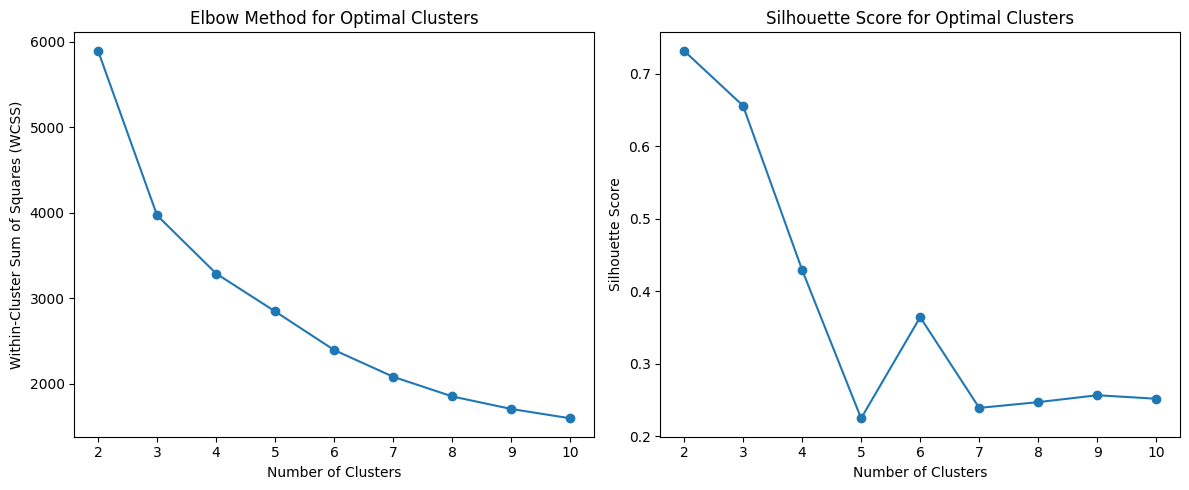

In [ ]:
def optimal_clusters(data, max_clusters=10):
    """
    Determines the optimal number of clusters using the Elbow method and Silhouette score.

    Parameters:
        data (array-like): Scaled data to cluster.
        max_clusters (int): Maximum number of clusters to test for optimality.

    Returns:
        None
    """
    wcss = []  # Within-cluster sum of squares for the Elbow method
    silhouette_scores = []  # Silhouette scores

    # Iterate over a range of cluster numbers
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
        kmeans.fit(data)

        # Calculate WCSS (Within-cluster sum of squares)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plot the Elbow method graph
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

    # Plot the Silhouette score graph
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'scaled_data' is your scaled dataset
optimal_clusters(scaled_data, max_clusters=10)

## STARTING MODELS

In [ ]:
def run_kmeans(data, n_clusters=5, n_init=10, max_iter=300):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_


def evaluate_clustering(data, labels):
    """
    Evaluates clustering quality using Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score.

    Parameters:
        data (array-like): Scaled data that was used for clustering.
        labels (array-like): Cluster labels from the clustering model.

    Returns:
        dict: Dictionary containing Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score.
    """
    # Calculate Silhouette Score
    silhouette = silhouette_score(data, labels)

    # Calculate Davies-Bouldin Score
    davies_bouldin = davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Score
    calinski_harabasz = calinski_harabasz_score(data, labels)

    # Display the evaluation metrics
    print("Clustering Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

    return {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Score": davies_bouldin,
        "Calinski-Harabasz Score": calinski_harabasz
    }



In [ ]:
labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

Clustering Evaluation Metrics:
Silhouette Score: 0.2249
Davies-Bouldin Score: 1.1736
Calinski-Harabasz Score: 157.8484


In [ ]:
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

Clustering Evaluation Metrics:
Silhouette Score: 0.4297
Davies-Bouldin Score: 1.0104
Calinski-Harabasz Score: 175.6732


In [ ]:
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

Clustering Evaluation Metrics:
Silhouette Score: 0.6558
Davies-Bouldin Score: 0.6435
Calinski-Harabasz Score: 205.3296


In [ ]:
numeric_data.columns

Index(['Clave_municipio', 'Poblacion_total_x', 'Poblacion_adulta',
       'Poblacion_adulta_mujeres', 'Poblacion_adulta_hombres',
       'Tarjetas_credito_numero', 'Personal_numero_creditos',
       'Nomina_numero_creditos', 'Abcd_numero_creditos',
       'Grupal_numero_creditos', 'Hipotecario_numero_creditos',
       'Automotriz_numero_creditos', 'Total_numero_creditos',
       'Penetracion_financiera',
       'Clave_de_municipio_o_demarcacion_territorial', 'Poblacion_total_y',
       'Poblacion_femenina', 'Poblacion_masculina',
       'Poblacion_de_18_años_y_mas', 'Poblacion_femenina_de_18_años_y_mas',
       'Poblacion_masculina_de_18_años_y_mas', 'Poblacion_de_18_a_24_años',
       'Poblacion_femenina_de_18_a_24_años',
       'Poblacion_masculina_de_18_a_24_años', 'Poblacion_de_60_años_y_mas',
       'Poblacion_femenina_de_60_años_y_mas',
       'Poblacion_masculina_de_60_años_y_mas',
       'Poblacion_de_18_a_24_años_que_asiste_a_la_escuela',
       'Poblacion_femenina_de_18_a_24_

In [ ]:
pca_data = merged_data

In [ ]:
pca_data = delete_columns(pca_data, 'Clave_municipio')
pca_data = delete_columns(pca_data, 'Poblacion_adulta')
pca_data = delete_columns(pca_data, 'Poblacion_adulta_mujeres')
pca_data = delete_columns(pca_data, 'Poblacion_adulta_hombres')
pca_data = delete_columns(pca_data, 'Clave_de_municipio_o_demarcacion_territorial')




In [ ]:
nd = pca_data.select_dtypes(include=['int64', 'float64'])


In [ ]:
nd.columns

Index(['Poblacion_total_x', 'Tarjetas_credito_numero',
       'Personal_numero_creditos', 'Nomina_numero_creditos',
       'Abcd_numero_creditos', 'Grupal_numero_creditos',
       'Hipotecario_numero_creditos', 'Automotriz_numero_creditos',
       'Total_numero_creditos', 'Penetracion_financiera', 'Poblacion_total_y',
       'Poblacion_femenina', 'Poblacion_masculina',
       'Poblacion_de_18_años_y_mas', 'Poblacion_femenina_de_18_años_y_mas',
       'Poblacion_masculina_de_18_años_y_mas', 'Poblacion_de_18_a_24_años',
       'Poblacion_femenina_de_18_a_24_años',
       'Poblacion_masculina_de_18_a_24_años', 'Poblacion_de_60_años_y_mas',
       'Poblacion_femenina_de_60_años_y_mas',
       'Poblacion_masculina_de_60_años_y_mas',
       'Poblacion_de_18_a_24_años_que_asiste_a_la_escuela',
       'Poblacion_femenina_de_18_a_24_años_que_asiste_a_la_escuela',
       'Poblacion_masculina_de_18_a_24_años_que_asiste_a_la_escuela',
       'Poblacion_de_18_años_y_mas_con_educacion_posbasica',
  

## PCA AND 5 CLUSTERS

Pensando si el PCA seria buena opcion para implementar en el modelo, evaluando su viabilidad

Number of components to explain 90% of variance: 3


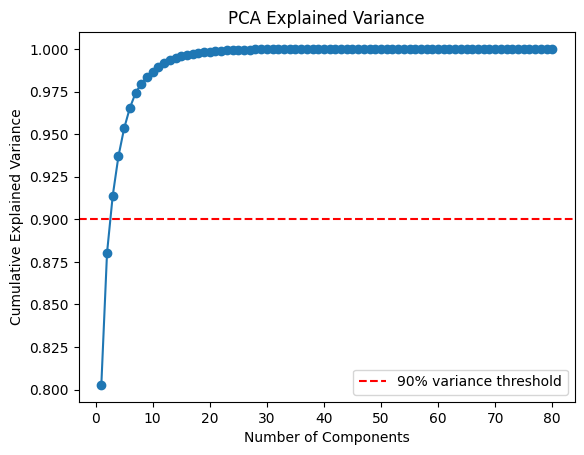

In [ ]:

# Fit PCA to the scaled data
pca = PCA().fit(scaled_data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 90% of the variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain 90% of variance: {n_components_90}")

# Optionally, plot the cumulative variance
import matplotlib.pyplot as plt
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

In [ ]:
# Define the number of clusters you want to test
n_clusters = 5  # Replace 5 with your chosen cluster count

# Perform PCA to reduce dimensions
pca = PCA(n_components=5)  # Adjust n_components as needed for the data
pca_data = pca.fit_transform(scaled_data)

# Run KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=13)
pca_labels = kmeans_pca.fit_predict(pca_data)

# Calculate Silhouette Score on the PCA-transformed clustering
silhouette_pca = silhouette_score(pca_data, pca_labels)
print(f"Silhouette Score after PCA with {n_clusters} clusters: {silhouette_pca}")

Silhouette Score after PCA with 5 clusters: 0.273080388401754


In [ ]:


# Select numeric columns and scale the data
#numeric_data = merged_data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
df_scaled_data = scaler.fit_transform(nd)
df_scaled_data = pd.DataFrame(df_scaled_data, columns=nd.columns)

# Apply PCA
pca = PCA(n_components=None)  # Keep all components
X_pca = pca.fit(df_scaled_data)

# Explained variance for each component
explained_variance = X_pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Create Plotly figure for explained variance
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=np.arange(1, len(explained_variance) + 1),
    y=explained_variance,
    text=[f"{var:.2f}" for var in explained_variance],
    textposition='outside'
))
fig1.update_layout(
    title="Percentage of Variance Explained by Each Component",
    xaxis_title="Principal Component",
    yaxis_title="Explained Variance",
    yaxis=dict(range=[0, 1.1])
)
fig1.show()

# Create Plotly figure for cumulative explained variance
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=np.arange(1, len(cumulative_explained_variance) + 1),
    y=cumulative_explained_variance,
    mode='lines+markers',
    text=[f"{var:.2f}" for var in cumulative_explained_variance]
))
fig2.update_layout(
    title="Cumulative Explained Variance",
    xaxis_title="Principal Component",
    yaxis_title="Cumulative Explained Variance",
    yaxis=dict(range=[0, 1.1])
)
fig2.show()

In [ ]:
display(nd)

Poblacion_total_x  Tarjetas_credito_numero  Personal_numero_creditos  \
0                92040                    13721                     12302   
1               108697                    23872                     11159   
2               174615                    31639                     14382   
3                63392                     7279                      6457   
4               117883                    14463                     12871   
..                 ...                      ...                       ...   
166             555163                   211443                     65129   
167             391731                    49805                     58375   
168              28822                      405                       844   
169             100082                      878                      7658   
170              14883                      897                       895   

     Nomina_numero_creditos  Abcd_numero_creditos  Grupal_numero_creditos  \
0                      2020                  3144                     644   
1                      3576                  4540                    1484   
2                      4572                  3573                    4706   
3                      1289                  1469                    1317   
4                      3540                  5048                    2213   
..                      ...                   ...                     ...   
166                   37574                 24013                    8563   
167                   14947                 26222                   12525   
168                     478                   235                     124   
169                     564                  1378                    1464   
170                     364                   415                     406   

     Hipotecario_numero_creditos  Automotriz_numero_creditos  \
0                            109                         240   
1                            229                         363   
2                           2006                         898   
3                             34                         139   
4                            916                         319   
..                           ...                         ...   
166                         7994                        7166   
167                          242                        1164   
168                            2                          40   
169                            1                          73   
170                           86                          68   

     Total_numero_creditos  Penetracion_financiera  ...  \
0                    32180                0.483437  ...   
1                    45223                0.549289  ...   
2                    61776                0.486820  ...   
3                    17984                0.391936  ...   
4                    39370                0.482168  ...   
..                     ...                     ...  ...   
166                 361882                0.818795  ...   
167                 163280                0.568658  ...   
168                   2128                0.109640  ...   
169                  12016                0.183680  ...   
170                   3131                0.286984  ...   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243                        
2                                                14423                        
3                                                 3198                        
4                                                 6258                        
..                                                 ...                        
166                                             110030                        
167                                          

In [ ]:
def significant_principal_components(pca_model, threshold=0.95):
    """
    Identify significant principal components based on cumulative explained variance.

    Parameters:
        pca_model (PCA object): Fitted PCA model.
        threshold (float): Cumulative variance threshold (default is 0.95).

    Returns:
        List of significant principal components.
    """
    cumulative_variance = np.cumsum(pca_model.explained_variance_ratio_)
    significant_components = np.where(cumulative_variance >= threshold)[0][0] + 1

    print(f"Number of principal components needed to reach {threshold*100}% variance: {significant_components}")
    print("Explained variance by each component:")
    for i, variance in enumerate(pca_model.explained_variance_ratio_[:significant_components]):
        print(f"Principal Component {i + 1}: {variance:.4f}")

    return significant_components

# Example usage:
num_components = significant_principal_components(X_pca)

Number of principal components needed to reach 95.0% variance: 5
Explained variance by each component:
Principal Component 1: 0.8163
Principal Component 2: 0.0825
Principal Component 3: 0.0297
Principal Component 4: 0.0200
Principal Component 5: 0.0129


In [ ]:
def display_principal_component_loadings(pca_model, feature_names, num_components=5):
    """
    Display the loadings for the specified number of principal components.

    Parameters:
        pca_model (PCA object): Fitted PCA model.
        feature_names (list): List of original feature names.
        num_components (int): Number of principal components to display (default is 5).

    Returns:
        DataFrame: Loadings of the specified principal components.
    """
    # Get loadings (principal component coefficients)
    loadings = pca_model.components_[:num_components]

    # Create a DataFrame to display the loadings
    loadings_df = pd.DataFrame(loadings, columns=feature_names,
                               index=[f'Principal Component {i+1}' for i in range(num_components)])

    # Display the loadings
    print(loadings_df)
    return loadings_df

# Example usage:
feature_names = df_scaled_data.columns  # Assuming these are the original feature names
loadings_df = display_principal_component_loadings(X_pca, feature_names)

                       Poblacion_total_x  Tarjetas_credito_numero  \
Principal Component 1           0.127489                 0.122508   
Principal Component 2           0.013337                -0.043777   
Principal Component 3          -0.013790                 0.001735   
Principal Component 4           0.007655                 0.113394   
Principal Component 5           0.041037                -0.032935   

                       Personal_numero_creditos  Nomina_numero_creditos  \
Principal Component 1                  0.122843                0.126320   
Principal Component 2                 -0.005224               -0.028603   
Principal Component 3                 -0.008664               -0.005157   
Principal Component 4                 -0.183524                0.036077   
Principal Component 5                 -0.117083               -0.015068   

                       Abcd_numero_creditos  Grupal_numero_creditos  \
Principal Component 1              0.122465                0.11

### COmponent Interpretation

Principal Component 1: Financial and Technological Integration

This component has high positive loadings on multiple credit types and access to various household technologies, suggesting it captures a broad measure of
financial and technological engagement.

	•	Features with High Positive Loadings:
	•	Tarjetas_credito_numero (Number of Credit Cards)
	•	Personal_numero_creditos (Number of Personal Loans)
	•	Nomina_numero_creditos (Number of Payroll Loans)
	•	Abcd_numero_creditos (Number of ABCD Credits, possibly a product-specific credit type)
	•	Grupal_numero_creditos (Number of Group Loans)
	•	Hipotecario_numero_creditos (Number of Mortgage Loans)
	•	Automotriz_numero_creditos (Number of Auto Loans)
	•	Total_numero_creditos (Total Number of Credits)
	•	Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija (Homes with a Fixed Phone Line)
	•	Viviendas_particulares_habitadas_que_disponen_de_telefono_celular (Homes with a Mobile Phone)
	•	Viviendas_particulares_habitadas_que_disponen_de_internet (Homes with Internet Access)
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga (Homes with Paid TV Service)
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet (Homes with Paid Streaming Services)
	•	Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos (Homes with Video Game Consoles)
	- Interpretación PCA 1: Este componente probablemente representa un factor general de acceso financiero y tecnológico. Los valores altos en este componente sugieren hogares o individuos con un mayor acceso a productos financieros y tecnologías avanzadas en el hogar. Esto podría indicar áreas con mayor estabilidad económica, urbanización o una población que utiliza diversos instrumentos financieros y dispone de comodidades tecnológicas modernas en sus hogares.


Principal Component 2: Financial Penetration vs. Limited Access to Information and Communication Technologies (ICT)

This component contrasts financial penetration with the lack of access to certain technologies in households.

	•	Features with High Positive Loadings:
	•	Penetracion_financiera (Financial Penetration, likely indicating the prevalence of financial services usage in the population)
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet (Homes with Paid Streaming Services)
	•	Features with High Negative Loadings:
	•	Viviendas_particulares_habitadas_sin_tecnologias_de_la_informacion_y_de_la_comunicacion_(tic) (Homes without Information and Communication Technologies)
	•	Viviendas_particulares_habitadas_sin_linea_telefonica_fija_ni_telefono_celular (Homes without a Fixed Line or Mobile Phone)
	- Interpretación PCA 2: Este componente probablemente captura una división entre regiones con alta integración financiera (evidenciada por la penetración financiera y el acceso a servicios de streaming de pago) y aquellas con una infraestructura TIC limitada. Un puntaje alto aquí podría indicar poblaciones o áreas financieramente integradas pero con carencias en tecnologías de comunicación esenciales, posiblemente indicando áreas donde los servicios financieros son accesibles, pero la infraestructura tecnológica tiene brechas.

Principal Component 3: Financial Penetration with Varied Home Technological Access

This component seems to capture financial penetration again, but with a focus on variations in access to home technologies.

	•	Features with High Positive Loadings:
	•	Penetracion_financiera (Financial Penetration)
	•	Grupal_numero_creditos (Number of Group Loans)
	•	Features with Moderate Negative Loadings:
	•	Viviendas_particulares_habitadas_sin_tecnologias_de_la_informacion_y_de_la_comunicacion_(tic) (Homes without ICT)
	•	Viviendas_particulares_habitadas_sin_linea_telefonica_fija_ni_telefono_celular (Homes without Fixed Line or Mobile Phone)
	- Interpretación PCA 3: Este componente puede representar una imagen matizada del acceso financiero, especialmente a créditos grupales, en relación con el acceso a tecnología en el hogar. Los puntajes altos aquí podrían indicar áreas con una prevalencia de préstamos grupales y servicios financieros junto con niveles variables de infraestructura tecnológica en los hogares. Este patrón puede observarse en áreas de bajos ingresos o semiurbanas donde los servicios financieros colectivos son comunes, pero el acceso a TIC es inconsistente.

Principal Component 4: Contrast Between Group Loans and Mortgage Loans with Household Services

This component has high positive loadings on group loans and high negative loadings on mortgage loans and paid TV services.

	•	Features with High Positive Loadings:
	•	Grupal_numero_creditos (Number of Group Loans)
	•	Features with High Negative Loadings:
	•	Hipotecario_numero_creditos (Number of Mortgage Loans)
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga (Homes with Paid TV Service)
	- Interpretación PCA 4: Este componente parece diferenciar entre el uso de préstamos grupales y la prevalencia de préstamos hipotecarios, junto con ciertos servicios domésticos como la televisión de paga. Un puntaje alto en este componente puede indicar áreas o individuos que dependen más de mecanismos de crédito grupal en lugar de compromisos financieros individuales como las hipotecas, quizás debido a menor estabilidad económica o urbanización. Este componente sugiere una distinción socioeconómica donde el crédito grupal es preferido y ciertos servicios de pago (como la televisión de paga) son menos comunes.

Principal Component 5: Automotive Loans and Minor Technology Access Variances

This component reflects minor variances related to automotive loans and slight differences in household technology access.

	•	Features with Moderate Positive Loadings:
	•	Automotriz_numero_creditos (Number of Auto Loans)
	•	Other Notable Features:
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga (Homes with Paid TV Service)
	•	Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet (Homes with Paid Streaming Services)
	- Interpretación PCA 5: Este componente captura un patrón más específico, centrado en el acceso a créditos automotrices y ligeras diferencias en servicios domésticos como la televisión de paga y el streaming. Los puntajes altos en este componente podrían sugerir poblaciones con acceso a préstamos automotrices y algunos lujos menores en términos de servicios para el hogar, lo que potencialmente indica un grupo orientado al estilo de vida dentro del conjunto de datos. Este componente podría distinguir áreas donde poseer un vehículo y suscribirse a servicios de entretenimiento es común, apuntando a un nivel socioeconómico ligeramente superior dentro de la población.

Resumen de Interpretaciones de Componentes:

	1.	Componente 1: Compromiso financiero y tecnológico general.
	2.	Componente 2: Penetración financiera vs. acceso limitado a TIC.
	3.	Componente 3: Penetración financiera con acceso variado a tecnología en el hogar.
	4.	Componente 4: Contraste socioeconómico en tipos de crédito y televisión de paga.
	5.	Componente 5: Componente específico de estilo de vida con préstamos automotrices y servicios de entretenimiento.

Each component highlights a unique dimension in your dataset, helping to capture different socioeconomic, financial, and technological patterns across the population. These insights may be valuable for targeting specific segments or understanding broader trends in financial behavior and technology access.

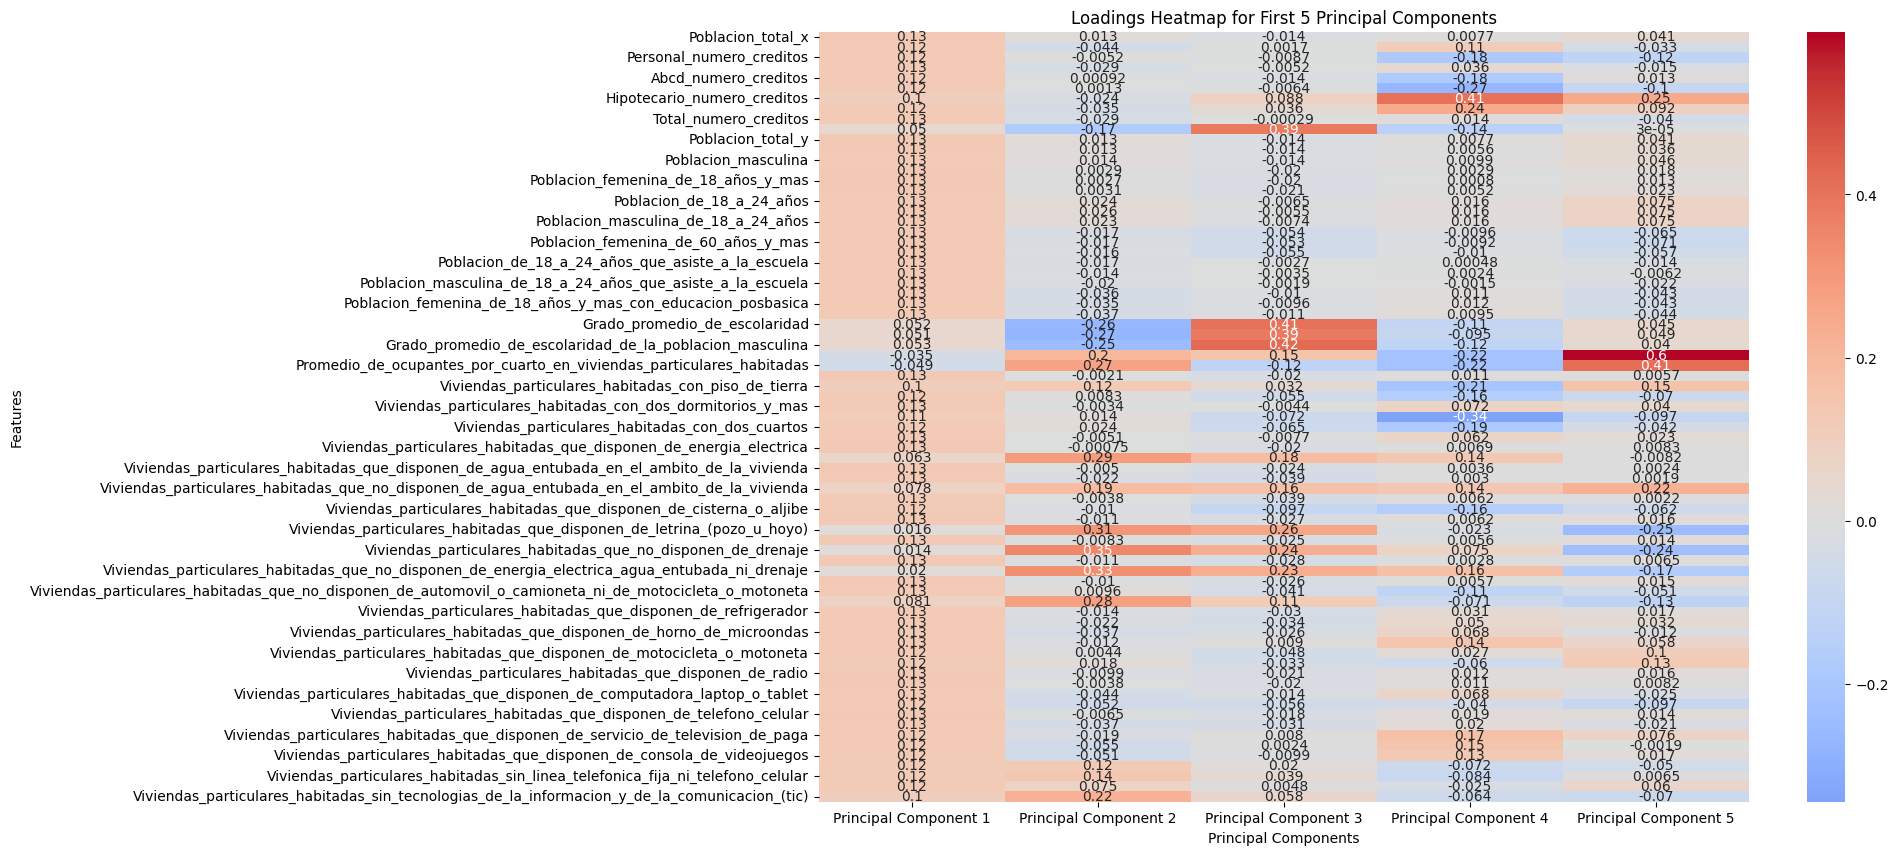

Principal Component 1  \
Poblacion_total_x                                                0.127489   
Tarjetas_credito_numero                                          0.122508   
Personal_numero_creditos                                         0.122843   
Nomina_numero_creditos                                           0.126320   
Abcd_numero_creditos                                             0.122465   
...                                                                   ...   
Viviendas_particulares_habitadas_que_disponen_d...               0.124001   
Viviendas_particulares_habitadas_sin_radio_ni_t...               0.118951   
Viviendas_particulares_habitadas_sin_linea_tele...               0.115757   
Viviendas_particulares_habitadas_sin_computador...               0.123748   
Viviendas_particulares_habitadas_sin_tecnologia...               0.100668   

                                                    Principal Component 2  \
Poblacion_total_x                                                0.013337   
Tarjetas_credito_numero                                         -0.043777   
Personal_numero_creditos                                        -0.005224   
Nomina_numero_creditos                                          -0.028603   
Abcd_numero_creditos                                             0.000920   
...                                                                   ...   
Viviendas_particulares_habitadas_que_disponen_d...              -0.050962   
Viviendas_particulares_habitadas_sin_radio_ni_t...               0.122143   
Viviendas_particulares_habitadas_sin_linea_tele...               0.138858   
Viviendas_particulares_habitadas_sin_computador...               0.075116   
Viviendas_particulares_habitadas_sin_tecnologia...               0.220317   

                                                    Principal Component 3  \
Poblacion_total_x                                               -0.013790   
Tarjetas_credito_numero                                          0.001735   
Personal_numero_creditos                                        -0.008664   
Nomina_numero_creditos                                          -0.005157   
Abcd_numero_creditos                                            -0.013799   
...                                                                   ...   
Viviendas_particulares_habitadas_que_disponen_d...              -0.009938   
Viviendas_particulares_habitadas_sin_radio_ni_t...               0.020006   
Viviendas_particulares_habitadas_sin_linea_tele...               0.038815   
Viviendas_particulares_habitadas_sin_computador...               0.004789   
Viviendas_particulares_habitadas_sin_tecnologia...               0.058427   

                                                    Principal Component 4  \
Poblacion_total_x                                                0.007655   
Tarjetas_credito_numero                                          0.113394   
Personal_numero_creditos                                        -0.183524   
Nomina_numero_creditos                                           0.036077   
Abcd_numero_creditos                                            -0.176445   
...                                                                   ...   
Viviendas_particulares_habitadas_que_disponen_d...               0.128122   
Viviendas_particulares_habitadas_sin_radio_ni_t...              -0.072483   
Viviendas_particulares_habitadas_sin_linea_tele...              -0.084372   
Viviendas_particulares_habitadas_sin_computador...              -0.024806   
Viviendas_particulares_habitadas_sin_tecnologia...              -0.063835   

                                                    Principal Component 5  
Poblacion_total_x                                                0.041037  
Tarjetas_credito_numero                                         -0.032935  
Personal_numero_creditos                                        -0.117083  
Nomina_numero_creditos                          

In [ ]:
def create_pca_heatmap(data, columns, num_components=5):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])
    scaled_data = pd.DataFrame(scaled_data, columns=columns)

    # Apply PCA
    pca = PCA(n_components=None)
    pca.fit(scaled_data)

    # Get loadings for the first 5 principal components
    loadings = pca.components_[:num_components]

    # Create a DataFrame for heatmap with components as columns
    loadings_df = pd.DataFrame(loadings.T, index=columns,
                               columns=[f'Principal Component {i+1}' for i in range(num_components)])

    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
    plt.title('Loadings Heatmap for First 5 Principal Components')
    plt.xlabel('Principal Components')
    plt.ylabel('Features')
    plt.show()

    return loadings_df

create_pca_heatmap(nd, columns=nd.columns)

### USING only Important recognizable variables and tests

In [ ]:
sc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Nomina_numero_creditos",  # Number of Payroll Loans
    "Abcd_numero_creditos",  # Number of ABCD Credits
    "Grupal_numero_creditos",  # Number of Group Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[sc]

# Mostrar el DataFrame resultante
print(filtered_data)



     Tarjetas_credito_numero  Personal_numero_creditos  \
0                      13721                     12302   
1                      23872                     11159   
2                      31639                     14382   
3                       7279                      6457   
4                      14463                     12871   
..                       ...                       ...   
166                   211443                     65129   
167                    49805                     58375   
168                      405                       844   
169                      878                      7658   
170                      897                       895   

     Nomina_numero_creditos  Abcd_numero_creditos  Grupal_numero_creditos  \
0                      2020                  3144                     644   
1                      3576                  4540                    1484   
2                      4572                  3573                    470

In [ ]:

# Filtrar datos para las columnas seleccionadas
filtered_data = numeric_data[sc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

# Mostrar las primeras filas del DataFrame con la etiqueta del cluster
print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7747
Davies-Bouldin Score: 0.5100
Calinski-Harabasz Score: 388.7252
 4 Clusters 
Clustering Evaluation Metrics:
Silhouette Score: 0.7770
Davies-Bouldin Score: 0.7269
Calinski-Harabasz Score: 389.1731
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7927
Davies-Bouldin Score: 0.6997
Calinski-Harabasz Score: 377.2001


<ipython-input-60-aeb4f36cf5eb>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Asumiendo que 'filtered_data' ya contiene la columna 'Cluster' de tu modelo KMeans
# Selecciona tres características para los ejes. Aquí, elijo 'Tarjetas_credito_numero', 'Personal_numero_creditos', y 'Total_numero_creditos' como ejemplos

fig = px.scatter_3d(filtered_data, x='Tarjetas_credito_numero', y='Viviendas_particulares_habitadas_que_disponen_de_internet', z='Total_numero_creditos',
                    color='Cluster',  # Color por etiqueta de cluster
                    title='3D Cluster Visualization',
                    labels={'Tarjetas_credito_numero': 'Number of Credit Cards',
                            'Personal_numero_creditos': 'Number of Personal Loans',
                            'Total_numero_creditos': 'Total Number of Credits'},
                    color_continuous_scale=px.colors.qualitative.Vivid)  # Escala de colores para mejor visualización

# Mejorar la visualización con algunas opciones adicionales
fig.update_layout(autosize=True,
                 scene=dict(xaxis_title='Number of Credit Cards',
                             yaxis_title='Number of Personal Loans',
                             zaxis_title='Total Number of Credits'),
                  margin=dict(l=0, r=0, b=0, t=30))

# Mostrar el gráfico
fig.show()

In [ ]:

# Generar todas las combinaciones posibles de 2 características
combinations_of_columns = combinations(sc, 2)

# Crear un gráfico para cada combinación y mostrarlo
for combination in combinations_of_columns:
    fig = px.scatter(filtered_data, x=combination[0], y=combination[1],
                     color='Cluster',  # Color por etiqueta de cluster
                     title=f"2D Scatter Plot of {combination[0]} vs {combination[1]}",
                     labels={combination[0]: combination[0], combination[1]: combination[1]},
                     color_continuous_scale=px.colors.qualitative.Vivid)  # Escala de colores para mejor visualización

    # Mejorar la visualización con algunas opciones adicionales
    fig.update_traces(marker=dict(size=5))  # Ajustar el tamaño de los puntos
    fig.update_layout(margin=dict(l=20, r=20, t=40, b=20))  # Ajustar los márgenes de la figura

    # Mostrar el gráfico
    fig.show()

In [ ]:


def find_top_5_3d_variables(data, n_clusters=5):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Add the cluster assignments back to the scaled DataFrame
    data_scaled['Cluster'] = clusters

    # Create a list to store scores for each three-variable combination
    three_var_scores = {}

    # Calculate the average distance between clusters for each triplet of variables
    for triplet in combinations(data.columns, 3):
        cluster_centers = data_scaled.groupby('Cluster')[list(triplet)].mean()
        distances = []
        for i in range(n_clusters):
            for j in range(i + 1, n_clusters):
                distance = np.linalg.norm(cluster_centers.iloc[i] - cluster_centers.iloc[j])
                distances.append(distance)
        three_var_scores[triplet] = np.mean(distances)

    # Sort the scores and select the top 5
    top_five_triplets = sorted(three_var_scores, key=three_var_scores.get, reverse=True)[:5]

    # Return the best five triplets
    return top_five_triplets

# Example usage
# Assuming `df` is your DataFrame with the relevant columns
top_5_vars = find_top_5_3d_variables(filtered_data)
print("Top 5 best three variables for 3D scatter plot:")
for i, triplet in enumerate(top_5_vars, 1):
    print(f"{i}: {triplet}")



Top 5 best three variables for 3D scatter plot:
1: ('Personal_numero_creditos', 'Nomina_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija')
2: ('Tarjetas_credito_numero', 'Personal_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija')
3: ('Tarjetas_credito_numero', 'Grupal_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija')
4: ('Nomina_numero_creditos', 'Grupal_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija')
5: ('Personal_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija', 'Viviendas_particulares_habitadas_que_disponen_de_internet')


In [ ]:

fig = px.scatter_3d(filtered_data, x='Hipotecario_numero_creditos', y='Automotriz_numero_creditos', z='Tarjetas_credito_numero',
                    color='Cluster',  # Color por etiqueta de cluster
                    title='3D Cluster Visualization',
                    labels={'Tarjetas_credito_numero': 'Number of Credit Cards',
                            'Personal_numero_creditos': 'Number of Personal Loans',
                            'Total_numero_creditos': 'Total Number of Credits'},
                    color_continuous_scale=px.colors.qualitative.Vivid)  # Escala de colores para mejor visualización

# Mejorar la visualización con algunas opciones adicionales
fig.update_layout(autosize=True,
                  scene=dict(xaxis_title='Number of Credit Cards',
                             yaxis_title='Number of Personal Loans',
                             zaxis_title='Total Number of Credits'),
                  margin=dict(l=0, r=0, b=0, t=30))

# Mostrar el gráfico
fig.show()

In [ ]:
def find_and_visualize_top_5_3d_variables_side_by_side(data, n_clusters=5):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

    # Fit KMeans with 5 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Add the cluster assignments back to the scaled DataFrame
    data_scaled['Cluster'] = clusters

    # Create a list to store scores for each three-variable combination
    three_var_scores = {}

    # Calculate the average distance between clusters for each triplet of variables
    for triplet in combinations(data.columns, 3):
        cluster_centers = data_scaled.groupby('Cluster')[list(triplet)].mean()
        distances = []
        for i in range(n_clusters):
            for j in range(i + 1, n_clusters):
                distance = np.linalg.norm(cluster_centers.iloc[i] - cluster_centers.iloc[j])
                distances.append(distance)
        three_var_scores[triplet] = np.mean(distances)

    # Sort the scores and select the top 5
    top_five_triplets = sorted(three_var_scores, key=three_var_scores.get, reverse=True)[:5]

    # Setting up the subplot grid
    fig = make_subplots(
        rows=1, cols=5,
        specs=[[{'type': 'scatter3d'}] * 5]  # All columns will have 3D scatter plots
    )

    # Add each plot to the subplot grid
    for index, triplet in enumerate(top_five_triplets, start=1):
        temp_fig = px.scatter_3d(data_scaled, x=triplet[0], y=triplet[1], z=triplet[2],
                                 color='Cluster',
                                 labels={var: var for var in triplet},
                                 color_continuous_scale=px.colors.qualitative.Vivid)
        for trace in temp_fig.data:
            fig.add_trace(
                trace,
                row=1, col=index
            )
        # Add custom annotations vertically
        base_x = 0.2 * (index - 1) + 0.1
        fig.add_annotation(text=f"x = '{triplet[0]}'", x=base_x, y=-0.1, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"y = '{triplet[1]}'", x=base_x, y=-0.15, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"z = '{triplet[2]}'", x=base_x, y=-0.2, showarrow=False, xref="paper", yref="paper")

    # Update layout for better visualization
    fig.update_layout(height=800, width=3200, title_text="Top 5 Best Three Variable Combinations for 3D Scatter Plot")
    fig.update_layout(showlegend=False, margin=dict(t=100, b=200))  # Increase bottom margin to fit annotations

    # Show the graph
    fig.show()

    return top_five_triplets

# Example usage
# Assuming `df` is your DataFrame with the relevant columns
top_5_vars = find_and_visualize_top_5_3d_variables_side_by_side(filtered_data)
print("Top 5 best three variables for 3D scatter plot displayed side by side.")

Top 5 best three variables for 3D scatter plot displayed side by side.


### USing 5 components of PCA

In [ ]:
# Asumiendo que 'filtered_data' es tu DataFrame y ya contiene la columna 'Cluster'
columns = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Nomina_numero_creditos",  # Number of Payroll Loans
    "Abcd_numero_creditos",  # Number of ABCD Credits
    "Grupal_numero_creditos",  # Number of Group Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos", # Homes with Video Game Consoles
    "Penetracion_financiera",
    "Viviendas_particulares_habitadas_sin_tecnologias_de_la_informacion_y_de_la_comunicacion_(tic)",
    "Viviendas_particulares_habitadas_sin_linea_telefonica_fija_ni_telefono_celular"
]

filtered_data = numeric_data[columns]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

# Mostrar las primeras filas del DataFrame con la etiqueta del cluster
print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.3287
Davies-Bouldin Score: 1.0087
Calinski-Harabasz Score: 210.1961
 4 Clusters 
Clustering Evaluation Metrics:
Silhouette Score: 0.6410
Davies-Bouldin Score: 0.8200
Calinski-Harabasz Score: 219.9837
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.6792
Davies-Bouldin Score: 0.7486
Calinski-Harabasz Score: 256.5854


<ipython-input-66-ab4f5e6845a5>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## STOP using PCA and only using variables from PCA 1

In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Nomina_numero_creditos",  # Number of Payroll Loans
    "Abcd_numero_creditos",  # Number of ABCD Credits
    "Grupal_numero_creditos",  # Number of Group Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[dc]


filtered_data = numeric_data[dc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7747
Davies-Bouldin Score: 0.5100
Calinski-Harabasz Score: 388.7252
 4 Clusters 


<ipython-input-67-01fdf7e8d84f>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clustering Evaluation Metrics:
Silhouette Score: 0.7770
Davies-Bouldin Score: 0.7269
Calinski-Harabasz Score: 389.1731
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7927
Davies-Bouldin Score: 0.6997
Calinski-Harabasz Score: 377.2001


In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Nomina_numero_creditos",  # Number of Payroll Loans
    "Grupal_numero_creditos",  # Number of Group Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[dc]


filtered_data = numeric_data[dc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

<ipython-input-68-d4f5c84d2162>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7779
Davies-Bouldin Score: 0.4919
Calinski-Harabasz Score: 420.1423
 4 Clusters 
Clustering Evaluation Metrics:
Silhouette Score: 0.7798
Davies-Bouldin Score: 0.7230
Calinski-Harabasz Score: 407.3313
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7926
Davies-Bouldin Score: 0.6919
Calinski-Harabasz Score: 387.2856


In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Nomina_numero_creditos",  # Number of Payroll Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[dc]


filtered_data = numeric_data[dc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7835
Davies-Bouldin Score: 0.4417
Calinski-Harabasz Score: 492.3208
 4 Clusters 


<ipython-input-69-26d13ea65cca>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clustering Evaluation Metrics:
Silhouette Score: 0.7855
Davies-Bouldin Score: 0.6665
Calinski-Harabasz Score: 471.2408
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.8039
Davies-Bouldin Score: 0.6615
Calinski-Harabasz Score: 418.3032


In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Total_numero_creditos",  # Total Number of Credits
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[dc]


filtered_data = numeric_data[dc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Definir el modelo KMeans, por ejemplo con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

print(" ")
print(" 5 Clusters")

labels_all_features5c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features5c)

print( " 4 Clusters ")
labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 Clusters")
labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

 
 5 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7836
Davies-Bouldin Score: 0.4421
Calinski-Harabasz Score: 488.8424
 4 Clusters 
Clustering Evaluation Metrics:
Silhouette Score: 0.7932
Davies-Bouldin Score: 0.6755
Calinski-Harabasz Score: 454.3416
 3 Clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.8021
Davies-Bouldin Score: 0.6786
Calinski-Harabasz Score: 400.6997


<ipython-input-70-a5cdda3bbff3>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## BEST RESULTS

In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos"  # Homes with Video Game Consoles
]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
filtered_data = numeric_data[dc]

# Escalar los datos para tener una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

print(" ")
print(" 5 clusters")

labels_all_features4c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 4 clusters")

kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(scaled_data)

# Obtener las etiquetas de cluster para cada punto de datos
clusters = kmeans.labels_

# Agregar las etiquetas del cluster al DataFrame para análisis
filtered_data['Cluster'] = clusters

labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 clusters")

kmeans.fit(scaled_data)

clusters = kmeans.labels_

filtered_data['Cluster'] = clusters

labels_all_features3c = run_kmeans(scaled_data, 3)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)

# Actualizar 'Cluster' con los valores producidos por run_kmeans(scaled_data, 3)
filtered_data['Cluster'] = labels_all_features3c

 
 5 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7873
Davies-Bouldin Score: 0.4514
Calinski-Harabasz Score: 478.0740
 4 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.7838
Davies-Bouldin Score: 0.6874
Calinski-Harabasz Score: 437.7843
 3 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.8297
Davies-Bouldin Score: 0.6036
Calinski-Harabasz Score: 385.6425


<ipython-input-71-05ed7a8edcb1>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-05ed7a8edcb1>:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-05ed7a8edcb1>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cluster_counts = filtered_data['Cluster'].value_counts()

# Mostrar los resultados
print(cluster_counts)

Cluster
0    153
1     16
2      2
Name: count, dtype: int64


In [ ]:
# Generate all combinations of columns for scatter plots
combinations_of_columns = combinations(dc, 2)

# Create a scatter plot for each combination and display it
for combination in combinations_of_columns:
    fig = px.scatter(
        filtered_data, x=combination[0], y=combination[1],
        color='Cluster',  # Color by 'Cluster'
        title=f"2D Scatter Plot of {combination[0]} vs {combination[1]}",
        labels={combination[0]: combination[0], combination[1]: combination[1]},
        color_continuous_scale=px.colors.qualitative.Vivid  # Color scale for better visualization
    )

    # Enhance visualization with additional options
    fig.update_traces(marker=dict(size=5))  # Set marker size
    fig.update_layout(margin=dict(l=20, r=20, t=40, b=20))  # Adjust margins

    # Display the plot
    fig.show()

In [ ]:
from itertools import combinations
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

def find_and_visualize_top_5_3d_variables_side_by_side(data):
    # Use the already scaled data (excluding 'Cluster' column)
    scaled_data = data.drop(columns=['Cluster'])

    # Add the existing cluster assignments to the DataFrame
    scaled_data['Cluster'] = data['Cluster']

    # Create a list to store scores for each three-variable combination
    three_var_scores = {}

    # Calculate the average distance between clusters for each triplet of variables
    for triplet in combinations(scaled_data.columns[:-1], 3):  # Exclude 'Cluster' from combinations
        cluster_centers = scaled_data.groupby('Cluster')[list(triplet)].mean()
        distances = []
        for i in range(cluster_centers.shape[0]):
            for j in range(i + 1, cluster_centers.shape[0]):
                distance = np.linalg.norm(cluster_centers.iloc[i] - cluster_centers.iloc[j])
                distances.append(distance)
        three_var_scores[triplet] = np.mean(distances)

    # Sort the scores and select the top 5
    top_five_triplets = sorted(three_var_scores, key=three_var_scores.get, reverse=True)[:5]

    # Setting up the subplot grid
    fig = make_subplots(
        rows=1, cols=5,
        specs=[[{'type': 'scatter3d'}] * 5]  # All columns will have 3D scatter plots
    )

    # Add each plot to the subplot grid
    for index, triplet in enumerate(top_five_triplets, start=1):
        temp_fig = px.scatter_3d(scaled_data, x=triplet[0], y=triplet[1], z=triplet[2],
                                 color='Cluster',
                                 labels={var: var for var in triplet},
                                 color_continuous_scale=px.colors.qualitative.Vivid)
        for trace in temp_fig.data:
            fig.add_trace(
                trace,
                row=1, col=index
            )
        # Add custom annotations vertically
        base_x = 0.2 * (index - 1) + 0.1
        fig.add_annotation(text=f"x = '{triplet[0]}'", x=base_x, y=-0.1, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"y = '{triplet[1]}'", x=base_x, y=-0.15, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"z = '{triplet[2]}'", x=base_x, y=-0.2, showarrow=False, xref="paper", yref="paper")

    # Update layout for better visualization
    fig.update_layout(height=800, width=3200, title_text="Top 5 Best Three Variable Combinations for 3D Scatter Plot")
    fig.update_layout(showlegend=False, margin=dict(t=100, b=200))  # Increase bottom margin to fit annotations

    # Show the graph
    fig.show()

    return top_five_triplets

# Example usage
# Assuming `filtered_data` contains the already scaled variables and 'Cluster'
top_5_vars = find_and_visualize_top_5_3d_variables_side_by_side(filtered_data)
print("Top 5 best three variables for 3D scatter plot displayed side by side.")

Top 5 best three variables for 3D scatter plot displayed side by side.


In [ ]:
merged_data = delete_columns(merged_data, 'Poblacion_total_x')
merged_data = delete_columns(merged_data, 'Poblacion_total_y')

In [ ]:
from itertools import combinations
import pandas as pd
import numpy as np
import plotly.express as px

def find_and_visualize_top_3d_variable(data):
    # Use the already scaled data (excluding 'Cluster' column)
    scaled_data = data.drop(columns=['Cluster'])

    # Add the existing cluster assignments to the DataFrame
    scaled_data['Cluster'] = data['Cluster']

    # Create a dictionary to store scores for each three-variable combination
    three_var_scores = {}

    # Calculate the average distance between clusters for each triplet of variables
    for triplet in combinations(scaled_data.columns[:-1], 3):  # Exclude 'Cluster' from combinations
        cluster_centers = scaled_data.groupby('Cluster')[list(triplet)].mean()
        distances = []
        for i in range(cluster_centers.shape[0]):
            for j in range(i + 1, cluster_centers.shape[0]):
                distance = np.linalg.norm(cluster_centers.iloc[i] - cluster_centers.iloc[j])
                distances.append(distance)
        three_var_scores[triplet] = np.mean(distances)

    # Select the top triplet based on the average distance score
    top_triplet = max(three_var_scores, key=three_var_scores.get)

    # Create a 3D scatter plot for the top triplet with enhanced layout
    fig = px.scatter_3d(
        scaled_data,
        x=top_triplet[0],
        y=top_triplet[1],
        z=top_triplet[2],
        color='Cluster',
        labels={var: var for var in top_triplet},
        color_continuous_scale=px.colors.qualitative.Vivid,
        title=f"Top 3D Variable Combination: {top_triplet}"
    )

    # Update layout for axis titles, labels, and spacing
    fig.update_layout(
        scene=dict(
            xaxis=dict(title=dict(text=top_triplet[0], font=dict(size=16)), tickfont=dict(size=12)),
            yaxis=dict(title=dict(text=top_triplet[1], font=dict(size=16)), tickfont=dict(size=12)),
            zaxis=dict(title=dict(text=top_triplet[2], font=dict(size=16)), tickfont=dict(size=12)),
        ),
        title=dict(x=0.5, font=dict(size=18)),  # Center the title
        margin=dict(l=50, r=50, b=50, t=100)  # Adjust margins to make better use of space
    )

    # Show the graph
    fig.show()

    return top_triplet

# Example usage
# Assuming `filtered_data` contains the already scaled variables and 'Cluster'
top_vars = find_and_visualize_top_3d_variable(filtered_data)
print("Top 3D variable combination for scatter plot:", top_vars)

Top 3D variable combination for scatter plot: ('Tarjetas_credito_numero', 'Viviendas_particulares_habitadas_que_disponen_de_telefono_celular', 'Viviendas_particulares_habitadas_que_disponen_de_internet')


In [ ]:
merged_data['Cluster'] = filtered_data['Cluster'].values

In [ ]:
#count_cluster_2 = (merged_data['Cluster'] == 2).sum()
#count_cluster_2

In [ ]:
merged_data['Cluster'] = filtered_data['Cluster'].values

In [ ]:
# Assuming your DataFrame is named df
unique_clusters = filtered_data["Cluster"].unique()
print(unique_clusters)

[0 1 2]


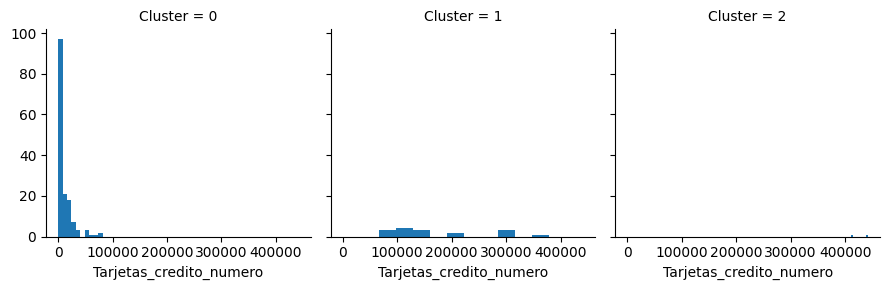

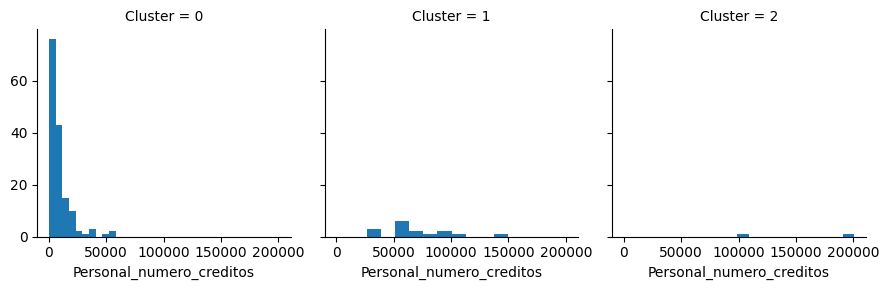

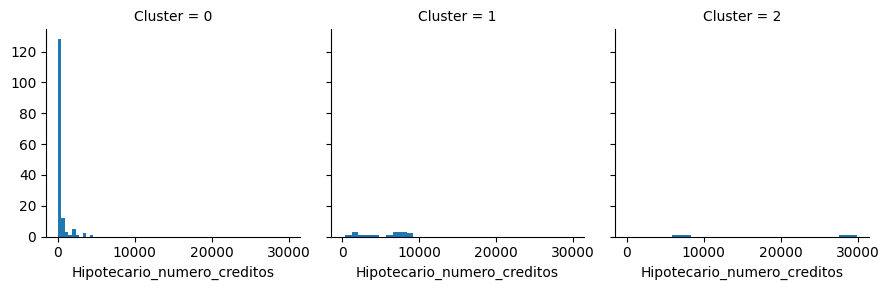

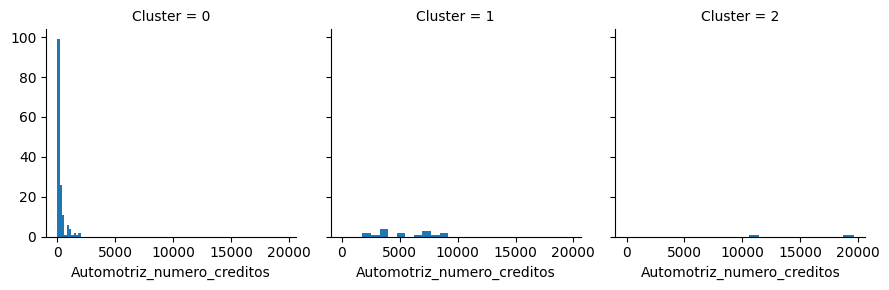

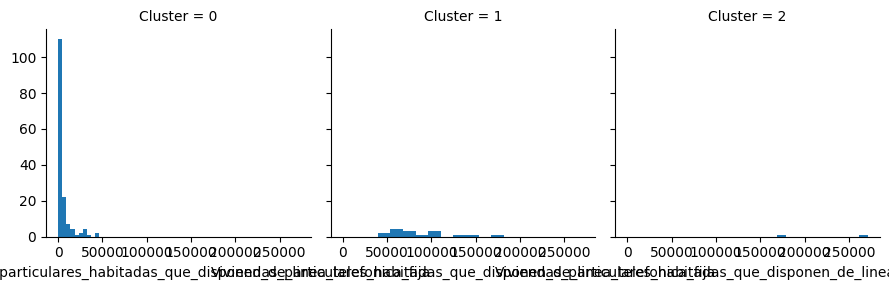

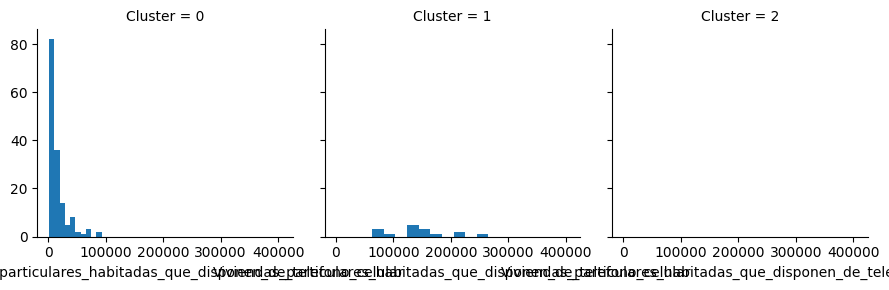

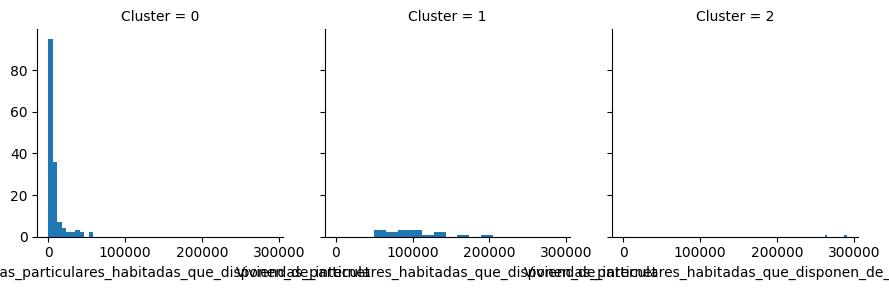

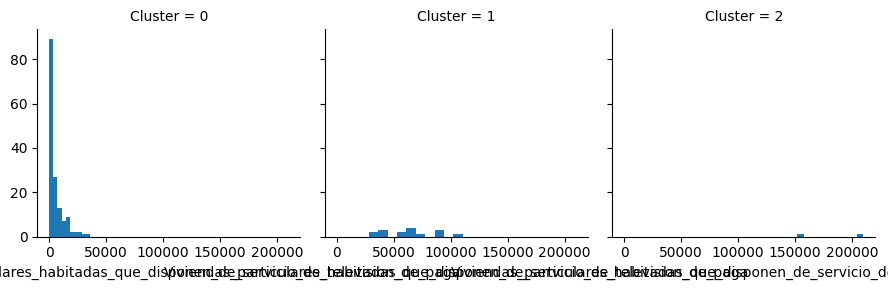

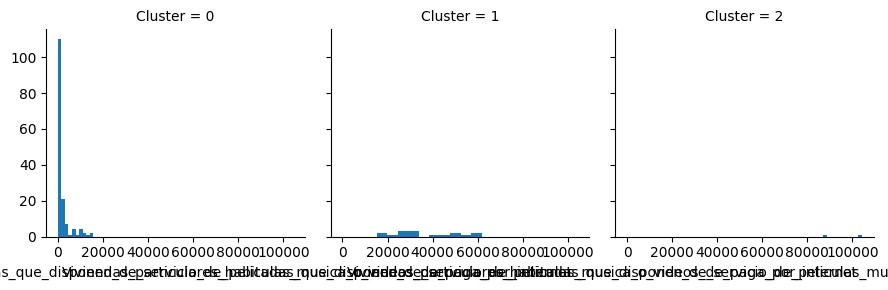

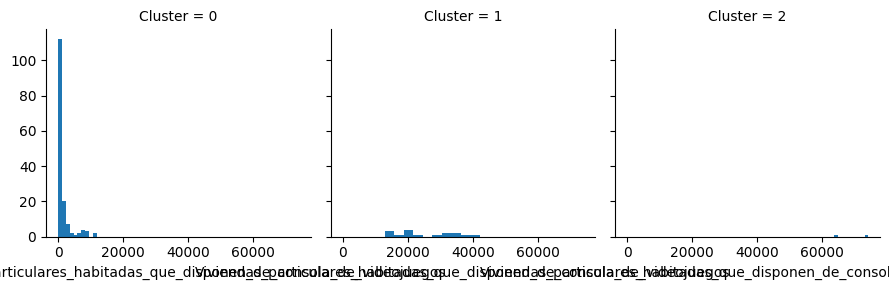

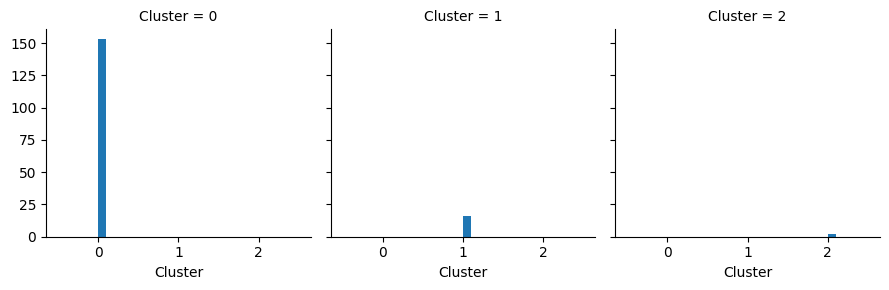

In [ ]:
for c in filtered_data:
    grid= sns.FacetGrid(filtered_data, col='Cluster')
    grid.map(plt.hist, c)

In [ ]:
display(filtered_data)

Tarjetas_credito_numero  Personal_numero_creditos  \
0                      13721                     12302   
1                      23872                     11159   
2                      31639                     14382   
3                       7279                      6457   
4                      14463                     12871   
..                       ...                       ...   
166                   211443                     65129   
167                    49805                     58375   
168                      405                       844   
169                      878                      7658   
170                      897                       895   

     Hipotecario_numero_creditos  Automotriz_numero_creditos  \
0                            109                         240   
1                            229                         363   
2                           2006                         898   
3                             34                         139   
4                            916                         319   
..                           ...                         ...   
166                         7994                        7166   
167                          242                        1164   
168                            2                          40   
169                            1                          73   
170                           86                          68   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243                        
2                                                14423                        
3                                                 3198                        
4                                                 6258                        
..                                                 ...                        
166                                             110030                        
167                                              46114                        
168                                                936                        
169                                                457                        
170                                               1166                        

     Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                                18132                   
1                                                25177                   
2                                                38093                   
3                                                13674                   
4                                                26791                   
..                                                 ...                   
166                                             149388                   
167                                              92049                   
168                                               5874                   
169                                              15221                   
170                                               3518                   

     Viviendas_particulares_habitadas_que_disponen_de_internet  \
0                                                 7220           
1                                                11292           
2                                                20862           
3                                                 6198           
4                                                14691           
..                                                 ...           
166                                             119740           
167                                              58224           
168                                               1369           
169                                      

## Tools for interpretation

In [ ]:
merged_data.to_excel('/content/drive/MyDrive/Colab Notebooks/Merge_dirty.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_boxplots(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns
    num_columns = len(numeric_columns)

    # Set up the grid dimensions for 4 plots per row
    rows = math.ceil(num_columns / 4)
    fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Generate a boxplot for each numeric column
    for i, column in enumerate(numeric_columns):
        axes[i].boxplot(df[column].dropna())
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Values')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout for clarity
    plt.tight_layout()
    plt.show()


In [ ]:
from scipy.stats import skew
import warnings

def find_top_traits(df, variance_threshold=1e-10):
    # Dictionary to store traits
    traits_summary = {
        'Column': [],
        'Median': [],
        'IQR': []
    }

    # Iterate through each numeric column except 'Cluster' and 'Clave_municipio'
    for column in df.select_dtypes(include='number').columns:
        if column in ['Cluster', 'Clave_municipio']:
            continue  # Skip the 'Cluster' and 'Clave_municipio' columns

        col_data = df[column].dropna()

        # Calculate median and IQR
        median = np.median(col_data)
        q1 = np.percentile(col_data, 25)
        q3 = np.percentile(col_data, 75)
        iqr = q3 - q1

        # Append to traits_summary
        traits_summary['Column'].append(column)
        traits_summary['Median'].append(median)
        traits_summary['IQR'].append(iqr)

    # Convert to DataFrame for easier analysis
    traits_df = pd.DataFrame(traits_summary)

    # Sort the traits by IQR in ascending order
    sorted_traits = traits_df.sort_values(by='IQR', ascending=True).reset_index(drop=True)

    # Display the results
    return sorted_traits


In [ ]:
from scipy.stats import f_oneway

def perform_anova(df, group_col):
    # Dictionary to store ANOVA results
    anova_results = {
        'Variable': [],
        'F-statistic': [],
        'p-value': []
    }

    # Get list of numeric columns, excluding the grouping column
    numeric_columns = df.select_dtypes(include='number').columns
    numeric_columns = [col for col in numeric_columns if col != group_col]

    # Perform ANOVA for each numeric variable
    for col in numeric_columns:
        # Group the data by the specified column
        groups = [group[col].dropna().values for name, group in df.groupby(group_col)]

        # Calculate F-statistic and p-value
        f_stat, p_val = f_oneway(*groups)

        # Append results
        anova_results['Variable'].append(col)
        anova_results['F-statistic'].append(f_stat)
        anova_results['p-value'].append(p_val)

    # Convert results to DataFrame
    anova_df = pd.DataFrame(anova_results)

    # Sort by p-value to show most significant variables first
    anova_df = anova_df.sort_values(by='p-value').reset_index(drop=True)

    return anova_df

In [ ]:
cluster_0_dirt = merged_data[merged_data['Cluster'] == 0].reset_index(drop=True)
cluster_1_dirt = merged_data[merged_data['Cluster'] == 1].reset_index(drop=True)
cluster_2_dirt = merged_data[merged_data['Cluster'] == 2].reset_index(drop=True)


In [ ]:
#plot_boxplots(cluster_0_dirt)

In [ ]:
#plot_boxplots(cluster_1_dirt)

In [ ]:
#plot_boxplots(cluster_2_dirt)

In [ ]:
#find_top_traits(cluster_0_dirt)

In [ ]:
#find_top_traits(cluster_1_dirt)

In [ ]:
#find_top_traits(cluster_2_dirt)

In [ ]:
display(merged_data)

Clave_municipio                Region      Estado  \
0                  0     Occidente y bajio  Guanajuato   
1                  1     Occidente y bajio  Guanajuato   
2                  2     Occidente y bajio  Guanajuato   
3                  3     Occidente y bajio  Guanajuato   
4                  4     Occidente y bajio  Guanajuato   
..               ...                   ...         ...   
166              166  Centro sur y oriente      Mexico   
167              167  Centro sur y oriente      Mexico   
168              168  Centro sur y oriente      Mexico   
169              169  Centro sur y oriente      Mexico   
170              170  Centro sur y oriente      Mexico   

                       Municipio  Poblacion_adulta  Poblacion_adulta_mujeres  \
0                        Abasolo             66565                     34605   
1                       Acambaro             82330                     43490   
2          San Miguel De Allende            126897                     67897   
3                 Apaseo El Alto             45885                     24111   
4               Apaseo El Grande             81652                     42597   
..                           ...               ...                       ...   
166           Cuautitlan Izcalli            441969                    230854   
167  Valle De Chalco Solidaridad            287132                    149210   
168                     Luvianos             19409                     10167   
169          San Jose Del Rincon             65418                     33670   
170                    Tonanitla             10910                      5589   

     Poblacion_adulta_hombres  Tipo_poblacion Indice_rezago_social  \
0                       31960          Urbano                 Bajo   
1                       38840          Urbano             Muy bajo   
2                       59000          Urbano                 Bajo   
3                       21774          Urbano                 Bajo   
4                       39055          Urbano             Muy bajo   
..                        ...             ...                  ...   
166                    211115  Semi-metropoli             Muy bajo   
167                    137922  Semi-metropoli             Muy bajo   
168                      9242     Semi-urbano                Medio   
169                     31748          Urbano                 Alto   
170                      5321   En transicion             Muy bajo   

     Tarjetas_credito_numero  ...  \
0                      13721  ...   
1                      23872  ...   
2                      31639  ...   
3                       7279  ...   
4                      14463  ...   
..                       ...  ...   
166                   211443  ...   
167                    49805  ...   
168                      405  ...   
169                      878  ...   
170                      897  ...   

     Viviendas_particulares_habitadas_que_disponen_de_telefono_celular  \
0                                                18132                   
1                                                25177                   
2                                                38093                   
3                                                13674                   
4                                                26791                   
..                                                 ...                   
166                                             149388                   
167                                              92049                   
168                                               5874                   
169                                              15221                   
170                                               3518                   

     Viviendas_particulares_habitadas_que_disponen_de_internet  \
0                                                 7220           
1                                       

In [ ]:
columns_to_keep = [
    'Clave_municipio', 'Region', 'Estado', 'Municipio', 'Poblacion_adulta_mujeres',
    'Poblacion_adulta_hombres', 'Tipo_poblacion', 'Penetracion_financiera',
    'Tarjetas_credito_numero', 'Personal_numero_creditos', 'Hipotecario_numero_creditos',
    'Automotriz_numero_creditos', 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija',
    'Viviendas_particulares_habitadas_que_disponen_de_telefono_celular',
    'Viviendas_particulares_habitadas_que_disponen_de_internet',
    'Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga',
    'Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet',
    'Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos',
    'Cluster'
]

# Keep only the specified columns
merged_data = merged_data[columns_to_keep]



In [ ]:
merged_data.to_excel('/content/drive/MyDrive/Colab Notebooks/merge_clean.xlsx', index=False)

In [ ]:
cluster_0_cln = merged_data[merged_data['Cluster'] == 0].reset_index(drop=True)
cluster_1_cln = merged_data[merged_data['Cluster'] == 1].reset_index(drop=True)
cluster_2_cln = merged_data[merged_data['Cluster'] == 2].reset_index(drop=True)


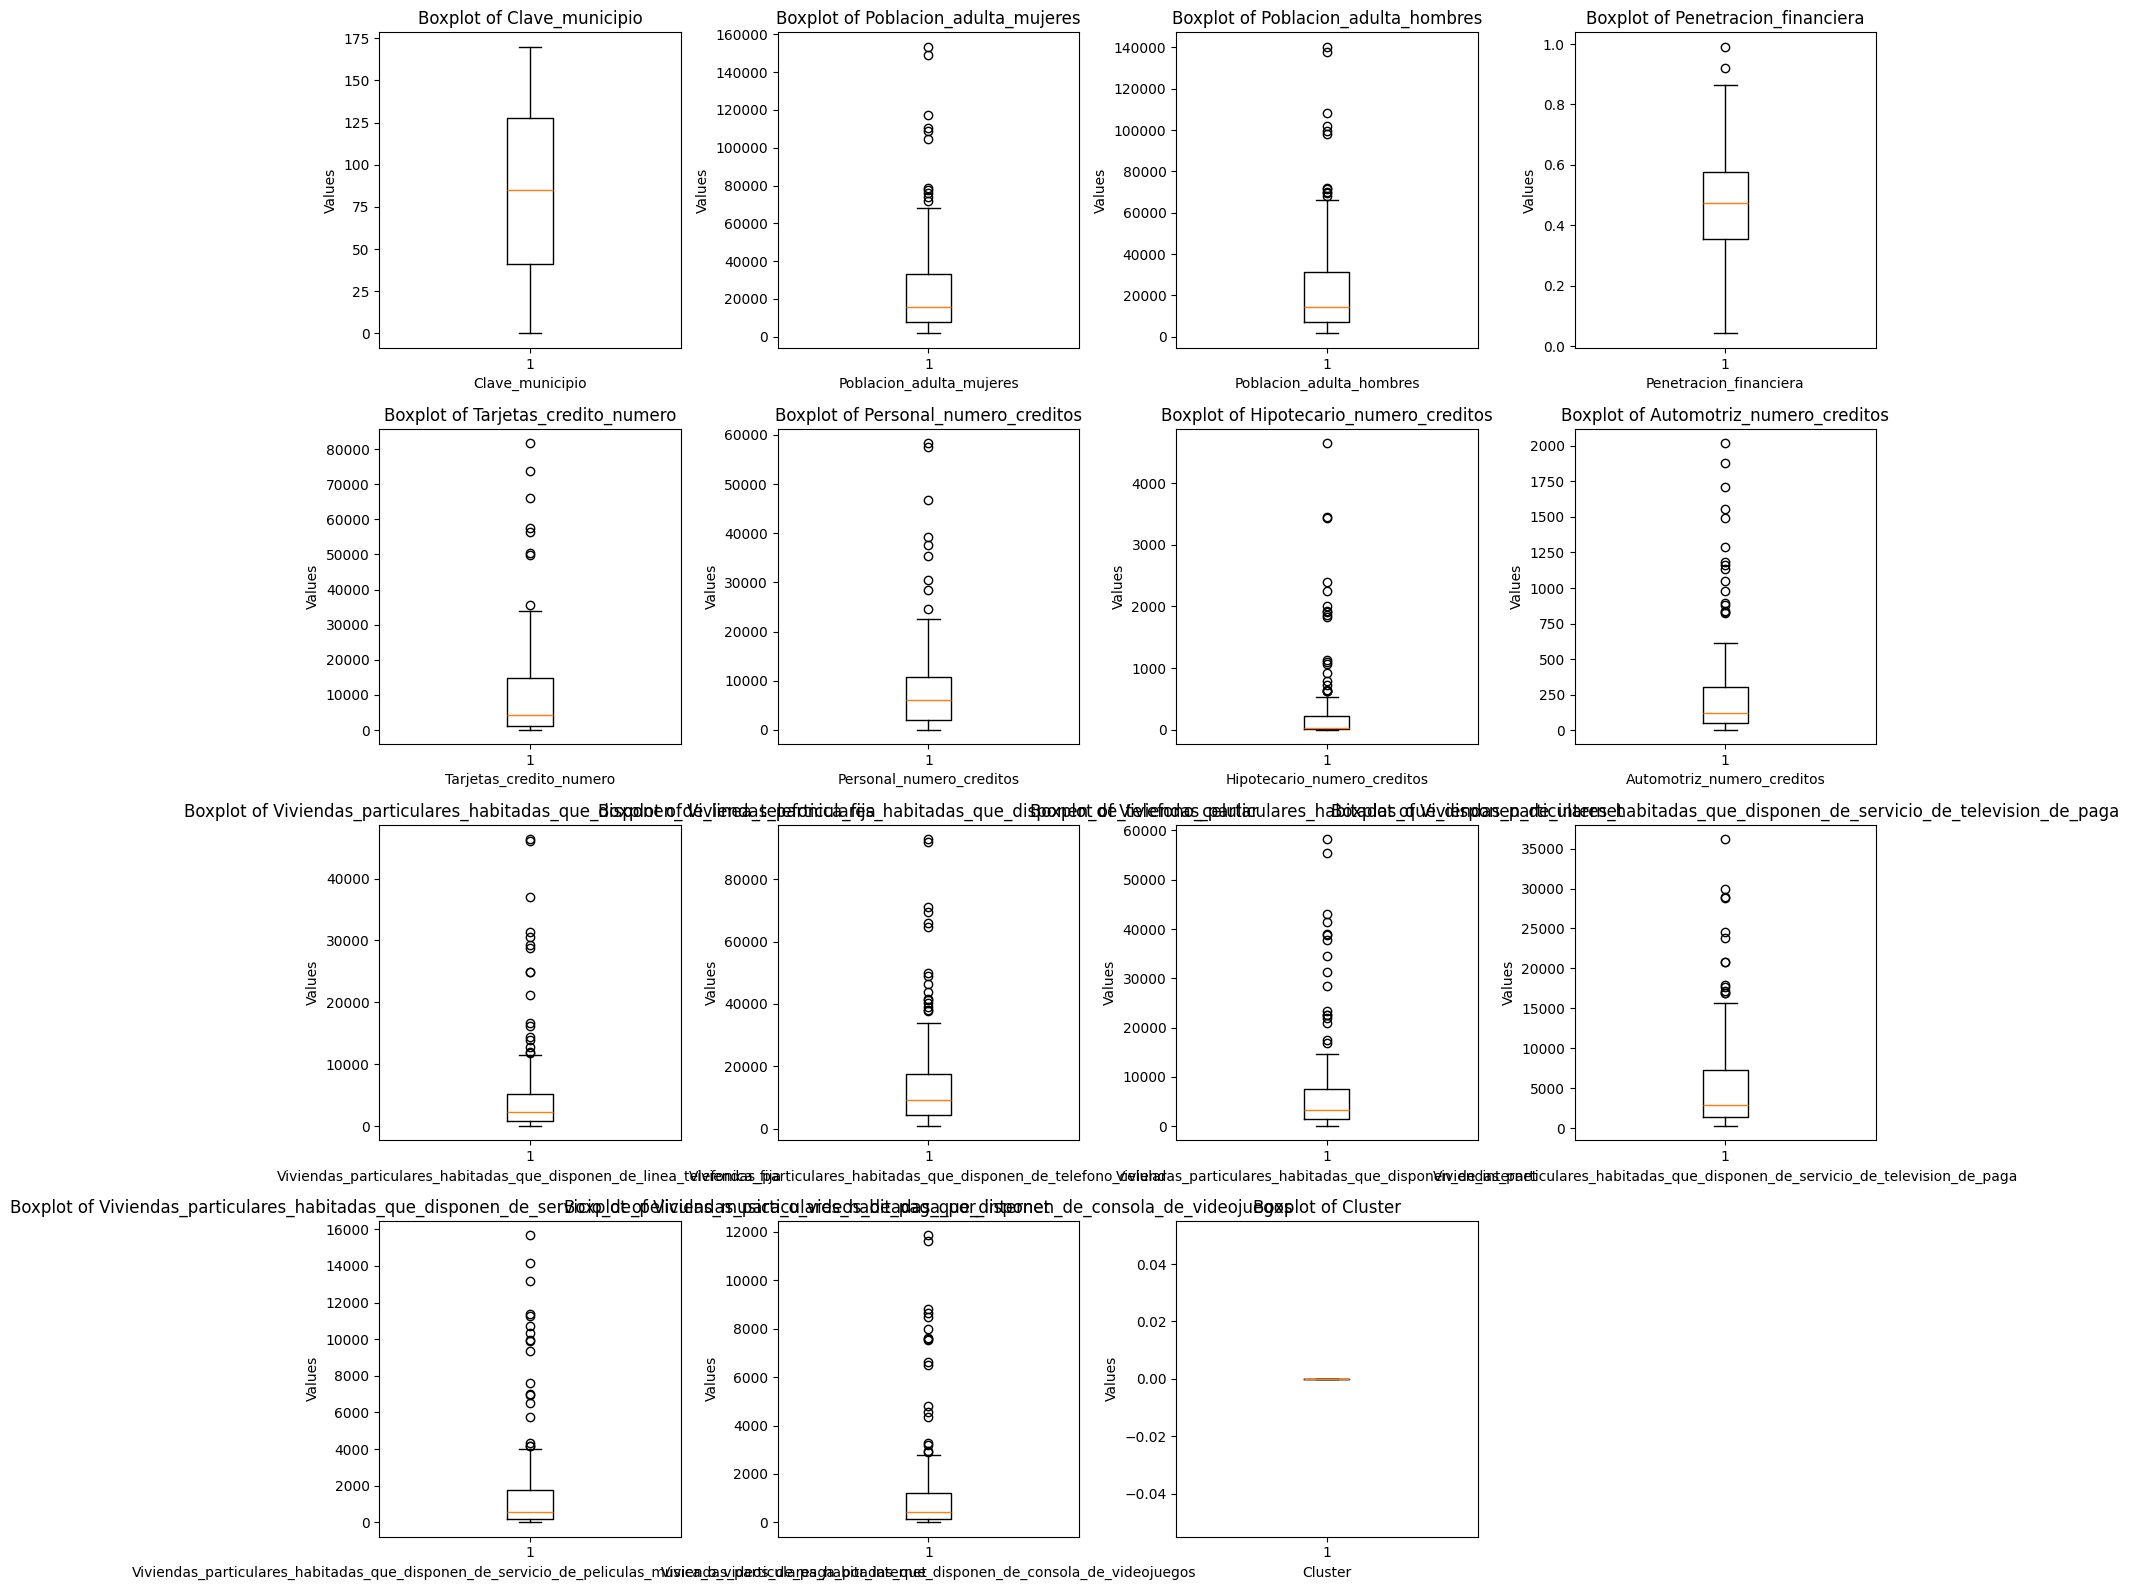

In [ ]:
plot_boxplots(cluster_0_cln)

In [ ]:
find_top_traits(cluster_0_cln)

Column        Median  \
0                              Penetracion_financiera      0.472977   
1                         Hipotecario_numero_creditos     24.000000   
2                          Automotriz_numero_creditos    123.000000   
3   Viviendas_particulares_habitadas_que_disponen_...    447.000000   
4   Viviendas_particulares_habitadas_que_disponen_...    555.000000   
5   Viviendas_particulares_habitadas_que_disponen_...   2229.000000   
6   Viviendas_particulares_habitadas_que_disponen_...   2837.000000   
7   Viviendas_particulares_habitadas_que_disponen_...   3221.000000   
8                            Personal_numero_creditos   6133.000000   
9   Viviendas_particulares_habitadas_que_disponen_...   9181.000000   
10                            Tarjetas_credito_numero   4265.000000   
11                           Poblacion_adulta_hombres  14269.000000   
12                           Poblacion_adulta_mujeres  15575.000000   

             IQR  
0       0.221769  
1     219.000000  
2     258.000000  
3    1069.000000  
4    1548.000000  
5    4268.000000  
6    5891.000000  
7    6042.000000  
8    8754.000000  
9   13292.000000  
10  13734.000000  
11  24127.000000  
12  25447.000000

In [ ]:
perform_anova(filtered_data, 'Cluster')

Variable  F-statistic  \
0  Viviendas_particulares_habitadas_que_disponen_...   669.806217   
1  Viviendas_particulares_habitadas_que_disponen_...   593.380386   
2  Viviendas_particulares_habitadas_que_disponen_...   530.603804   
3  Viviendas_particulares_habitadas_que_disponen_...   512.245022   
4  Viviendas_particulares_habitadas_que_disponen_...   509.744490   
5                         Automotriz_numero_creditos   426.305525   
6  Viviendas_particulares_habitadas_que_disponen_...   423.922442   
7                            Tarjetas_credito_numero   370.119602   
8                           Personal_numero_creditos   215.280349   
9                        Hipotecario_numero_creditos   164.161535   

        p-value  
0  8.905206e-81  
1  7.071640e-77  
2  2.497236e-73  
3  3.189919e-72  
4  4.540401e-72  
5  1.519558e-66  
6  2.251533e-66  
7  2.736271e-62  
8  4.455445e-47  
9  3.032248e-40

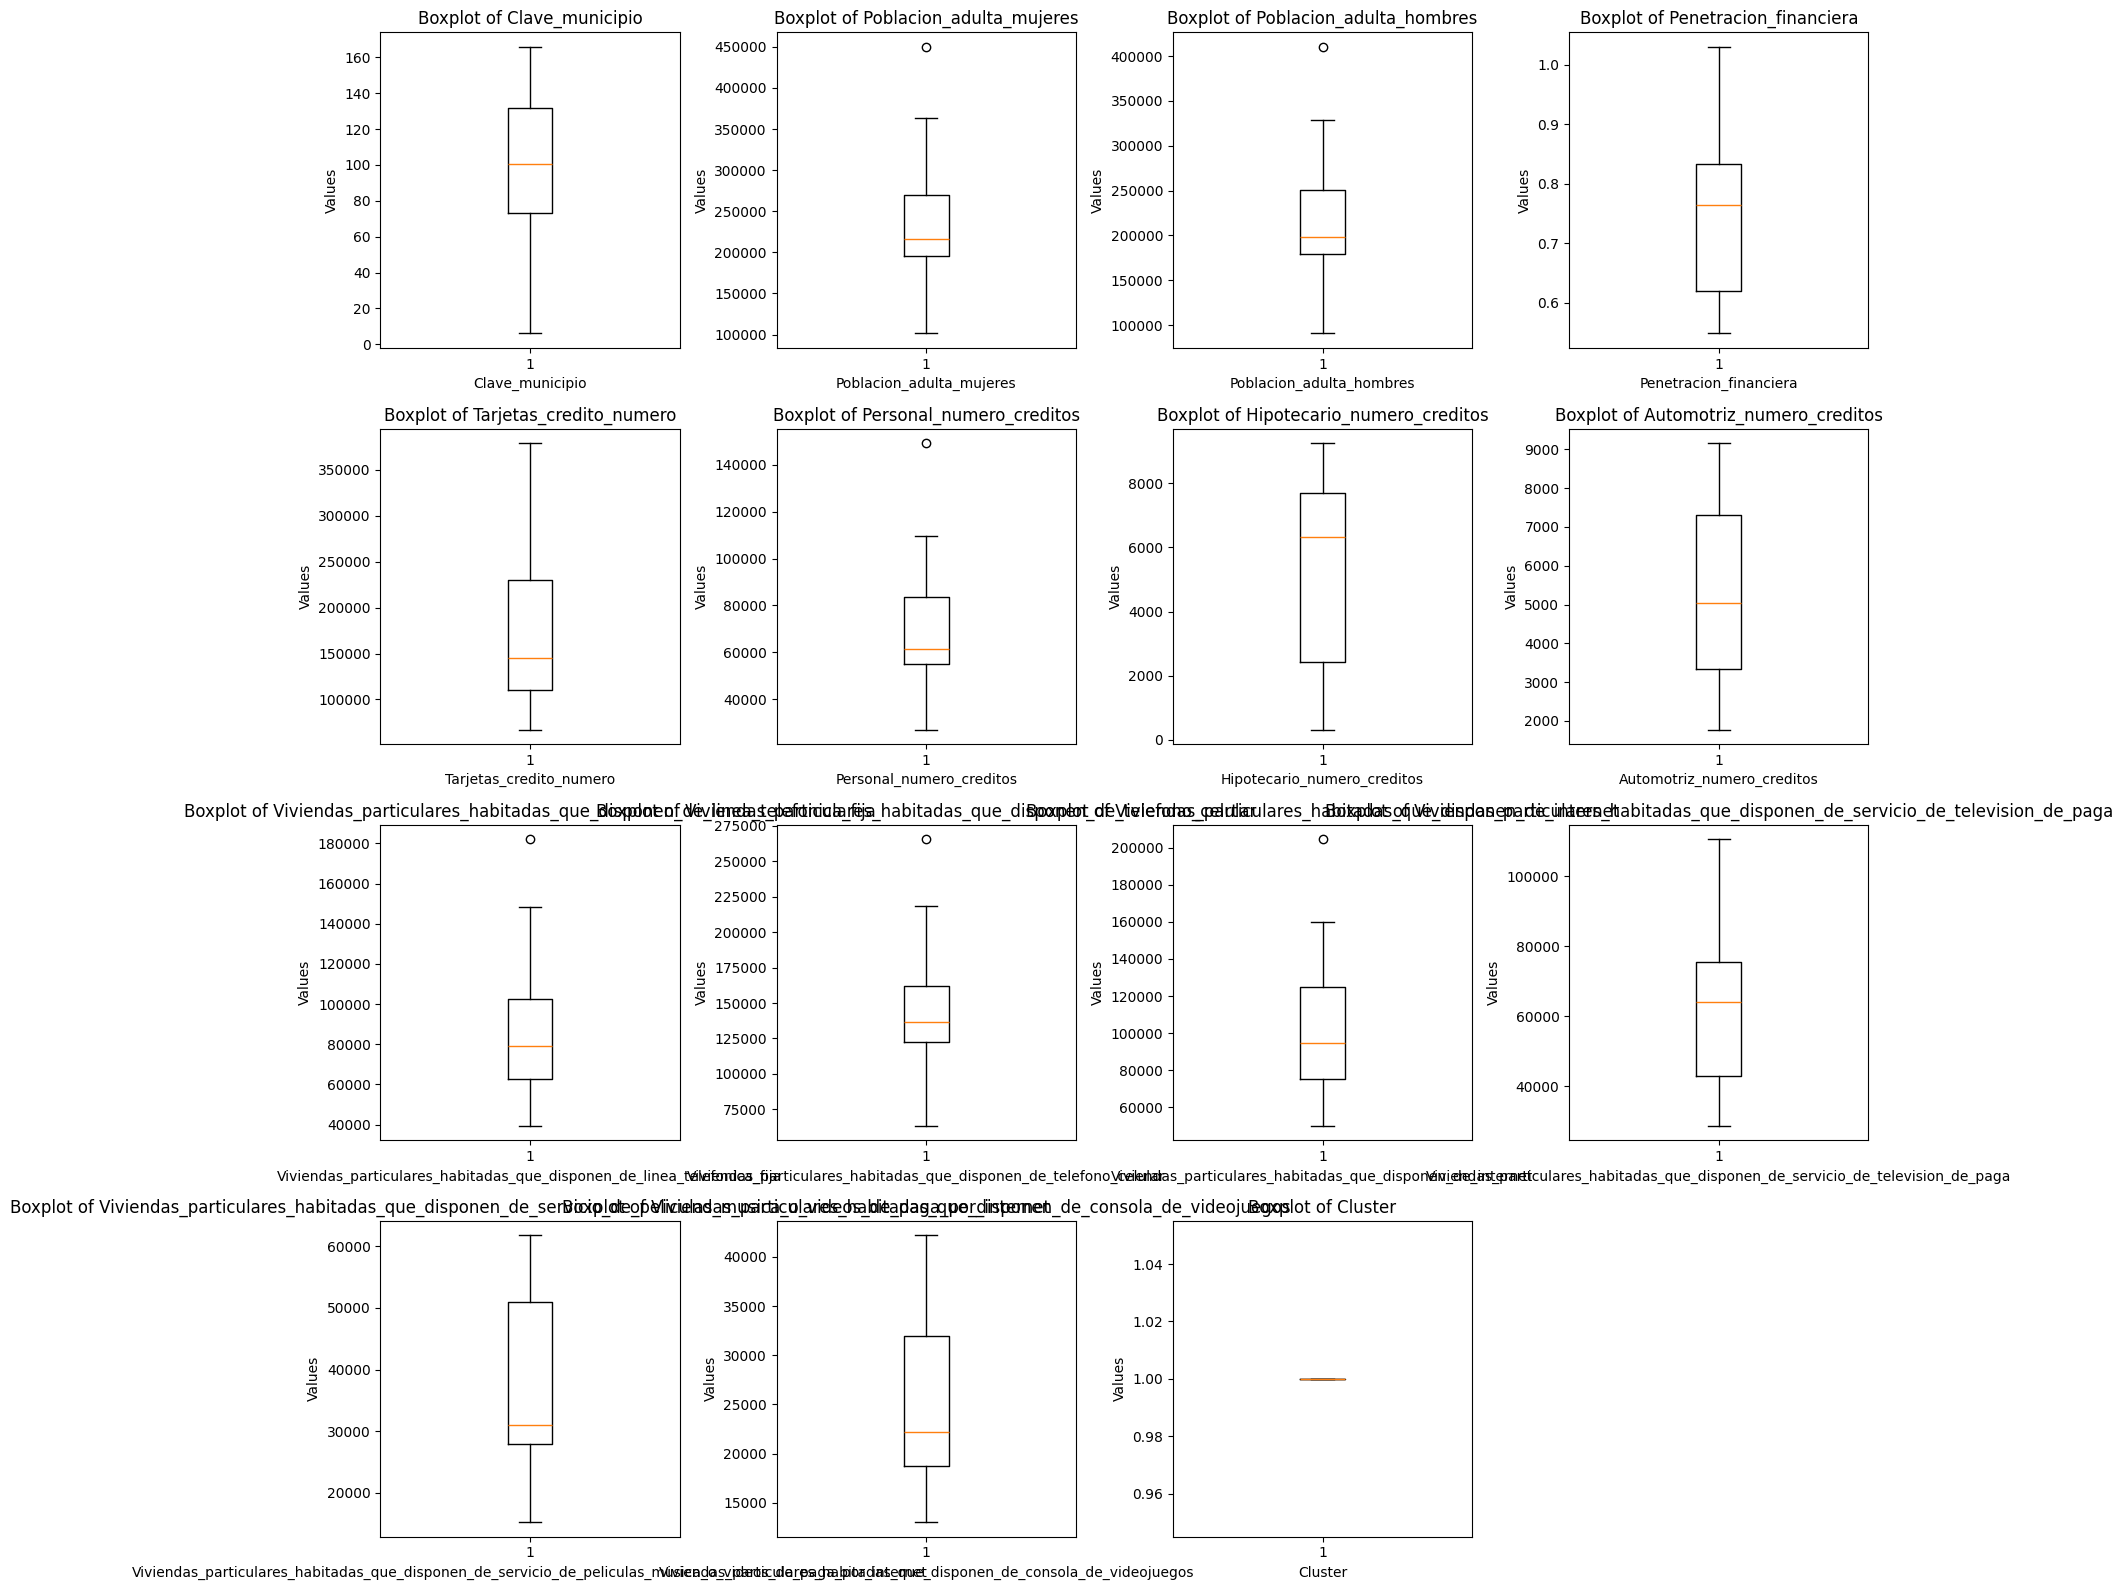

In [ ]:
plot_boxplots(cluster_1_cln)

In [ ]:
find_top_traits(cluster_1_cln)

Column         Median  \
0                              Penetracion_financiera       0.765251   
1                          Automotriz_numero_creditos    5041.000000   
2                         Hipotecario_numero_creditos    6331.000000   
3   Viviendas_particulares_habitadas_que_disponen_...   22184.000000   
4   Viviendas_particulares_habitadas_que_disponen_...   31044.000000   
5                            Personal_numero_creditos   61453.000000   
6   Viviendas_particulares_habitadas_que_disponen_...   63910.500000   
7   Viviendas_particulares_habitadas_que_disponen_...  136410.000000   
8   Viviendas_particulares_habitadas_que_disponen_...   79052.000000   
9   Viviendas_particulares_habitadas_que_disponen_...   94542.000000   
10                           Poblacion_adulta_hombres  198413.500000   
11                           Poblacion_adulta_mujeres  216654.000000   
12                            Tarjetas_credito_numero  145037.500000   

              IQR  
0        0.214308  
1     3965.750000  
2     5242.750000  
3    13147.250000  
4    23143.750000  
5    28508.500000  
6    32373.500000  
7    39429.250000  
8    40142.500000  
9    49613.500000  
10   71266.750000  
11   74258.000000  
12  119942.500000

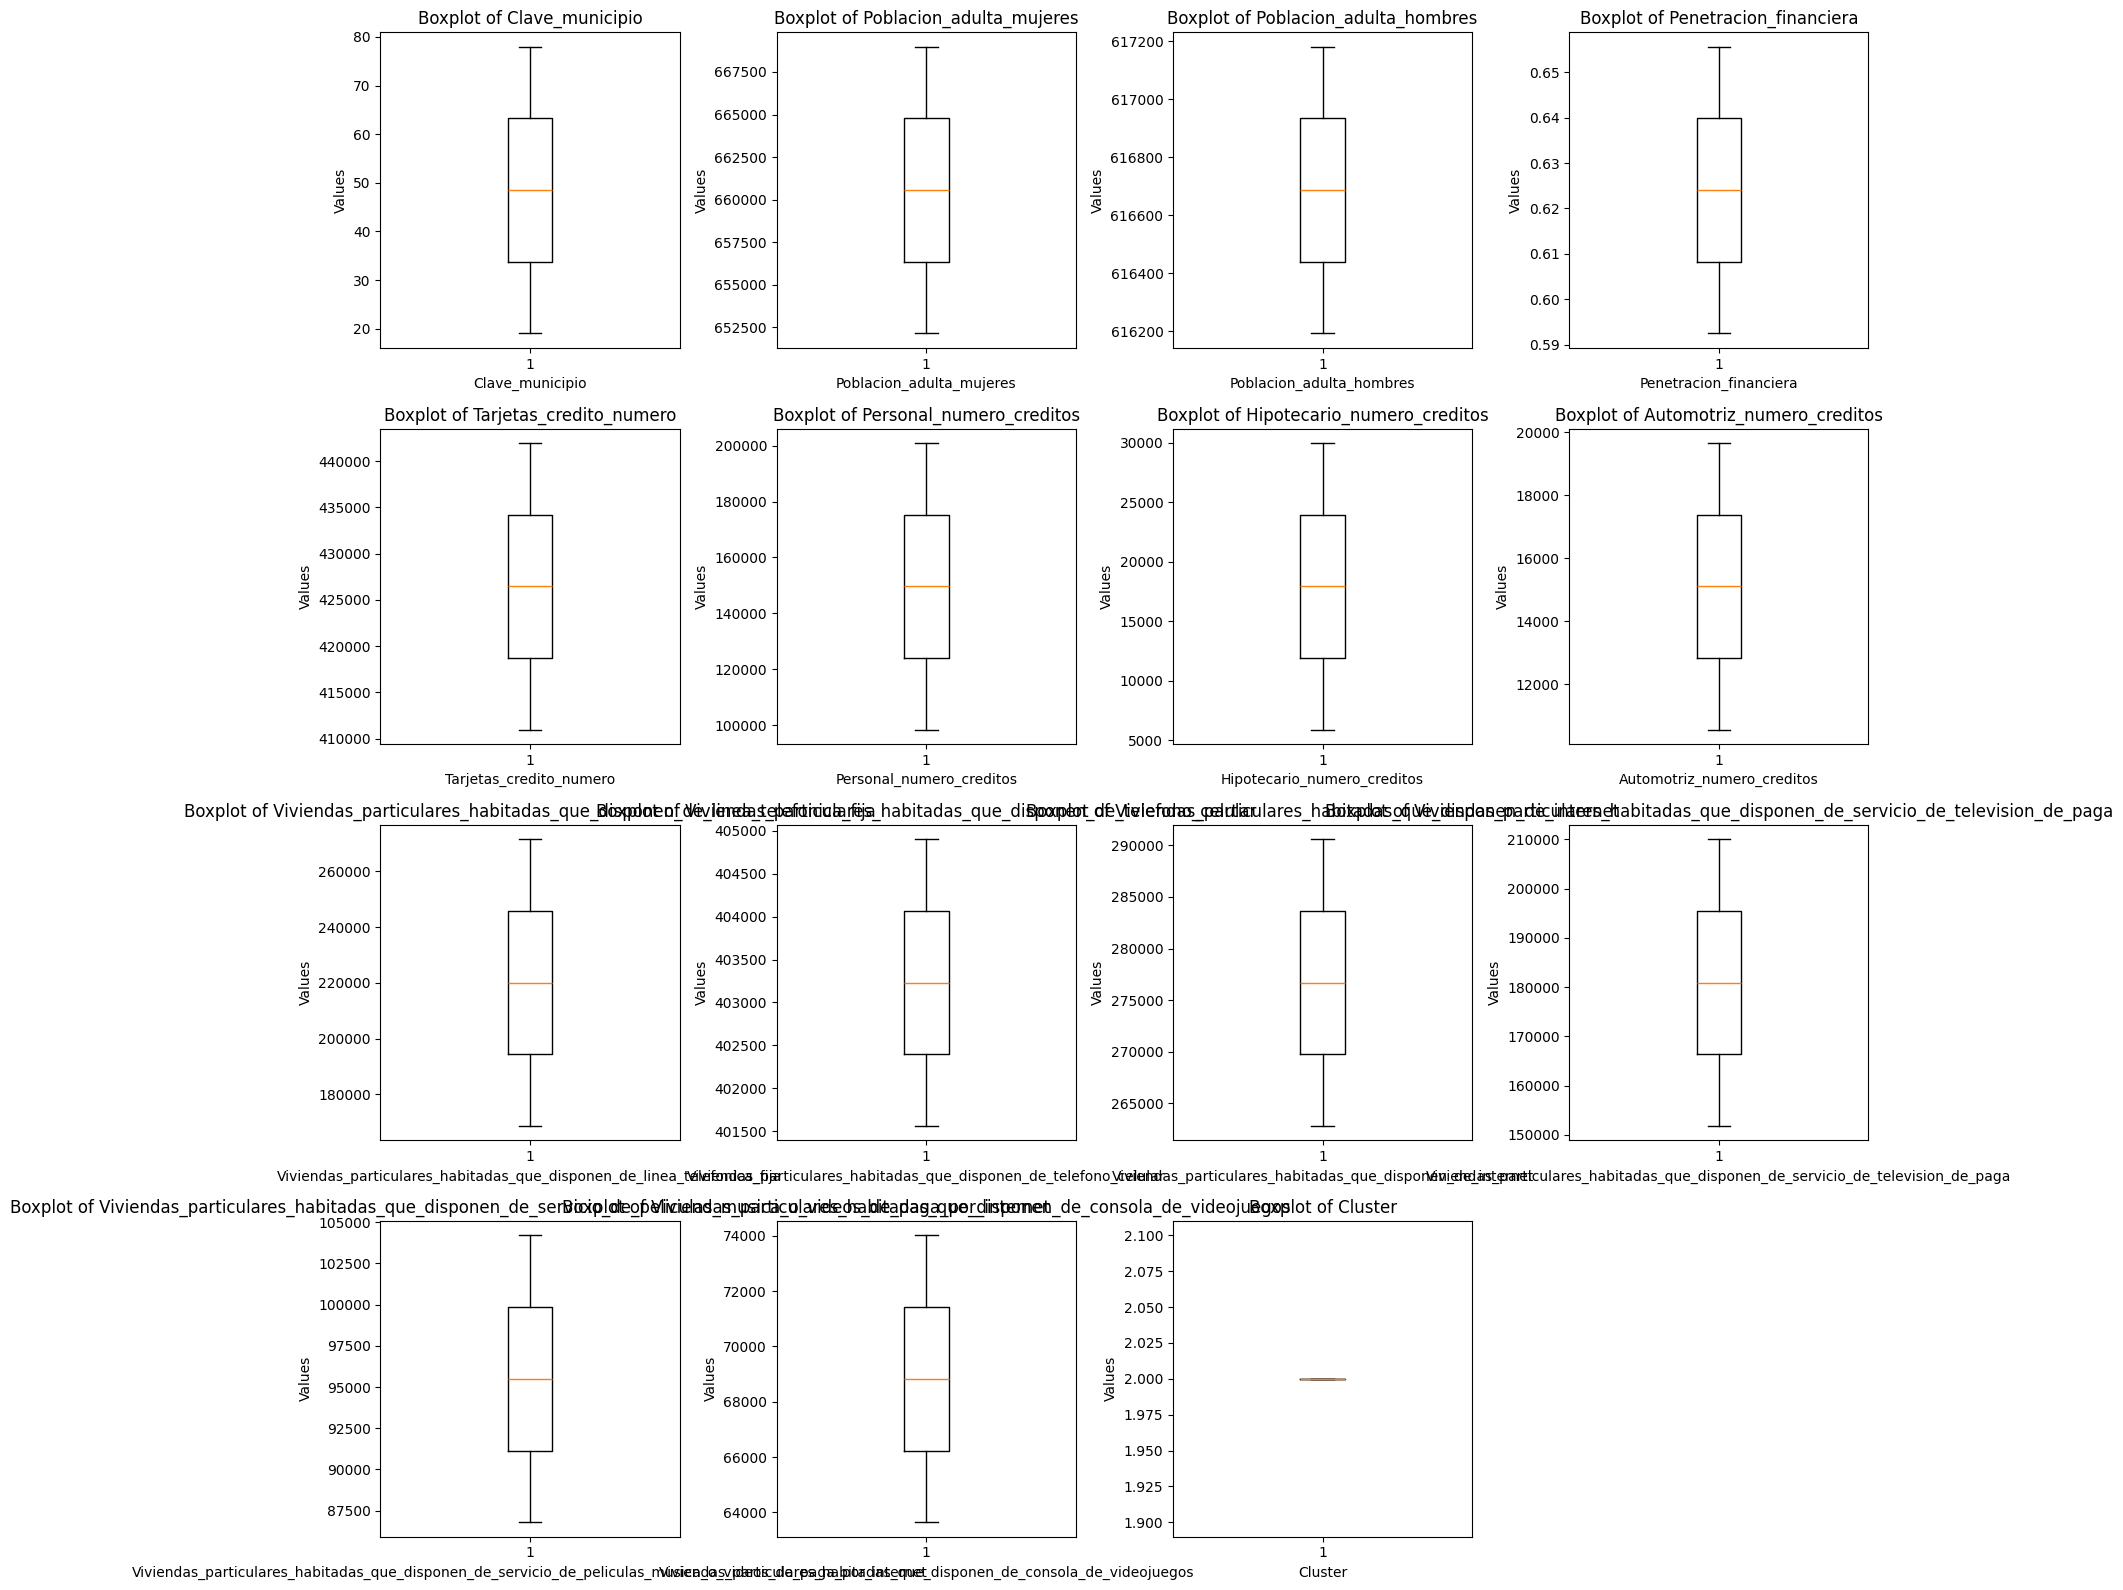

In [ ]:
plot_boxplots(cluster_2_cln)

In [ ]:
find_top_traits(cluster_2_cln)

Column         Median  \
0                              Penetracion_financiera       0.624053   
1                            Poblacion_adulta_hombres  616687.000000   
2   Viviendas_particulares_habitadas_que_disponen_...  403231.500000   
3                          Automotriz_numero_creditos   15108.000000   
4   Viviendas_particulares_habitadas_que_disponen_...   68829.000000   
5                            Poblacion_adulta_mujeres  660559.500000   
6   Viviendas_particulares_habitadas_que_disponen_...   95498.000000   
7                         Hipotecario_numero_creditos   17931.500000   
8   Viviendas_particulares_habitadas_que_disponen_...  276699.500000   
9                             Tarjetas_credito_numero  426456.500000   
10  Viviendas_particulares_habitadas_que_disponen_...  180915.500000   
11                           Personal_numero_creditos  149681.000000   
12  Viviendas_particulares_habitadas_que_disponen_...  220069.000000   

             IQR  
0       0.031562  
1     494.000000  
2    1669.500000  
3    4552.000000  
4    5190.000000  
5    8427.500000  
6    8702.000000  
7   12037.500000  
8   13888.500000  
9   15504.500000  
10  29134.500000  
11  51256.000000  
12  51433.000000

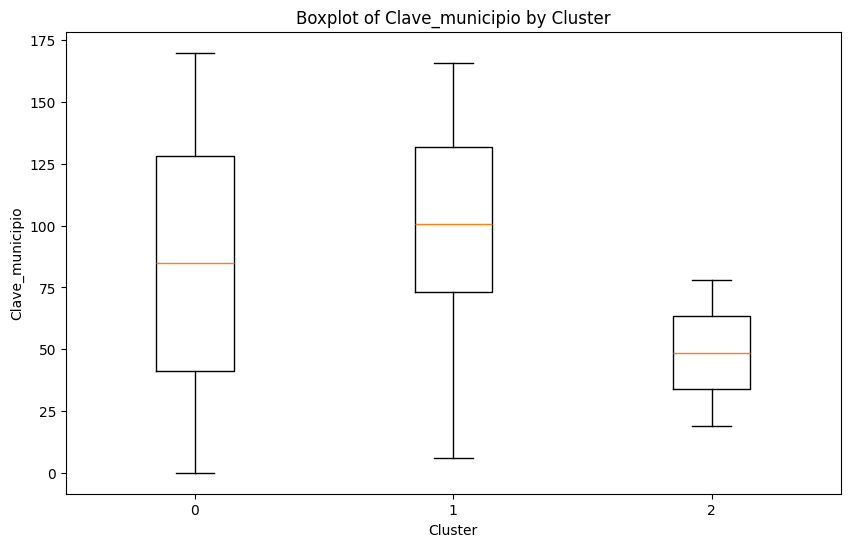

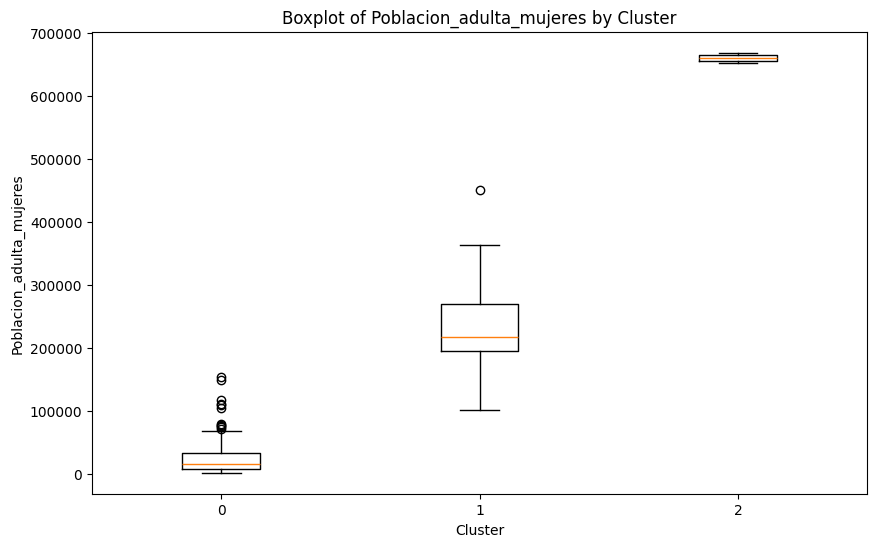

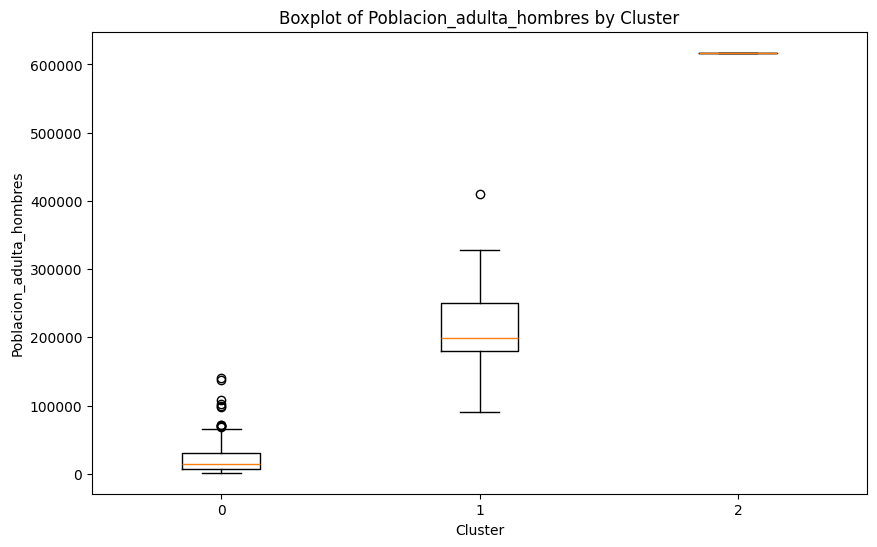

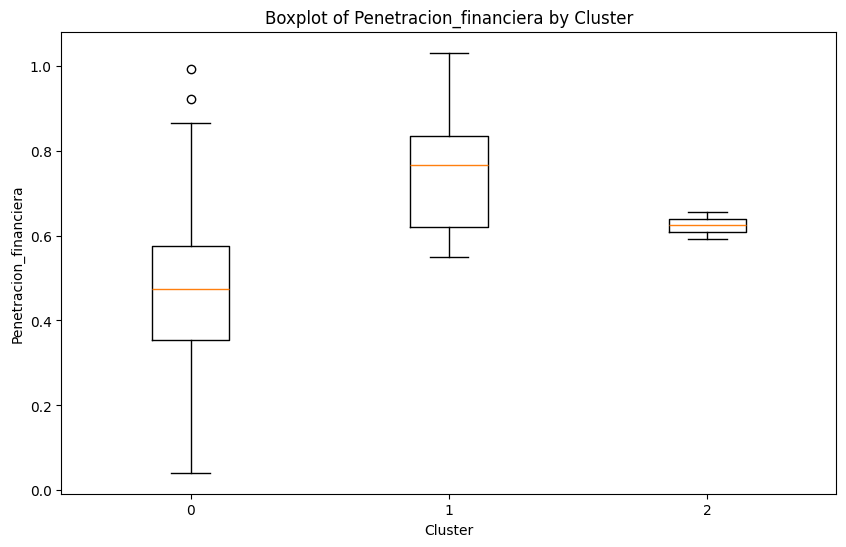

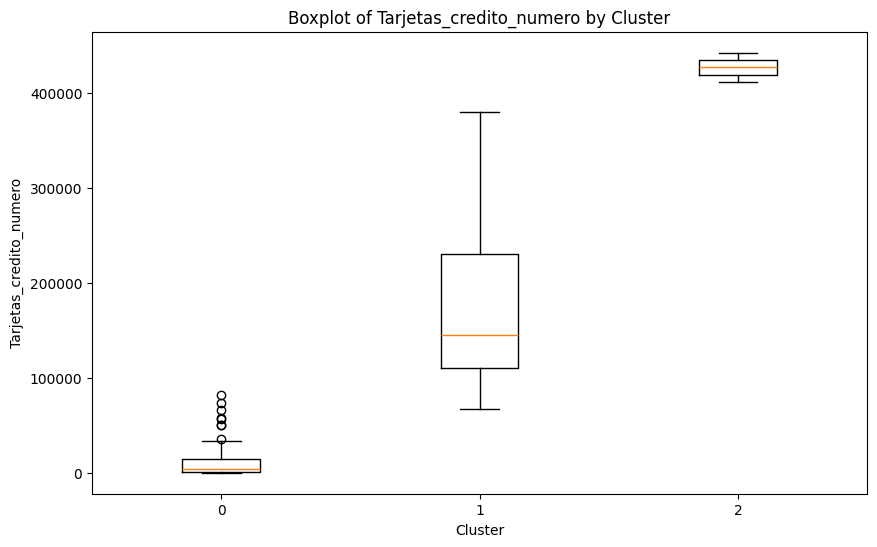

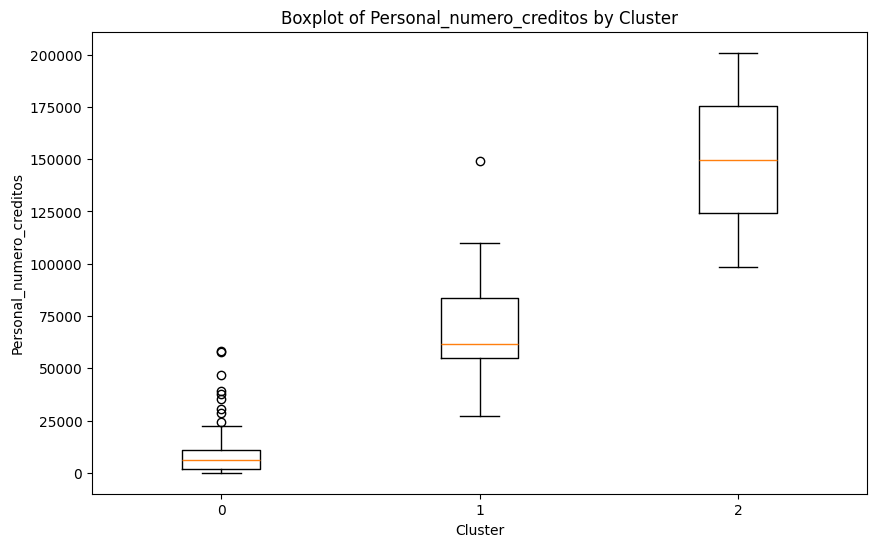

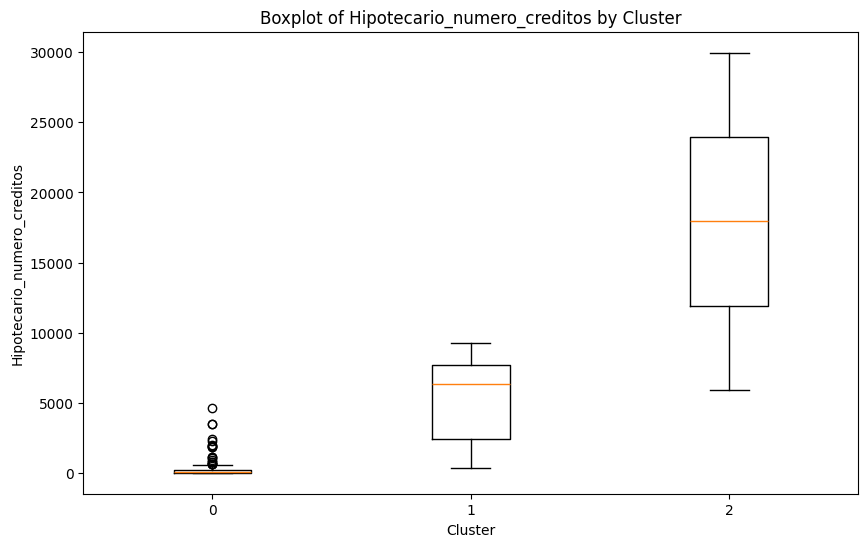

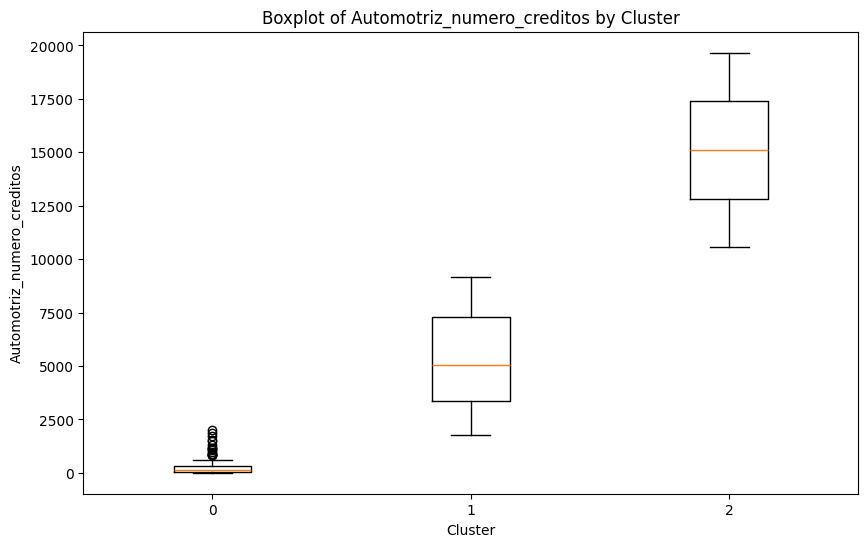

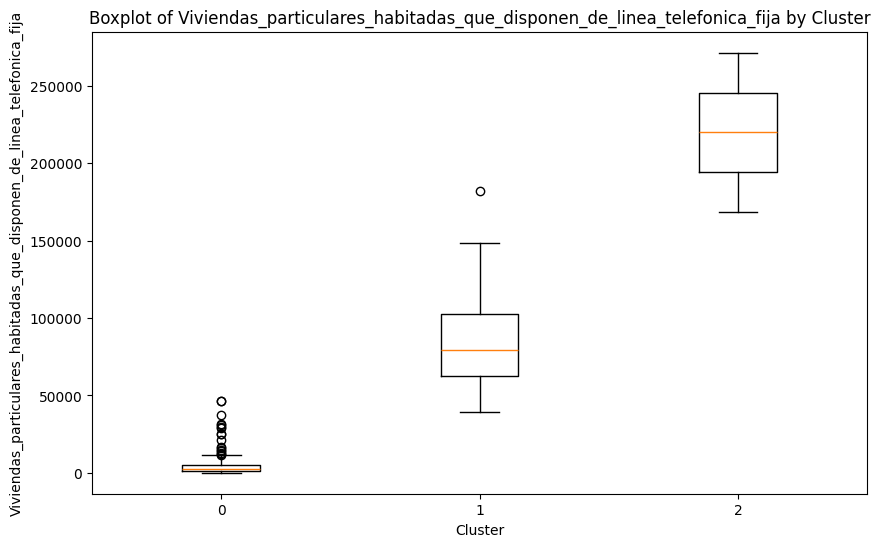

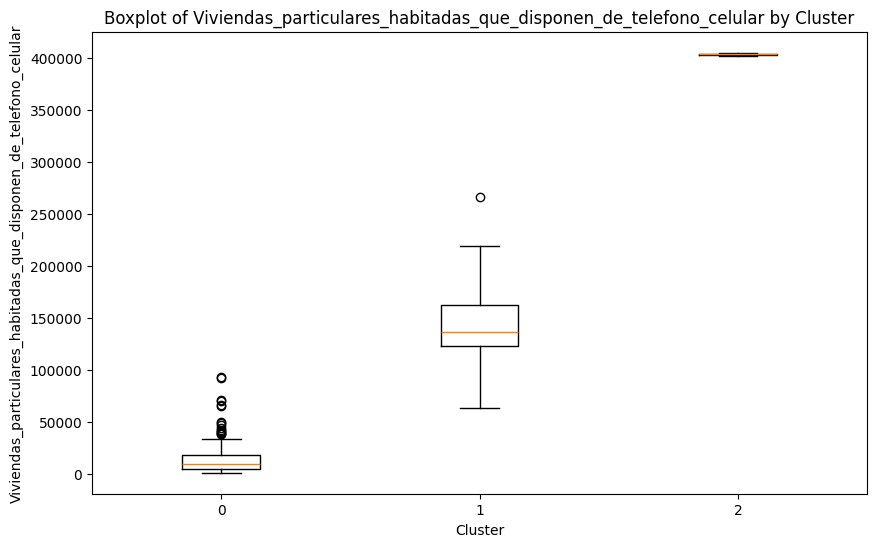

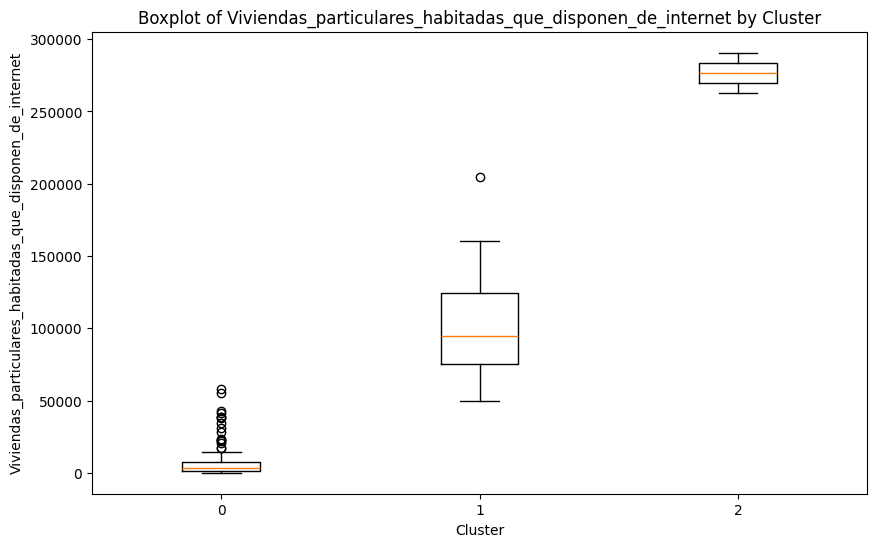

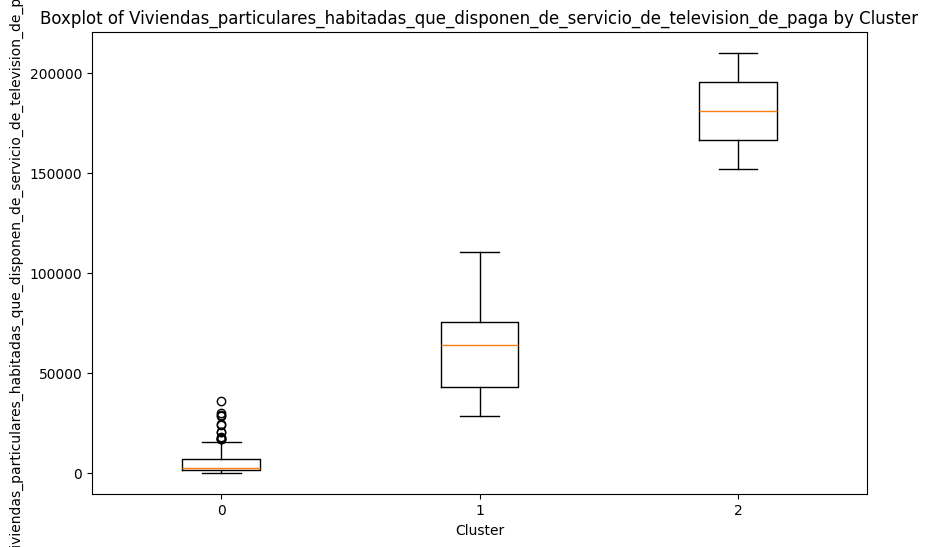

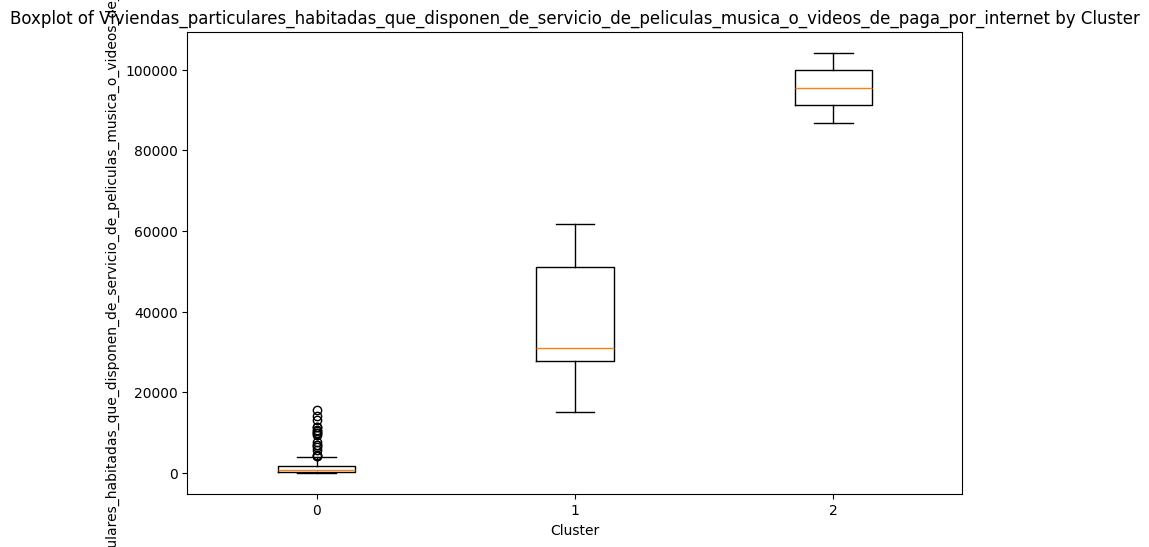

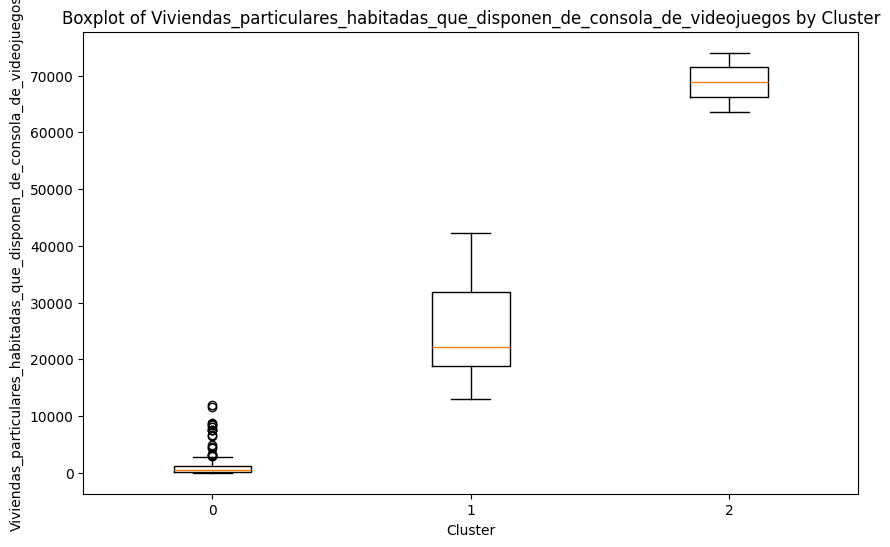

In [ ]:
def plot_boxplots_by_cluster(df, cluster_column='Cluster'):
    # Get all numeric columns except the cluster column
    numeric_columns = df.select_dtypes(include=['number']).columns
    columns_to_plot = [col for col in numeric_columns if col != cluster_column]

    # Loop over each numeric column and create a boxplot
    for column in columns_to_plot:
        plt.figure(figsize=(10, 6))
        plt.boxplot(
            [df[df[cluster_column] == cluster][column].dropna() for cluster in df[cluster_column].unique()],
            labels=df[cluster_column].unique()
        )
        plt.xlabel(cluster_column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column} by {cluster_column}")
        plt.show()

# Usage
plot_boxplots_by_cluster(merged_data)

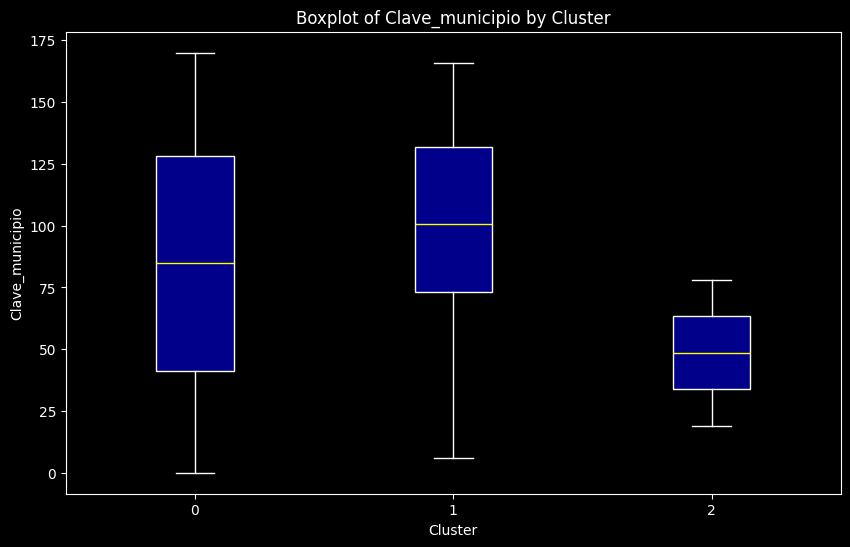

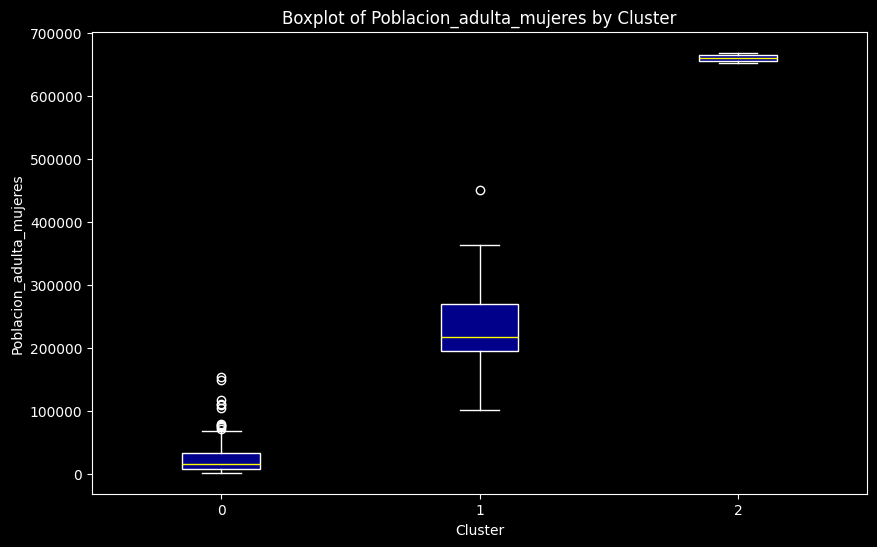

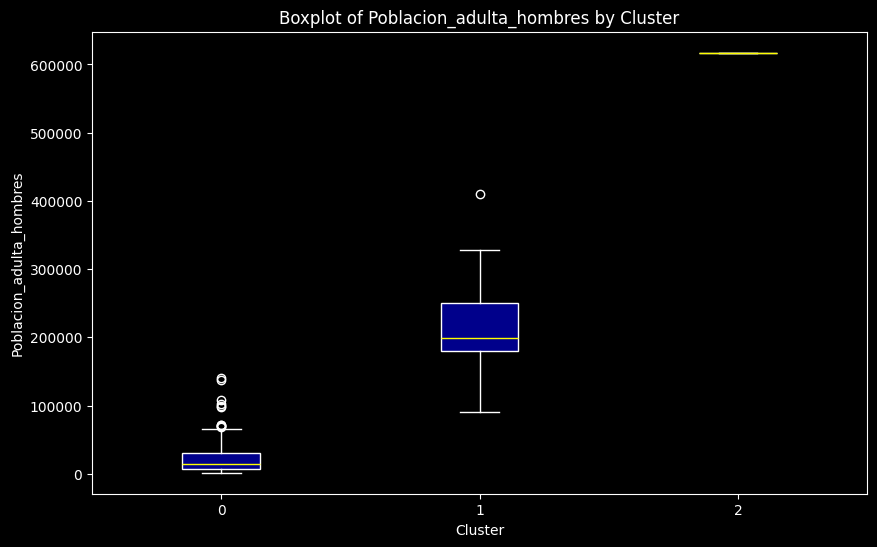

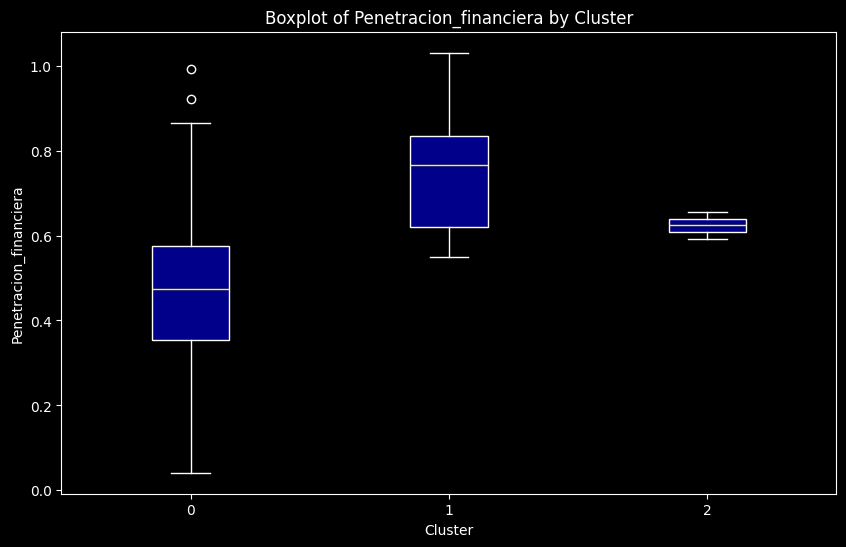

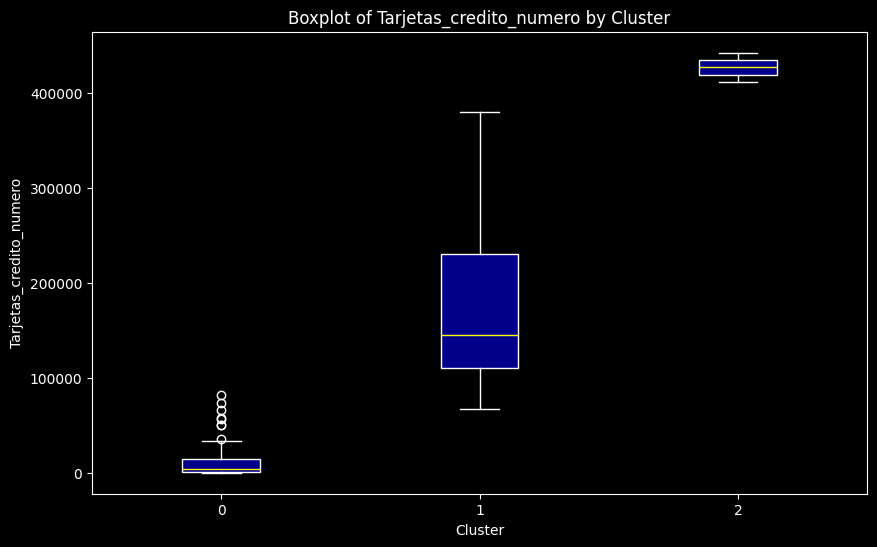

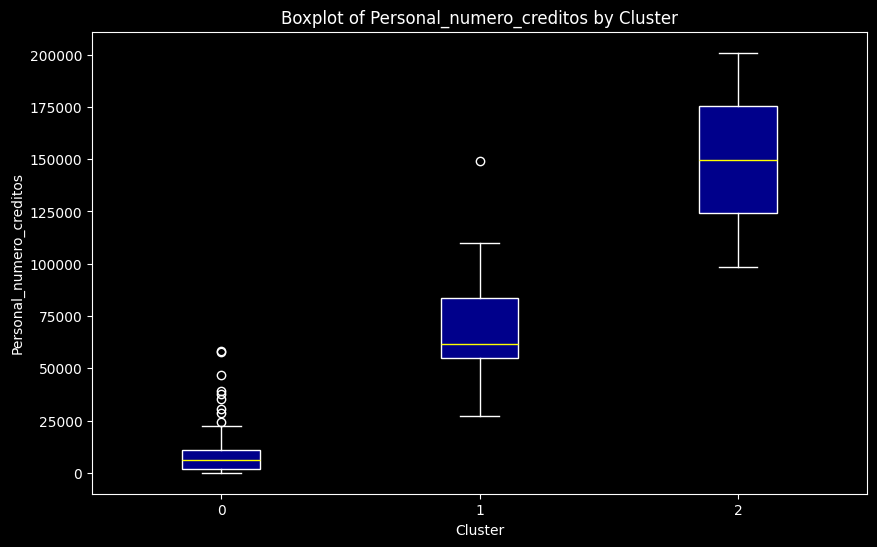

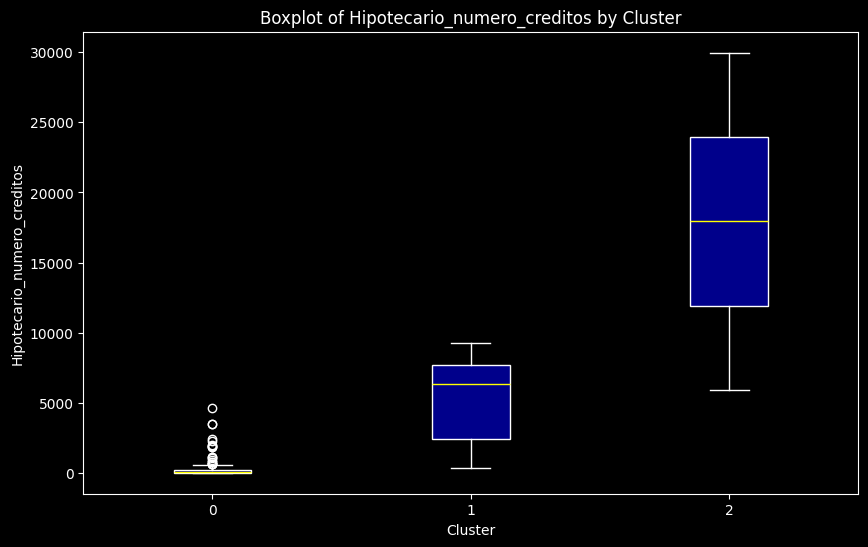

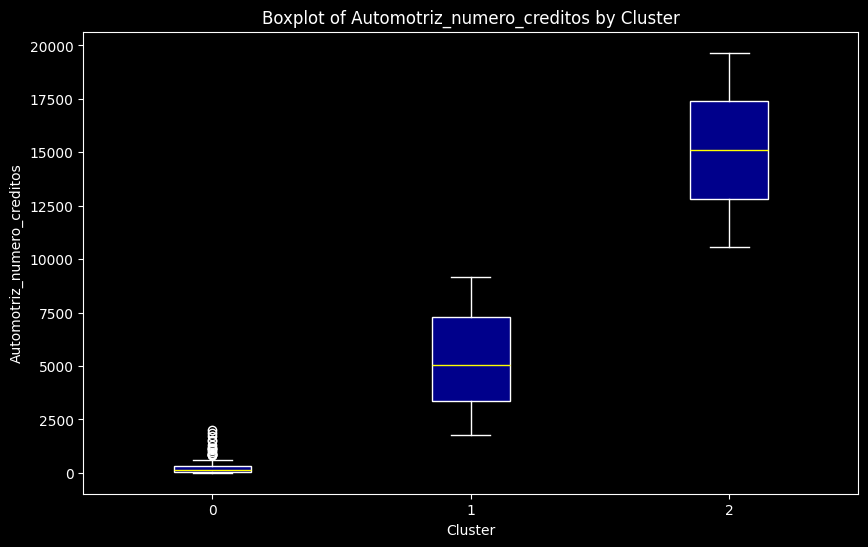

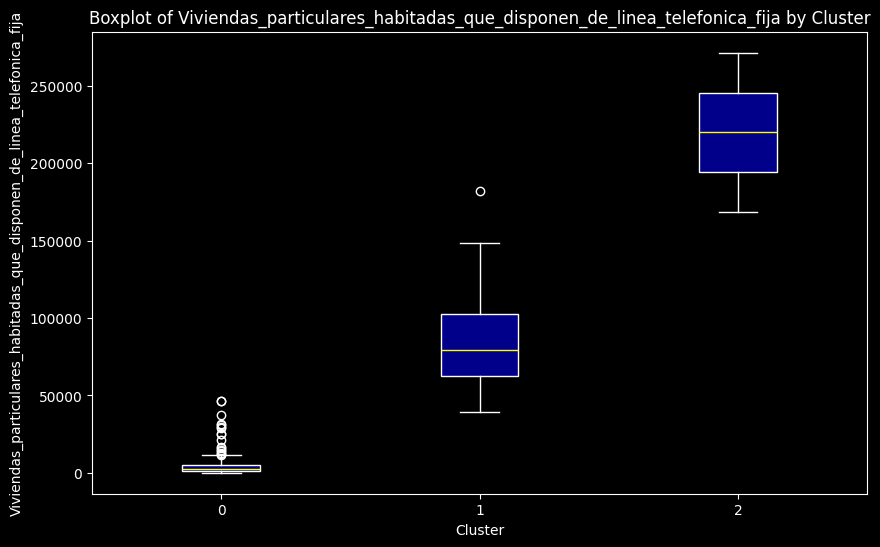

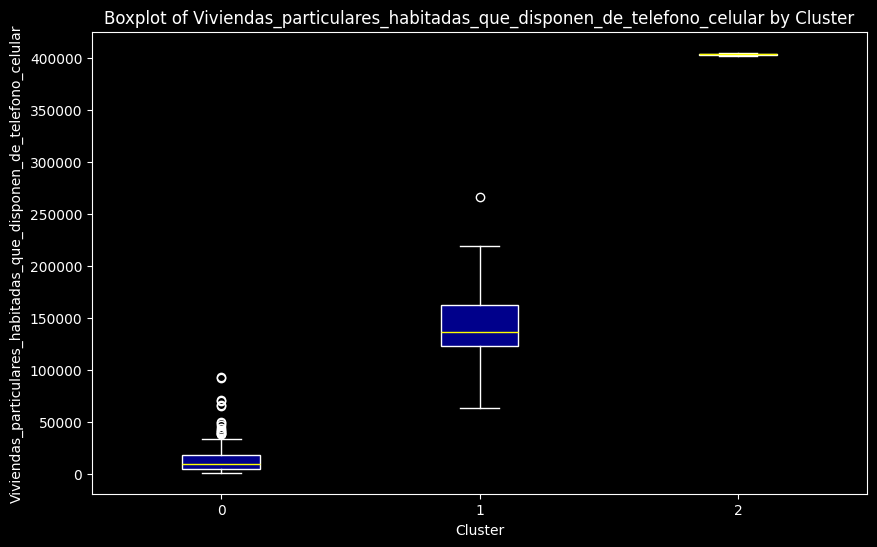

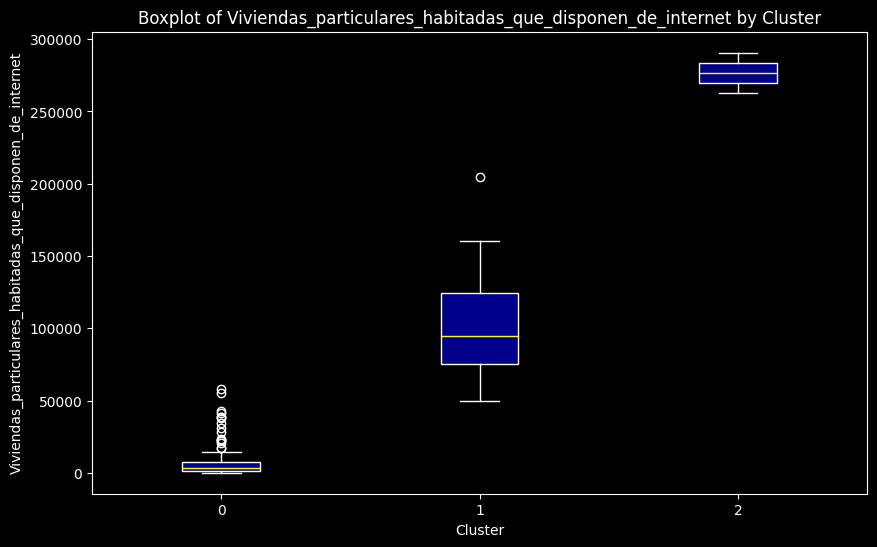

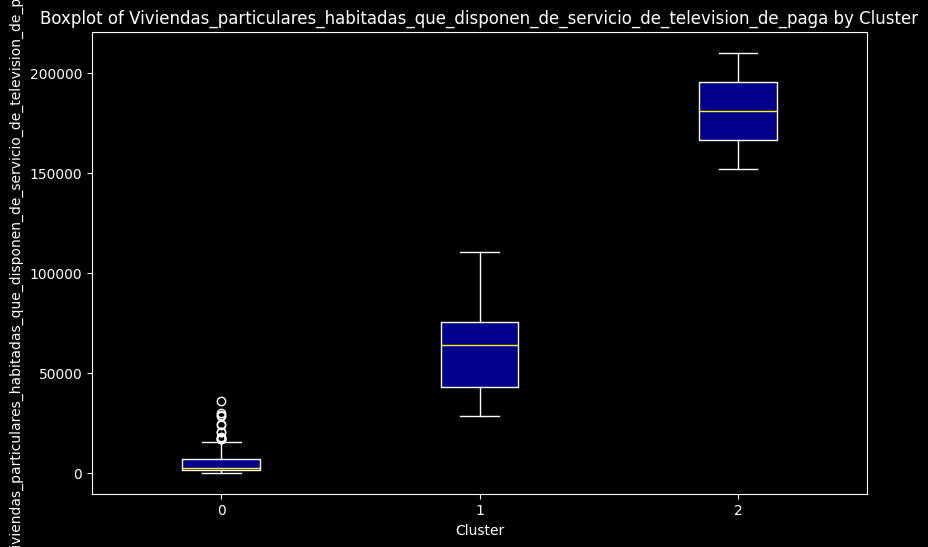

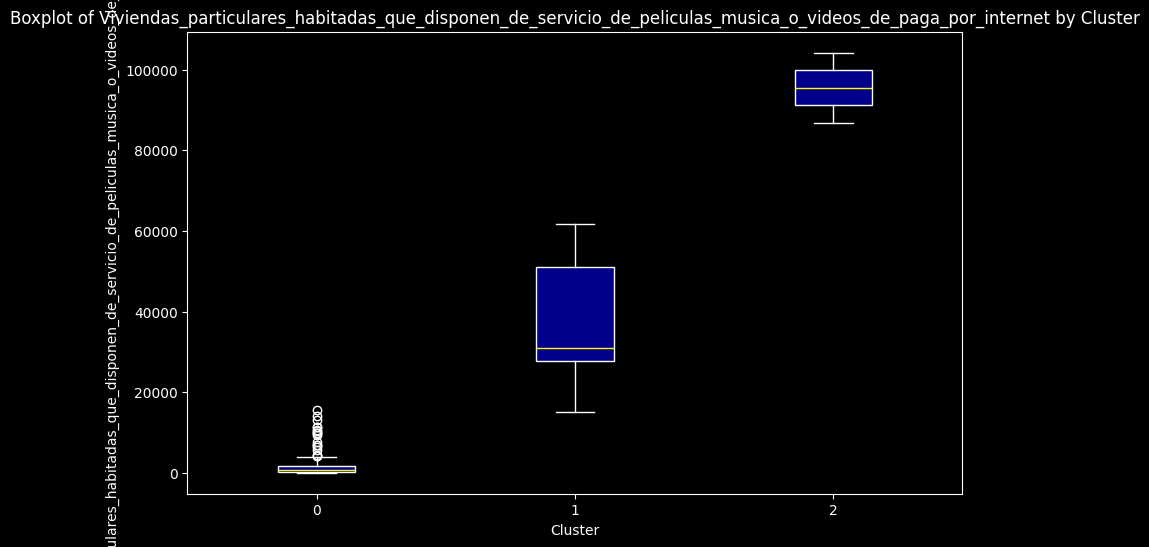

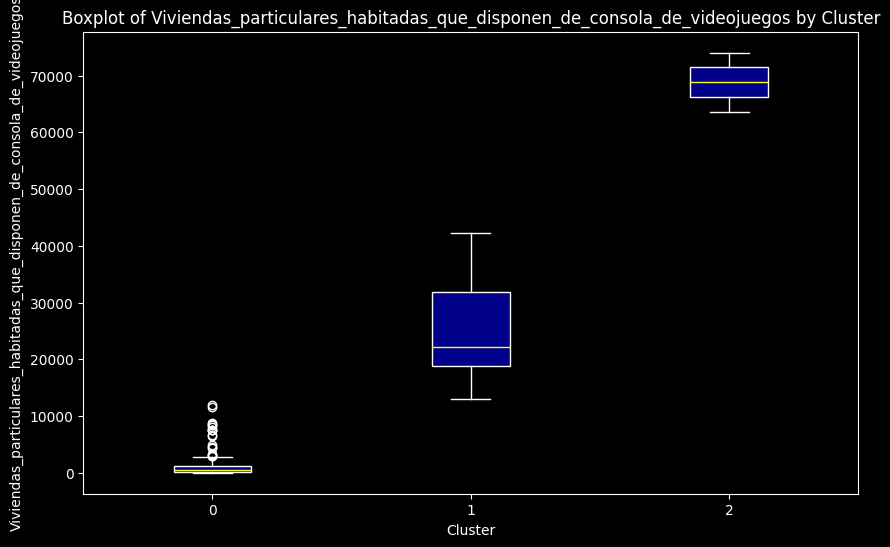

In [ ]:

def plot_boxplots_by_cluster(df, cluster_column='Cluster'):
    # Set background color to dark blue
    plt.style.use('dark_background')

    # Get all numeric columns except the cluster column
    numeric_columns = df.select_dtypes(include=['number']).columns
    columns_to_plot = [col for col in numeric_columns if col != cluster_column]

    # Loop over each numeric column and create a boxplot
    for column in columns_to_plot:
        plt.figure(figsize=(10, 6))
        boxplot = plt.boxplot(
            [df[df[cluster_column] == cluster][column].dropna() for cluster in df[cluster_column].unique()],
            labels=df[cluster_column].unique(),
            patch_artist=True,  # Enables box face color customization
            medianprops=dict(color='yellow')  # Set the median line to yellow
        )

        # Remove the grid
        plt.grid(False)

        # Customize boxplot colors
        for patch in boxplot['boxes']:
            patch.set_facecolor('darkblue')  # Set face color of the boxes
            patch.set_edgecolor('white')     # Set edge color to white

        # Customize the plot
        plt.xlabel(cluster_column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column} by {cluster_column}")
        plt.show()

# Usage
plot_boxplots_by_cluster(merged_data)

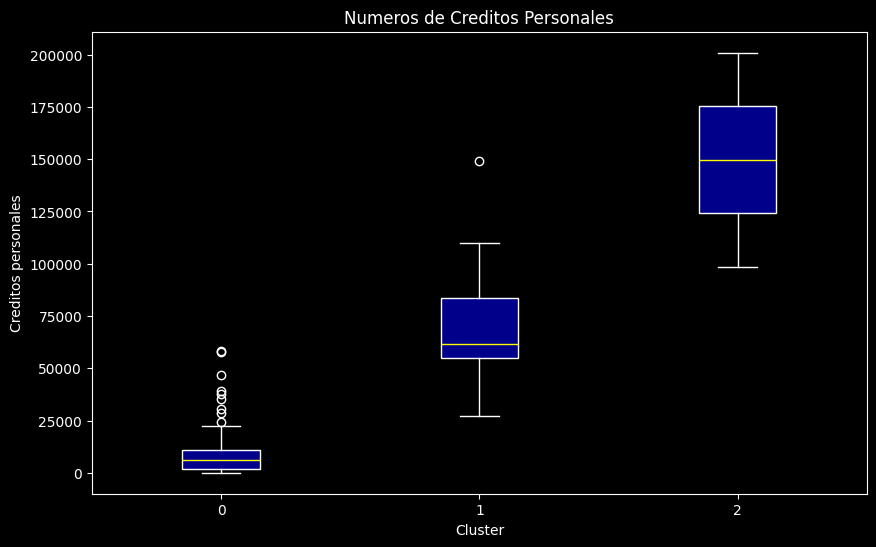

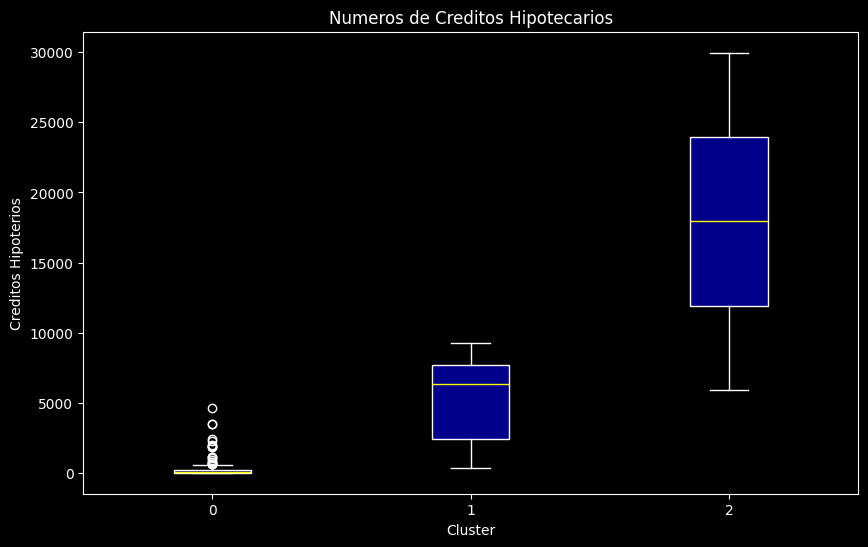

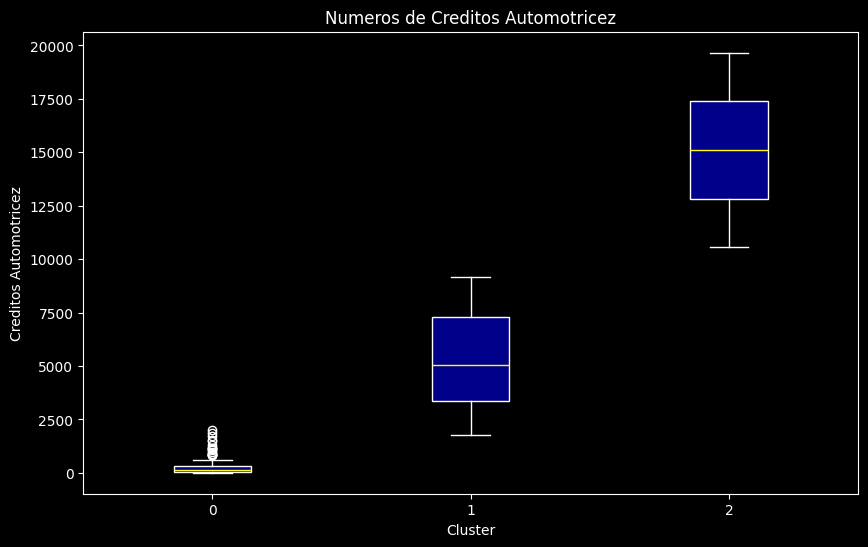

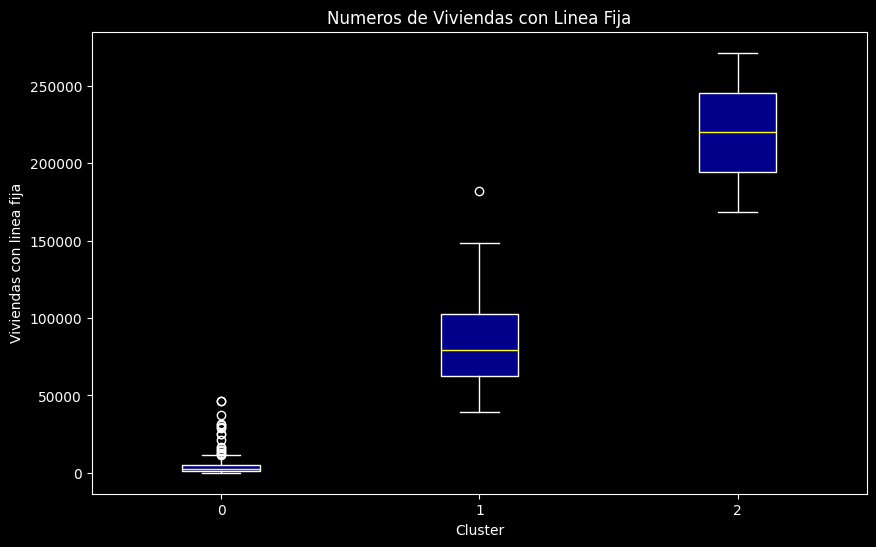

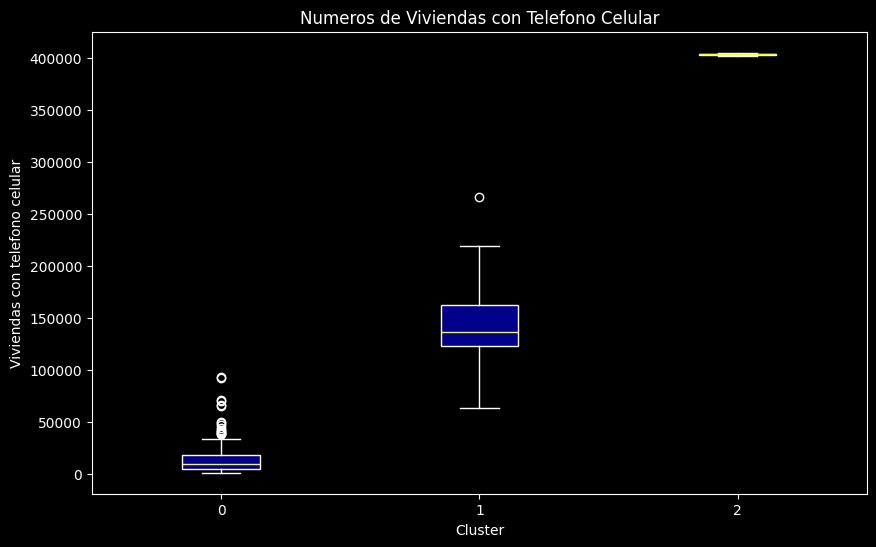

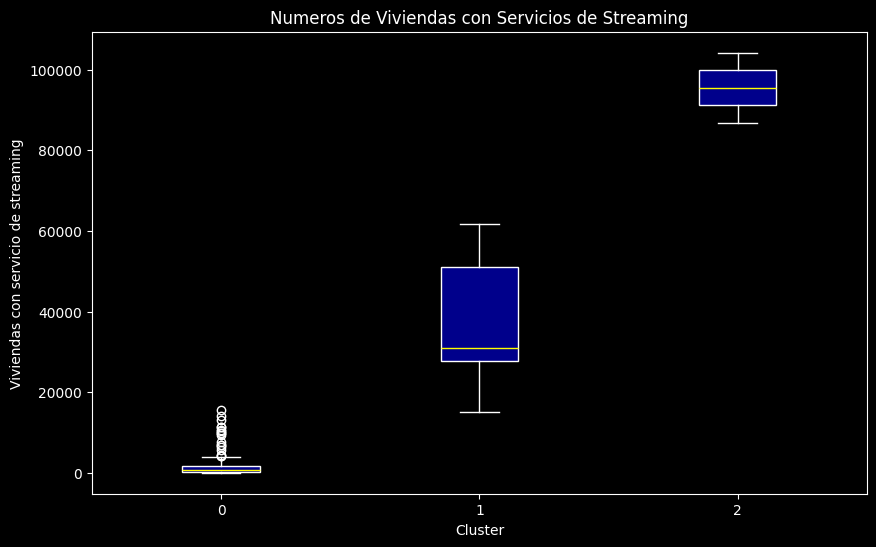

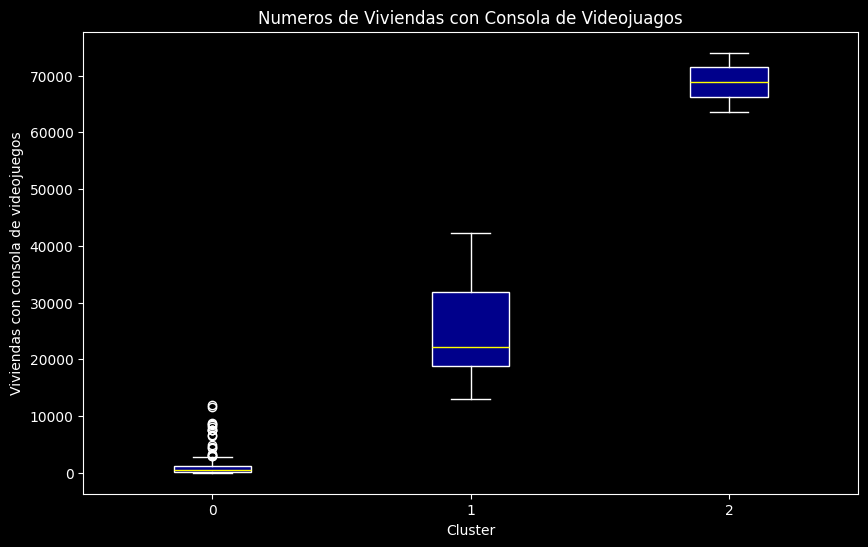

In [ ]:
### Personales

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Personal_numero_creditos'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Creditos personales")
plt.title(f"Numeros de Creditos Personales")
plt.show()

### Hipotecarios


plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Hipotecario_numero_creditos'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Creditos Hipoterios")
plt.title(f"Numeros de Creditos Hipotecarios")
plt.show()


### Automotriz

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Automotriz_numero_creditos'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Creditos Automotricez")
plt.title(f"Numeros de Creditos Automotricez")
plt.show()

### Telefono fijo

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Viviendas con linea fija")
plt.title(f"Numeros de Viviendas con Linea Fija")
plt.show()

### Telefono Celular

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Viviendas_particulares_habitadas_que_disponen_de_telefono_celular'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Viviendas con telefono celular")
plt.title(f"Numeros de Viviendas con Telefono Celular")
plt.show()

### Streaming

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Viviendas con servicio de streaming")
plt.title(f"Numeros de Viviendas con Servicios de Streaming")
plt.show()

### Videojuegos

plt.style.use('dark_background')

# Define the cluster column and the specific column you want to plot
cluster_column = 'Cluster'
column = 'Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos'  # Replace 'YourColumnNameHere' with the actual column name you want to plot

# Create the boxplot for the selected column
plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(
    [merged_data[merged_data[cluster_column] == cluster][column].dropna() for cluster in merged_data[cluster_column].unique()],
    labels=merged_data[cluster_column].unique(),
    patch_artist=True,  # Enables box face color customization
    medianprops=dict(color='yellow')  # Set the median line to yellow
)

# Remove the grid
plt.grid(False)

# Customize boxplot colors
for patch in boxplot['boxes']:
    patch.set_facecolor('darkblue')  # Set face color of the boxes
    patch.set_edgecolor('white')     # Set edge color to white

# Customize the plot
plt.xlabel(cluster_column)
plt.ylabel("Viviendas con consola de videojuegos")
plt.title(f"Numeros de Viviendas con Consola de Videojuagos")
plt.show()


In [ ]:
display(merged_data)

Clave_municipio                Region      Estado  \
0                  0     Occidente y bajio  Guanajuato   
1                  1     Occidente y bajio  Guanajuato   
2                  2     Occidente y bajio  Guanajuato   
3                  3     Occidente y bajio  Guanajuato   
4                  4     Occidente y bajio  Guanajuato   
..               ...                   ...         ...   
166              166  Centro sur y oriente      Mexico   
167              167  Centro sur y oriente      Mexico   
168              168  Centro sur y oriente      Mexico   
169              169  Centro sur y oriente      Mexico   
170              170  Centro sur y oriente      Mexico   

                       Municipio  Poblacion_adulta_mujeres  \
0                        Abasolo                     34605   
1                       Acambaro                     43490   
2          San Miguel De Allende                     67897   
3                 Apaseo El Alto                     24111   
4               Apaseo El Grande                     42597   
..                           ...                       ...   
166           Cuautitlan Izcalli                    230854   
167  Valle De Chalco Solidaridad                    149210   
168                     Luvianos                     10167   
169          San Jose Del Rincon                     33670   
170                    Tonanitla                      5589   

     Poblacion_adulta_hombres  Tipo_poblacion  Penetracion_financiera  \
0                       31960          Urbano                0.483437   
1                       38840          Urbano                0.549289   
2                       59000          Urbano                0.486820   
3                       21774          Urbano                0.391936   
4                       39055          Urbano                0.482168   
..                        ...             ...                     ...   
166                    211115  Semi-metropoli                0.818795   
167                    137922  Semi-metropoli                0.568658   
168                      9242     Semi-urbano                0.109640   
169                     31748          Urbano                0.183680   
170                      5321   En transicion                0.286984   

     Tarjetas_credito_numero  Personal_numero_creditos  \
0                      13721                     12302   
1                      23872                     11159   
2                      31639                     14382   
3                       7279                      6457   
4                      14463                     12871   
..                       ...                       ...   
166                   211443                     65129   
167                    49805                     58375   
168                      405                       844   
169                      878                      7658   
170                      897                       895   

     Hipotecario_numero_creditos  Automotriz_numero_creditos  \
0                            109                         240   
1                            229                         363   
2                           2006                         898   
3                             34                         139   
4                            916                         319   
..                           ...                         ...   
166                         7994                        7166   
167                          242                        1164   
168                            2                          40   
169                            1                          73   
170                           86                          68   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243        

In [ ]:
municipios_cluster_2 = merged_data[merged_data['Cluster'] == 2]

# Mostrar los nombres de los municipios
print(municipios_cluster_2['Municipio'])

19                   Leon
78    Ecatepec De Morelos
Name: Municipio, dtype: object


### Modelo de prueba dentro de cluster 0

In [ ]:
display(cluster_0_cln)

Clave_municipio                Region      Estado  \
0                  0     Occidente y bajio  Guanajuato   
1                  1     Occidente y bajio  Guanajuato   
2                  2     Occidente y bajio  Guanajuato   
3                  3     Occidente y bajio  Guanajuato   
4                  4     Occidente y bajio  Guanajuato   
..               ...                   ...         ...   
148              165  Centro sur y oriente      Mexico   
149              167  Centro sur y oriente      Mexico   
150              168  Centro sur y oriente      Mexico   
151              169  Centro sur y oriente      Mexico   
152              170  Centro sur y oriente      Mexico   

                       Municipio  Poblacion_adulta_mujeres  \
0                        Abasolo                     34605   
1                       Acambaro                     43490   
2          San Miguel De Allende                     67897   
3                 Apaseo El Alto                     24111   
4               Apaseo El Grande                     42597   
..                           ...                       ...   
148                     Zumpango                    104875   
149  Valle De Chalco Solidaridad                    149210   
150                     Luvianos                     10167   
151          San Jose Del Rincon                     33670   
152                    Tonanitla                      5589   

     Poblacion_adulta_hombres  Tipo_poblacion  Penetracion_financiera  \
0                       31960          Urbano                0.483437   
1                       38840          Urbano                0.549289   
2                       59000          Urbano                0.486820   
3                       21774          Urbano                0.391936   
4                       39055          Urbano                0.482168   
..                        ...             ...                     ...   
148                     97876          Urbano                0.554010   
149                    137922  Semi-metropoli                0.568658   
150                      9242     Semi-urbano                0.109640   
151                     31748          Urbano                0.183680   
152                      5321   En transicion                0.286984   

     Tarjetas_credito_numero  Personal_numero_creditos  \
0                      13721                     12302   
1                      23872                     11159   
2                      31639                     14382   
3                       7279                      6457   
4                      14463                     12871   
..                       ...                       ...   
148                    35612                     35386   
149                    49805                     58375   
150                      405                       844   
151                      878                      7658   
152                      897                       895   

     Hipotecario_numero_creditos  Automotriz_numero_creditos  \
0                            109                         240   
1                            229                         363   
2                           2006                         898   
3                             34                         139   
4                            916                         319   
..                           ...                         ...   
148                         1102                         880   
149                          242                        1164   
150                            2                          40   
151                            1                          73   
152                           86                          68   

     Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija  \
0                                                 4597                        
1                                                11243        

In [ ]:
nd = cluster_0_dirt.select_dtypes(include=['int64', 'float64'])


In [ ]:
# List of columns to transfer
columns_to_add = [
    "Viviendas_particulares_habitadas_que_disponen_de_computadora_laptop_o_tablet",
    "Poblacion_de_18_a_24_años",
    "Poblacion_de_18_a_24_años_que_asiste_a_la_escuela"
]

# Add the specified columns to cluster_0_cln
cluster_0_cln[columns_to_add] = cluster_0_dirt[columns_to_add]

# Verify the result
print("Columns added successfully:")
print(cluster_0_cln.head())

Columns added successfully:
   Clave_municipio             Region      Estado              Municipio  \
0                0  Occidente y bajio  Guanajuato                Abasolo   
1                1  Occidente y bajio  Guanajuato               Acambaro   
2                2  Occidente y bajio  Guanajuato  San Miguel De Allende   
3                3  Occidente y bajio  Guanajuato         Apaseo El Alto   
4                4  Occidente y bajio  Guanajuato       Apaseo El Grande   

   Poblacion_adulta_mujeres  Poblacion_adulta_hombres Tipo_poblacion  \
0                     34605                     31960         Urbano   
1                     43490                     38840         Urbano   
2                     67897                     59000         Urbano   
3                     24111                     21774         Urbano   
4                     42597                     39055         Urbano   

   Penetracion_financiera  Tarjetas_credito_numero  Personal_numero_creditos  \
0 

In [ ]:
dc = [
    "Tarjetas_credito_numero",  # Number of Credit Cards
    "Personal_numero_creditos",  # Number of Personal Loans
    "Hipotecario_numero_creditos",  # Number of Mortgage Loans
    "Automotriz_numero_creditos",  # Number of Auto Loans
    "Viviendas_particulares_habitadas_que_disponen_de_linea_telefonica_fija",  # Homes with a Fixed Phone Line
    "Viviendas_particulares_habitadas_que_disponen_de_telefono_celular",  # Homes with a Mobile Phone
    "Viviendas_particulares_habitadas_que_disponen_de_internet",  # Homes with Internet Access
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_television_de_paga",  # Homes with Paid TV Service
    "Viviendas_particulares_habitadas_que_disponen_de_servicio_de_peliculas_musica_o_videos_de_paga_por_internet",  # Homes with Paid Streaming Services
    "Viviendas_particulares_habitadas_que_disponen_de_consola_de_videojuegos", # Homes with Video Game Consoles
    "Viviendas_particulares_habitadas_que_disponen_de_computadora_laptop_o_tablet",  # Homes with a Laptop or Tablet
    "Poblacion_de_18_a_24_años",
    "Poblacion_de_18_a_24_años_que_asiste_a_la_escuela"
]

In [ ]:
# Crear un nuevo DataFrame solo con las columnas seleccionadas
fd = nd[dc]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(fd)

print(" ")
print(" 5 clusters")

labels_all_features4c = run_kmeans(scaled_data, 5)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 4 clusters")

kmeans = KMeans(n_clusters=4, random_state=42)

labels_all_features4c = run_kmeans(scaled_data, 4)

evaluation_results = evaluate_clustering(scaled_data, labels_all_features4c)

print(" 3 clusters")

# Get the clustering results for 3 clusters
labels_all_features3c = run_kmeans(scaled_data, 3)

# Add the results to cluster_0_cln under the new column 'SubCluster'
cluster_0_cln['SubCluster'] = labels_all_features3c

evaluation_results = evaluate_clustering(scaled_data, labels_all_features3c)



 
 5 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.5322
Davies-Bouldin Score: 0.8816
Calinski-Harabasz Score: 251.3994
 4 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.5267
Davies-Bouldin Score: 0.8939
Calinski-Harabasz Score: 268.0698
 3 clusters
Clustering Evaluation Metrics:
Silhouette Score: 0.6059
Davies-Bouldin Score: 0.7385
Calinski-Harabasz Score: 285.5521


In [ ]:
# Count the number of values in each SubCluster
subcluster_counts = cluster_0_cln['SubCluster'].value_counts()

# Print the counts
print("Counts for each SubCluster:")
print(subcluster_counts)

Counts for each SubCluster:
SubCluster
0    119
2     24
1     10
Name: count, dtype: int64


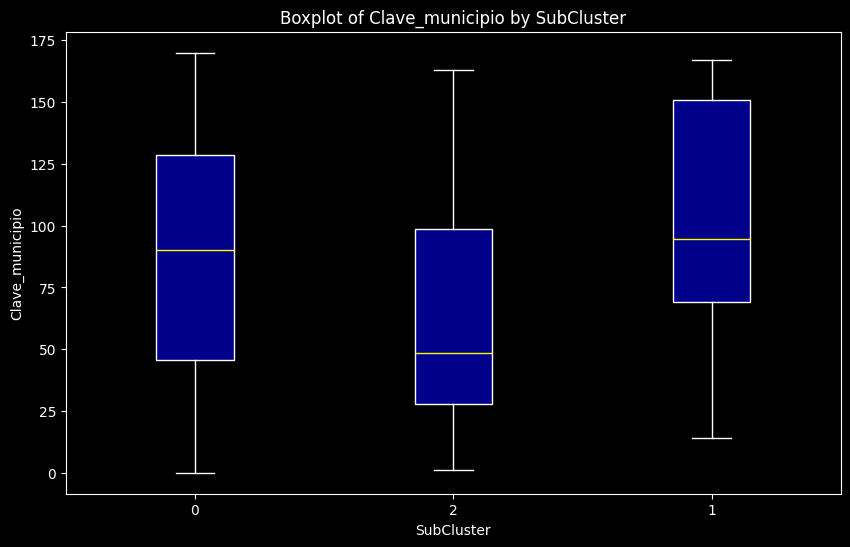

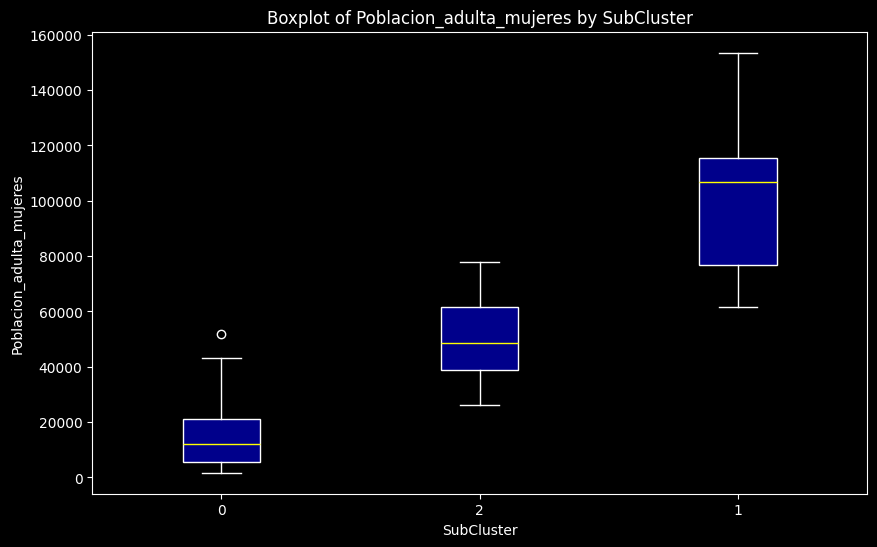

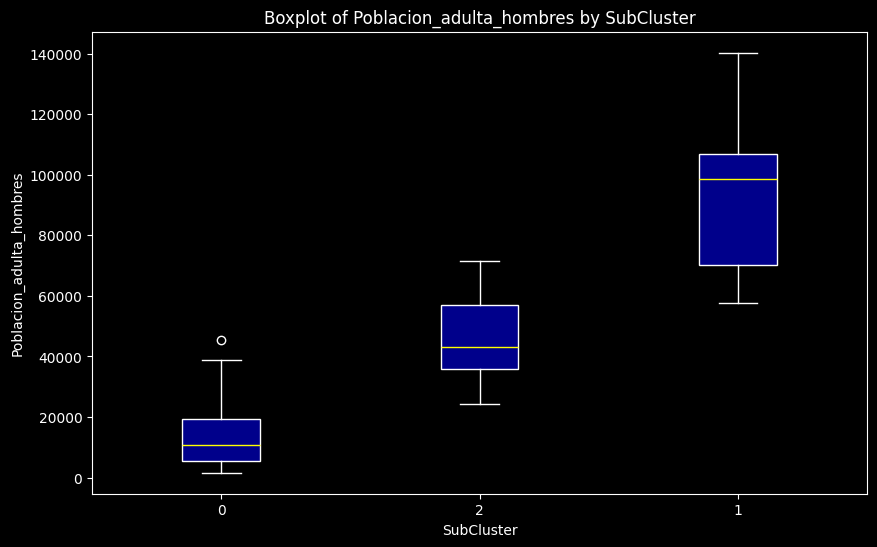

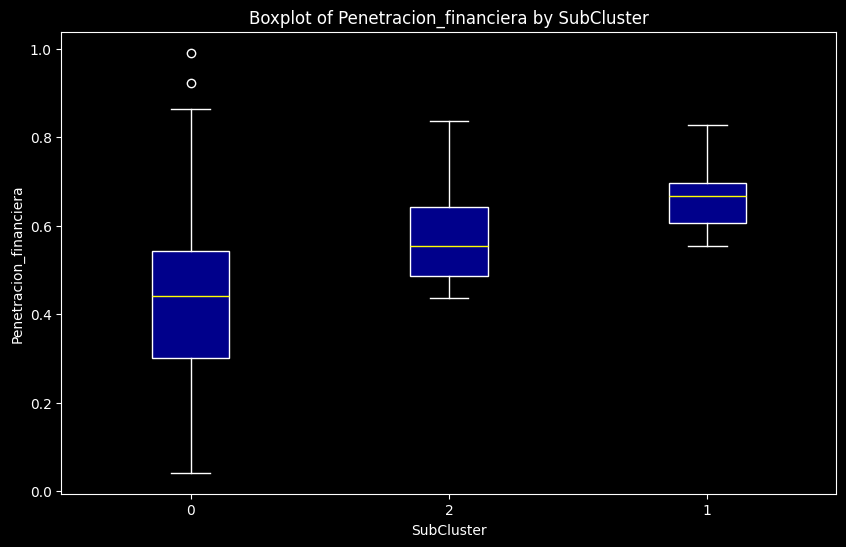

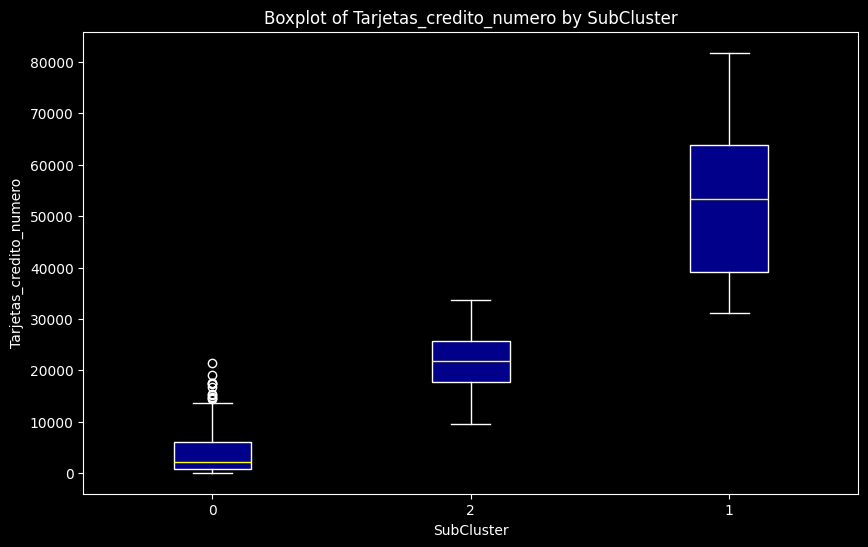

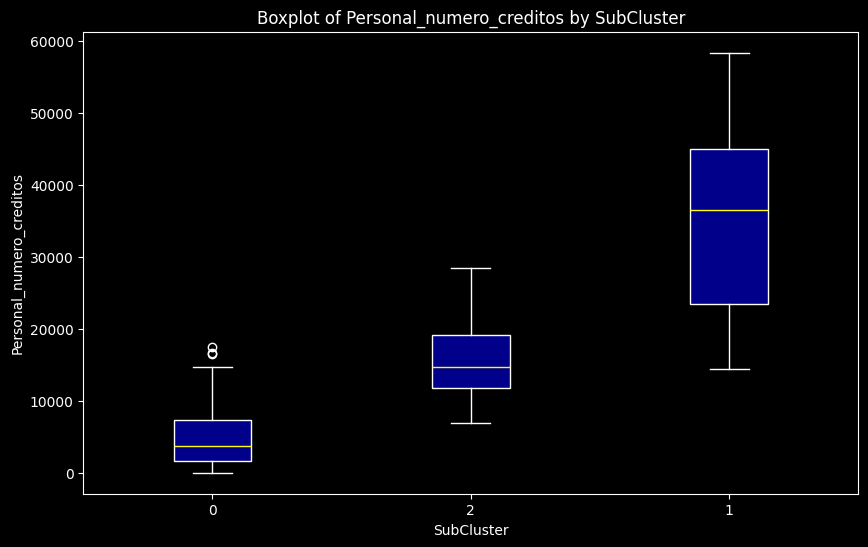

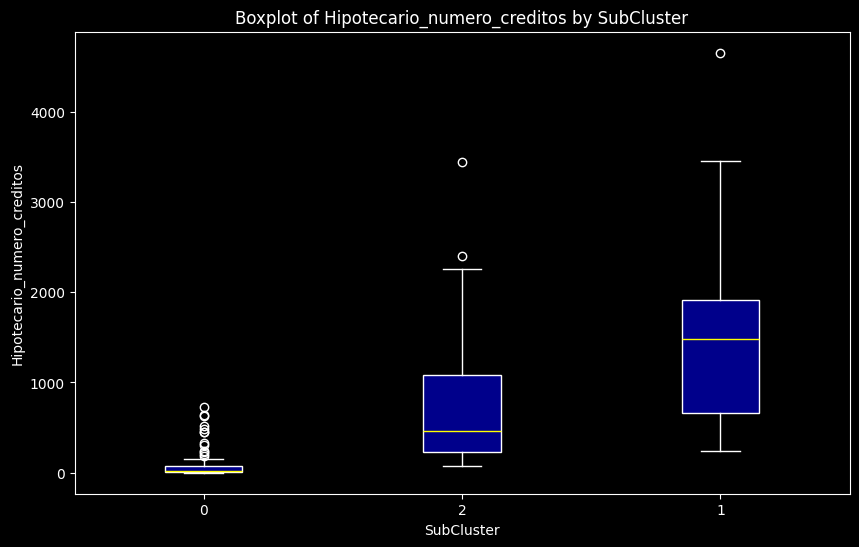

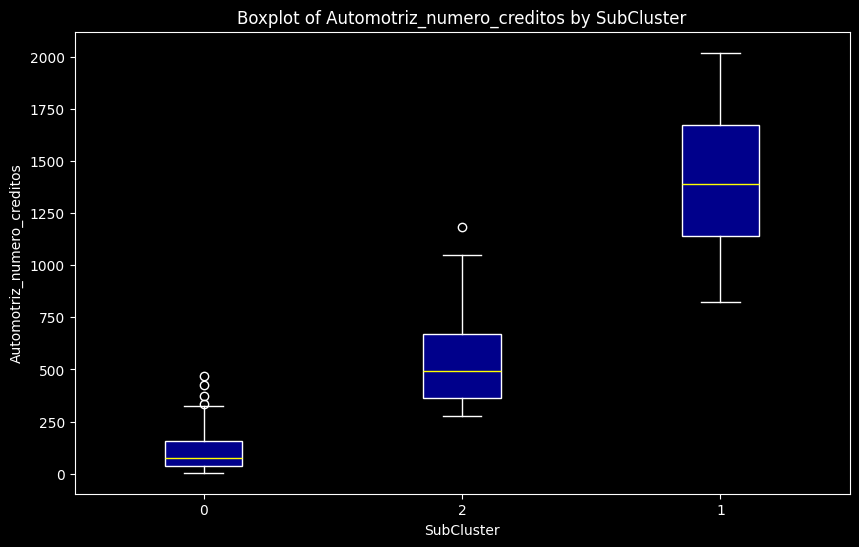

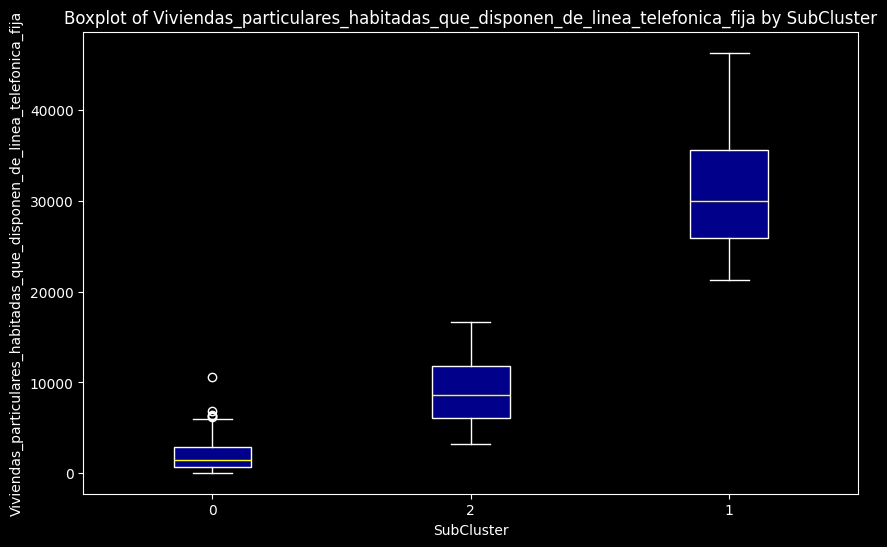

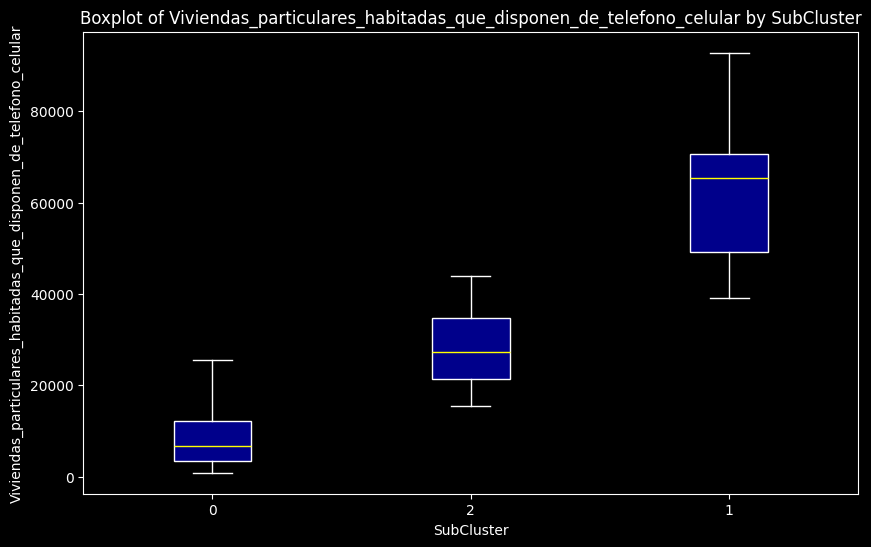

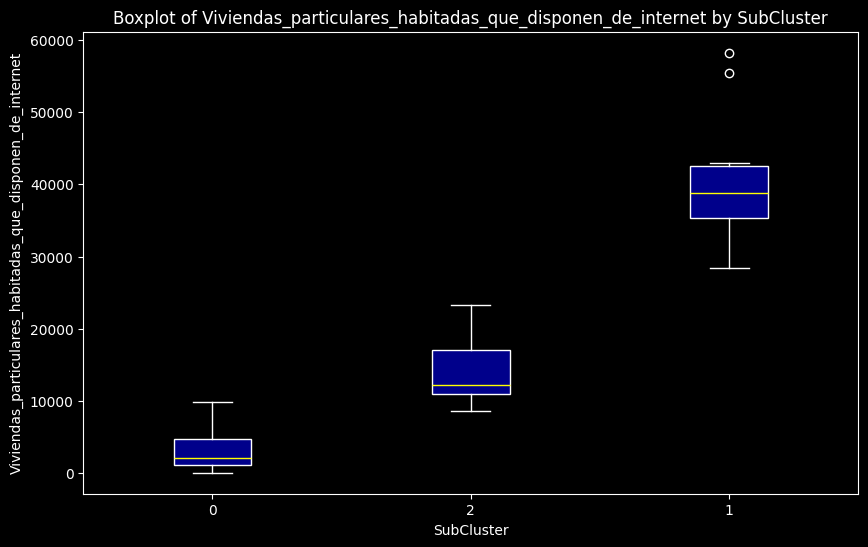

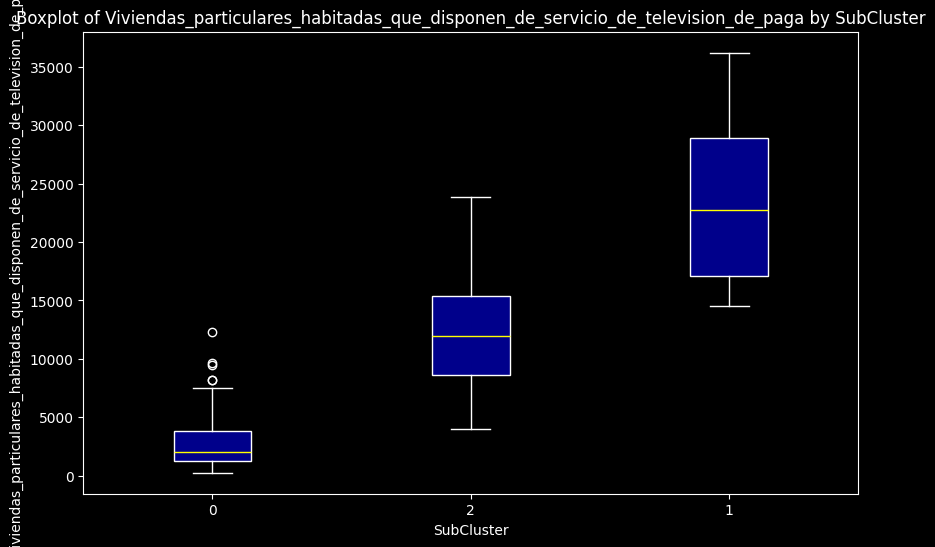

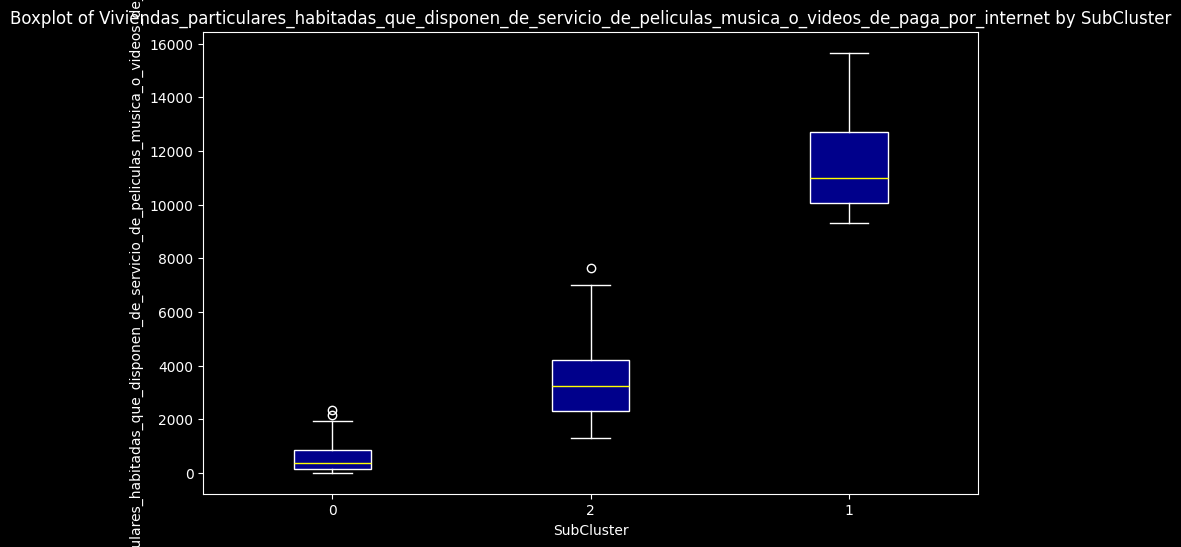

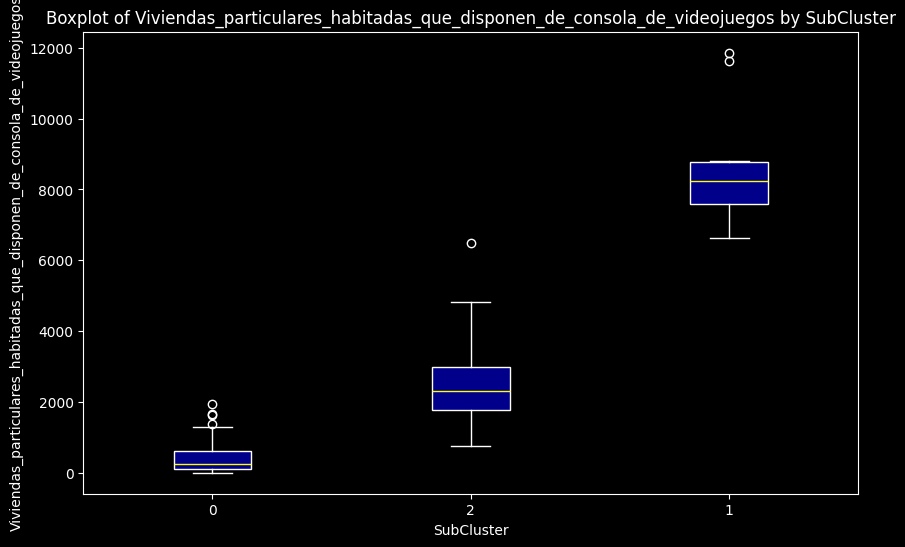

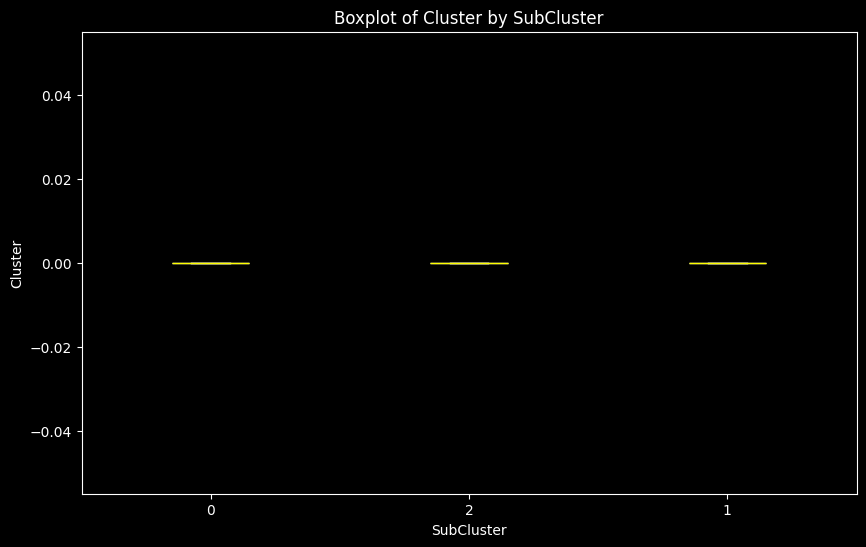

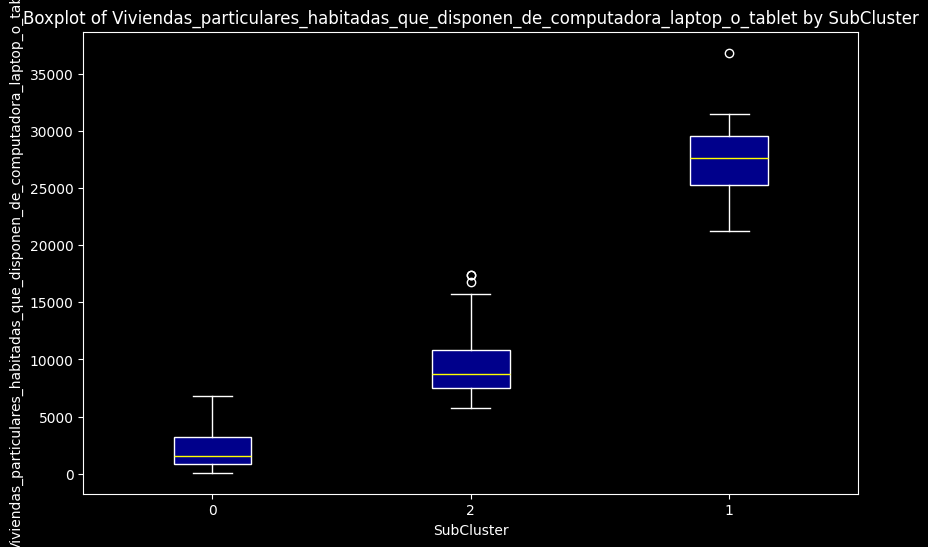

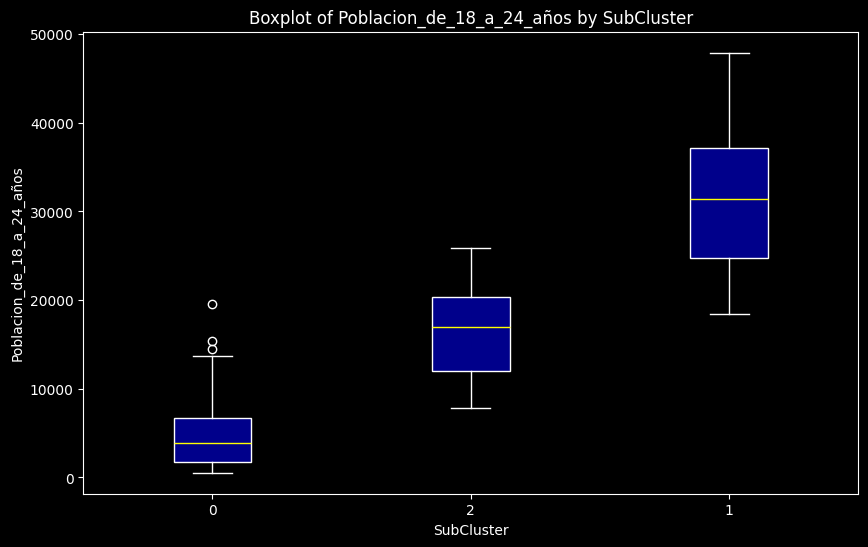

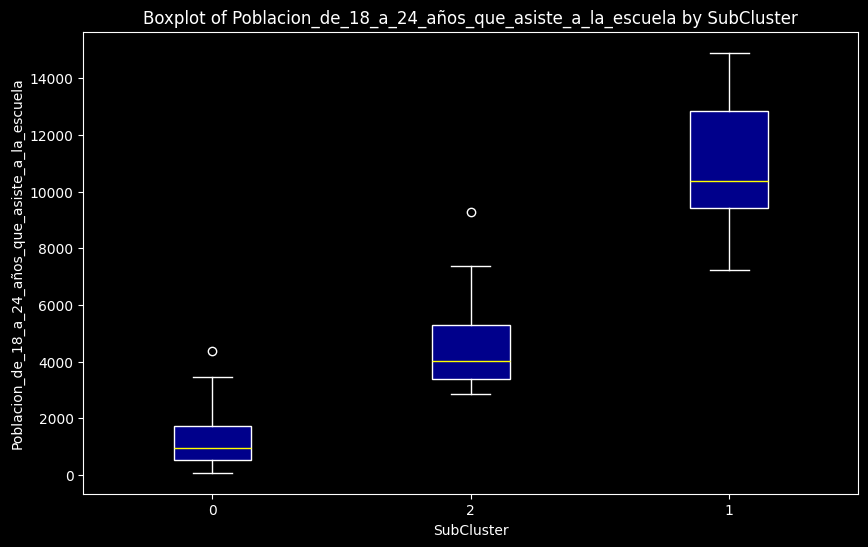

In [ ]:
plot_boxplots_by_cluster(cluster_0_cln, 'SubCluster')

In [ ]:
nd = cluster_0_cln.select_dtypes(include=['int64', 'float64','int32'])

In [ ]:
def fds(data):
    # Use the already scaled data (excluding 'Cluster' column)
    scaled_data = data.drop(columns=['Cluster'])
    scaled_data = data.drop(columns=['SubCluster'])

    # Add the existing cluster assignments to the DataFrame
    scaled_data['SubCluster'] = data['SubCluster']

    # Create a list to store scores for each three-variable combination
    three_var_scores = {}

    # Calculate the average distance between clusters for each triplet of variables
    for triplet in combinations(scaled_data.columns[:-1], 3):  # Exclude 'Cluster' from combinations
        cluster_centers = scaled_data.groupby('SubCluster')[list(triplet)].mean()
        distances = []
        for i in range(cluster_centers.shape[0]):
            for j in range(i + 1, cluster_centers.shape[0]):
                distance = np.linalg.norm(cluster_centers.iloc[i] - cluster_centers.iloc[j])
                distances.append(distance)
        three_var_scores[triplet] = np.mean(distances)

    # Sort the scores and select the top 5
    top_five_triplets = sorted(three_var_scores, key=three_var_scores.get, reverse=True)[:5]

    # Setting up the subplot grid
    fig = make_subplots(
        rows=1, cols=5,
        specs=[[{'type': 'scatter3d'}] * 5]  # All columns will have 3D scatter plots
    )

    # Add each plot to the subplot grid
    for index, triplet in enumerate(top_five_triplets, start=1):
        temp_fig = px.scatter_3d(scaled_data, x=triplet[0], y=triplet[1], z=triplet[2],
                                 color='SubCluster',
                                 labels={var: var for var in triplet},
                                 color_continuous_scale=px.colors.qualitative.Vivid)
        for trace in temp_fig.data:
            fig.add_trace(
                trace,
                row=1, col=index
            )
        # Add custom annotations vertically
        base_x = 0.2 * (index - 1) + 0.1
        fig.add_annotation(text=f"x = '{triplet[0]}'", x=base_x, y=-0.1, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"y = '{triplet[1]}'", x=base_x, y=-0.15, showarrow=False, xref="paper", yref="paper")
        fig.add_annotation(text=f"z = '{triplet[2]}'", x=base_x, y=-0.2, showarrow=False, xref="paper", yref="paper")

    # Update layout for better visualization
    fig.update_layout(height=800, width=3200, title_text="Top 5 Best Three Variable Combinations for 3D Scatter Plot")
    fig.update_layout(showlegend=False, margin=dict(t=100, b=200))  # Increase bottom margin to fit annotations

    # Show the graph
    fig.show()

    return top_five_triplets

# Example usage
# Assuming `filtered_data` contains the already scaled variables and 'Cluster'
top_5_vars = fds(nd)
print("Top 5 best three variables for 3D scatter plot displayed side by side.")

Top 5 best three variables for 3D scatter plot displayed side by side.


In [ ]:
cluster_0_cln.to_excel('/content/drive/MyDrive/Colab Notebooks/cluster_0_SubCluster.xlsx', index=False)